## Insurance Claim Fraud Detection

Project Description
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.
In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 
In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.model_selection import RandomizedSearchCV,GridSearchCV ,train_test_split, cross_val_score


from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
ClaimFraud_Ds=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/Data-Science-ML-Capstone-Projects/refs/heads/master/Automobile_insurance_fraud.csv")
ClaimFraud_Ds

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                   328   48         521585       17-10-2014           OH   
1                   228   42         342868       27-06-2006           IN   
2                   134   29         687698       06-09-2000           OH   
3                   256   41         227811       25-05-1990           IL   
4                   228   44         367455       06-06-2014           IL   
..                  ...  ...            ...              ...          ...   
995                   3   38         941851       16-07-1991           OH   
996                 285   41         186934       05-01-2014           IL   
997                 130   34         918516       17-02-2003           OH   
998                 458   62         533940       18-11-2011           IL   
999                 456   60         556080       11-11-1996           OH   

    policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0      250/500               1000                1406.91               0   
1      250/500               2000                1197.22         5000000   
2      100/300               2000                1413.14         5000000   
3      250/500               2000                1415.74         6000000   
4     500/1000               1000                1583.91         6000000   
..         ...                ...                    ...             ...   
995   500/1000               1000                1310.80               0   
996    100/300               1000                1436.79               0   
997    250/500                500                1383.49         3000000   
998   500/1000               2000                1356.92         5000000   
999    250/500               1000                 766.19               0   

     insured_zip  ... police_report_available total_claim_amount injury_claim  \
0         466132  ...                     YES              71610         6510   
1         468176  ...                       ?               5070          780   
2         430632  ...                      NO              34650         7700   
3         608117  ...                      NO              63400         6340   
4         610706  ...                      NO               6500         1300   
..           ...  ...                     ...                ...          ...   
995       431289  ...                       ?              87200        17440   
996       608177  ...                       ?             108480        18080   
997       442797  ...                     YES              67500         7500   
998       441714  ...                     YES              46980         5220   
999       612260  ...                       ?               5060          460   

    property_claim vehicle_claim   auto_make  auto_model auto_year  \
0            13020         52080        Saab         92x      2004   
1              780          3510    Mercedes        E400      2007   
2             3850         23100       Dodge         RAM      2007   
3             6340         50720   Chevrolet       Tahoe      2014   
4              650          4550      Accura         RSX      2009   
..             ...           ...         ...         ...       ...   
995           8720         61040       Honda      Accord      2006   
996          18080         72320  Volkswagen      Passat      2015   
997           7500         52500      Suburu     Impreza      1996   
998           5220         36540        Audi          A5      1998   
999            920          3680    Mercedes        E400      2007   

    fraud_reported _c39  
0                Y  NaN  
1                Y  NaN  
2                N  NaN  
3                Y  NaN  
4                N  NaN  
..             ...  ...  
995              N  NaN  
996              N  NaN  
997              N  NaN  
998              N  NaN  
999              N  NaN  

[1000 rows x 40 columns]

In [3]:
ClaimFraud_Ds.shape

(1000, 40)

There are 1000 rows and 40 columns

In [4]:
ClaimFraud_Ds.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

There are 20 numerical data and 20 categorical data

In [5]:
for i in ClaimFraud_Ds.columns:
    print(ClaimFraud_Ds[i].value_counts())
    print('\n')

months_as_customer
194    8
128    7
254    7
140    7
210    7
      ..
390    1
411    1
453    1
448    1
17     1
Name: count, Length: 391, dtype: int64


age
43    49
39    48
41    45
34    44
38    42
30    42
31    42
37    41
33    39
40    38
32    38
29    35
46    33
42    32
35    32
36    32
44    32
28    30
26    26
45    26
48    25
47    24
27    24
57    16
25    14
55    14
49    14
53    13
50    13
24    10
54    10
61    10
51     9
60     9
58     8
56     8
23     7
21     6
59     5
62     4
52     4
64     2
63     2
19     1
20     1
22     1
Name: count, dtype: int64


policy_number
521585    1
687755    1
674485    1
223404    1
991480    1
         ..
563878    1
620855    1
583169    1
337677    1
556080    1
Name: count, Length: 1000, dtype: int64


policy_bind_date
01-01-2006    3
28-04-1992    3
05-08-1992    3
14-12-1991    2
09-08-2004    2
             ..
03-06-2014    1
12-12-1998    1
18-02-1999    1
30-10-1997    1
11-11-1996    1
Name: count, L

In [6]:
ClaimFraud_Ds.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted            91
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

Column "_c39 " has 1000 null values and hence dropping the column

In [7]:

ClaimFraud_Ds.drop(['_c39'], axis = 1, inplace = True)

In [8]:
ClaimFraud_Ds.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                       ?               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

In [9]:
ClaimFraud_Ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [10]:
ClaimFraud_Ds.isin(['?']).sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

In [11]:
ClaimFraud_Ds=ClaimFraud_Ds.replace('?',np.NaN)

In [12]:
ClaimFraud_Ds.head()

months_as_customer  age  policy_number policy_bind_date policy_state  \
0                 328   48         521585       17-10-2014           OH   
1                 228   42         342868       27-06-2006           IN   
2                 134   29         687698       06-09-2000           OH   
3                 256   41         227811       25-05-1990           IL   
4                 228   44         367455       06-06-2014           IL   

  policy_csl  policy_deductable  policy_annual_premium  umbrella_limit  \
0    250/500               1000                1406.91               0   
1    250/500               2000                1197.22         5000000   
2    100/300               2000                1413.14         5000000   
3    250/500               2000                1415.74         6000000   
4   500/1000               1000                1583.91         6000000   

   insured_zip  ... witnesses police_report_available total_claim_amount  \
0       466132  ...         2                     YES              71610   
1       468176  ...         0                     NaN               5070   
2       430632  ...         3                      NO              34650   
3       608117  ...         2                      NO              63400   
4       610706  ...         1                      NO               6500   

  injury_claim property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510          13020          52080       Saab        92x      2004   
1          780            780           3510   Mercedes       E400      2007   
2         7700           3850          23100      Dodge        RAM      2007   
3         6340           6340          50720  Chevrolet      Tahoe      2014   
4         1300            650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 39 columns]

Filling Missing Values

Filling the missing values with mode value for columns "Collision Type","Property Damage","Police report available","authorities contacted"

In [13]:
ClaimFraud_Ds['collision_type'] = ClaimFraud_Ds['collision_type'].fillna(ClaimFraud_Ds['collision_type'].mode()[0])

In [14]:
ClaimFraud_Ds['property_damage'] = ClaimFraud_Ds['property_damage'].fillna(ClaimFraud_Ds['property_damage'].mode()[0])

In [15]:
ClaimFraud_Ds['police_report_available'] = ClaimFraud_Ds['police_report_available'].fillna(ClaimFraud_Ds['police_report_available'].mode()[0])

In [16]:
ClaimFraud_Ds['authorities_contacted'] = ClaimFraud_Ds['authorities_contacted'].fillna(ClaimFraud_Ds['authorities_contacted'].mode()[0])

In [17]:
ClaimFraud_Ds.isin(['?']).sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

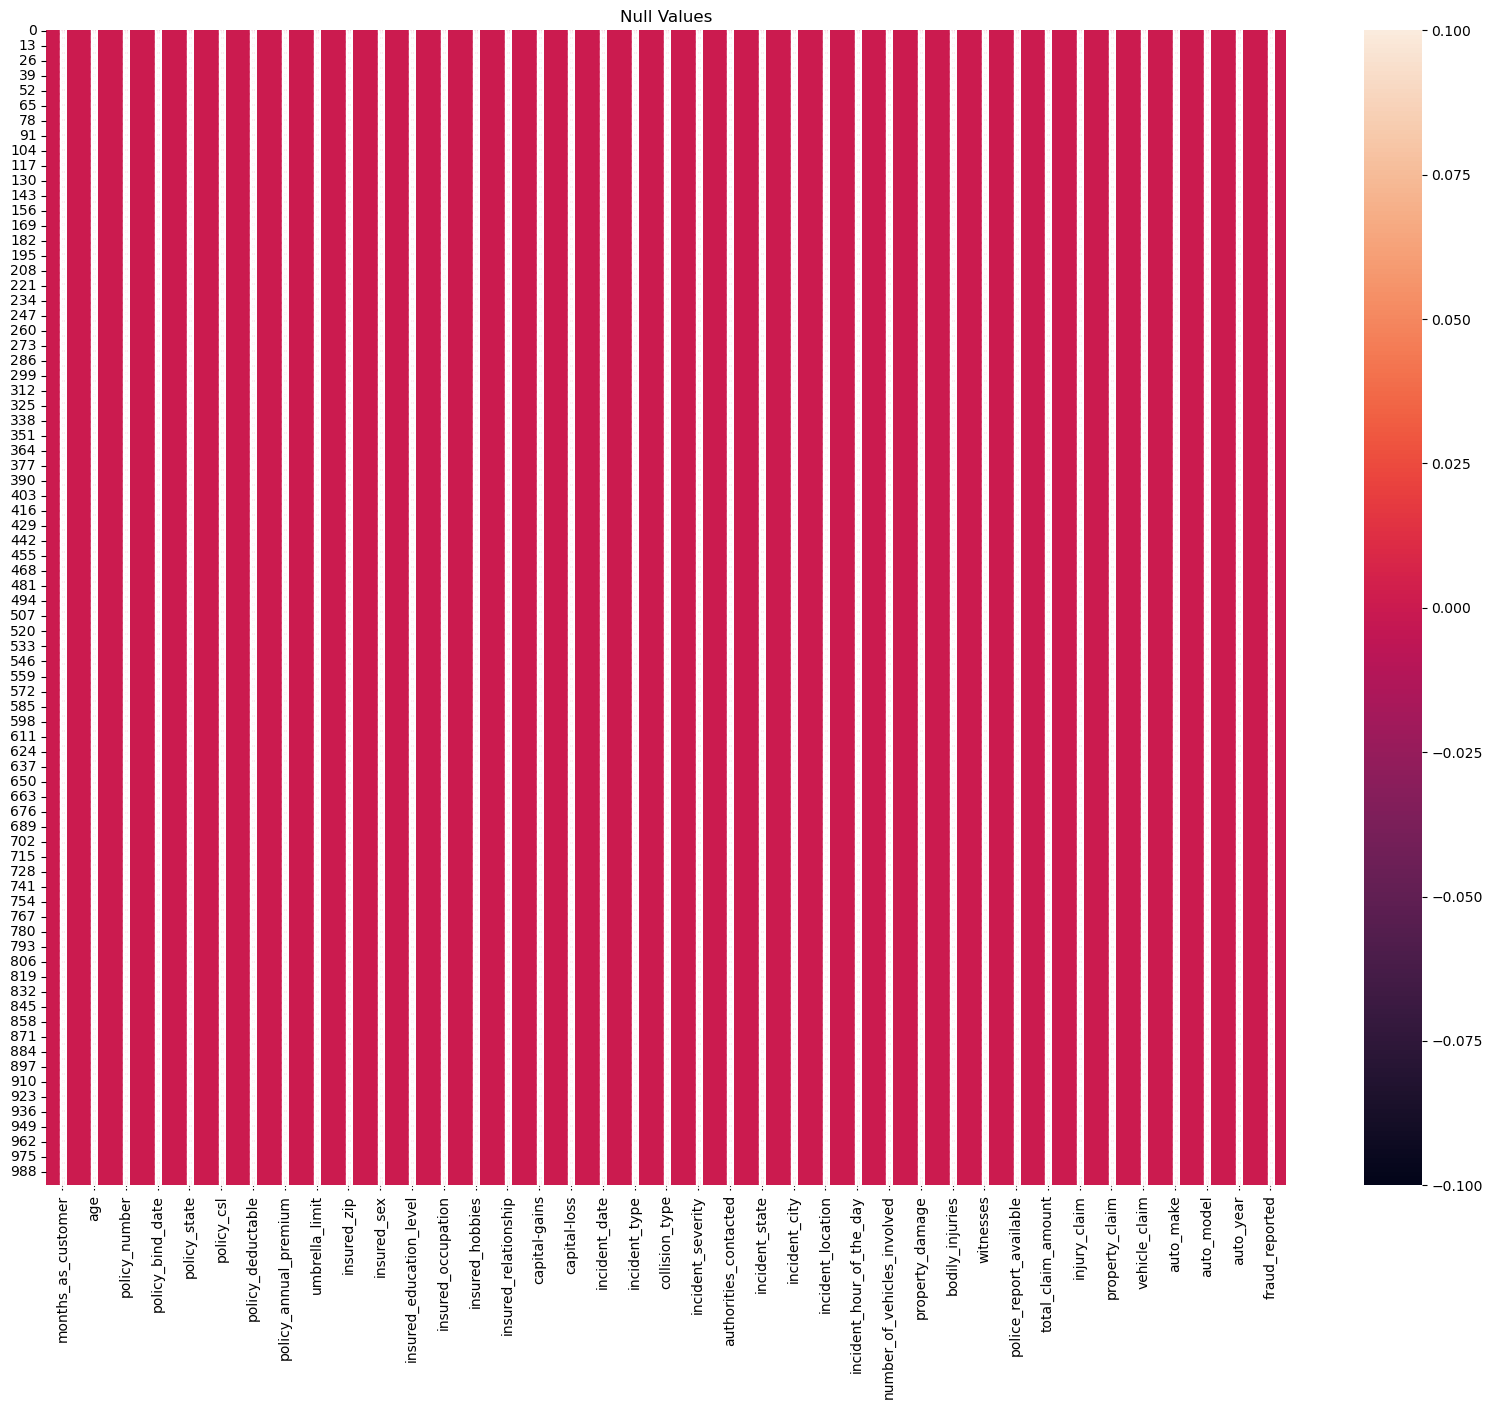

In [18]:
plt.figure(figsize = [20, 15])
sns.heatmap(ClaimFraud_Ds.isnull(), annot = True)                          
plt.title('Null Values')
plt.show()

In [19]:
ClaimFraud_Ds.describe()

months_as_customer          age  policy_number  policy_deductable  \
count         1000.000000  1000.000000    1000.000000        1000.000000   
mean           203.954000    38.948000  546238.648000        1136.000000   
std            115.113174     9.140287  257063.005276         611.864673   
min              0.000000    19.000000  100804.000000         500.000000   
25%            115.750000    32.000000  335980.250000         500.000000   
50%            199.500000    38.000000  533135.000000        1000.000000   
75%            276.250000    44.000000  759099.750000        2000.000000   
max            479.000000    64.000000  999435.000000        2000.000000   

       policy_annual_premium  umbrella_limit    insured_zip  capital-gains  \
count            1000.000000    1.000000e+03    1000.000000    1000.000000   
mean             1256.406150    1.101000e+06  501214.488000   25126.100000   
std               244.167395    2.297407e+06   71701.610941   27872.187708   
min               433.330000   -1.000000e+06  430104.000000       0.000000   
25%              1089.607500    0.000000e+00  448404.500000       0.000000   
50%              1257.200000    0.000000e+00  466445.500000       0.000000   
75%              1415.695000    0.000000e+00  603251.000000   51025.000000   
max              2047.590000    1.000000e+07  620962.000000  100500.000000   

        capital-loss  incident_hour_of_the_day  number_of_vehicles_involved  \
count    1000.000000               1000.000000                   1000.00000   
mean   -26793.700000                 11.644000                      1.83900   
std     28104.096686                  6.951373                      1.01888   
min   -111100.000000                  0.000000                      1.00000   
25%    -51500.000000                  6.000000                      1.00000   
50%    -23250.000000                 12.000000                      1.00000   
75%         0.000000                 17.000000                      3.00000   
max         0.000000                 23.000000                      4.00000   

       bodily_injuries    witnesses  total_claim_amount  injury_claim  \
count      1000.000000  1000.000000          1000.00000   1000.000000   
mean          0.992000     1.487000         52761.94000   7433.420000   
std           0.820127     1.111335         26401.53319   4880.951853   
min           0.000000     0.000000           100.00000      0.000000   
25%           0.000000     1.000000         41812.50000   4295.000000   
50%           1.000000     1.000000         58055.00000   6775.000000   
75%           2.000000     2.000000         70592.50000  11305.000000   
max           2.000000     3.000000        114920.00000  21450.000000   

       property_claim  vehicle_claim    auto_year  
count     1000.000000    1000.000000  1000.000000  
mean      7399.570000   37928.950000  2005.103000  
std       4824.726179   18886.252893     6.015861  
min          0.000000      70.000000  1995.000000  
25%       4445.000000   30292.500000  2000.000000  
50%       6750.000000   42100.000000  2005.000000  
75%      10885.000000   50822.500000  2010.000000  
max      23670.000000   79560.000000  2015.000000

Outliers are present in the columns "months_as_customer","age","policy_number","policy_annual_premium"..etc as there is a gap between 75% and maximum data

Categorical Variables

In [20]:
s = (ClaimFraud_Ds.dtypes == 'object')
cate_cols = list(s[s].index)

print("Categorical variables:")
print(cate_cols)

Categorical variables:
['policy_bind_date', 'policy_state', 'policy_csl', 'insured_sex', 'insured_education_level', 'insured_occupation', 'insured_hobbies', 'insured_relationship', 'incident_date', 'incident_type', 'collision_type', 'incident_severity', 'authorities_contacted', 'incident_state', 'incident_city', 'incident_location', 'property_damage', 'police_report_available', 'auto_make', 'auto_model', 'fraud_reported']


In [21]:
s = (ClaimFraud_Ds.dtypes != 'object')
cont_cols  = list(s[s].index)

print(" Numerical variables:")
print(cont_cols )

 Numerical variables:
['months_as_customer', 'age', 'policy_number', 'policy_deductable', 'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'capital-gains', 'capital-loss', 'incident_hour_of_the_day', 'number_of_vehicles_involved', 'bodily_injuries', 'witnesses', 'total_claim_amount', 'injury_claim', 'property_claim', 'vehicle_claim', 'auto_year']


EXploratory Data Analysis

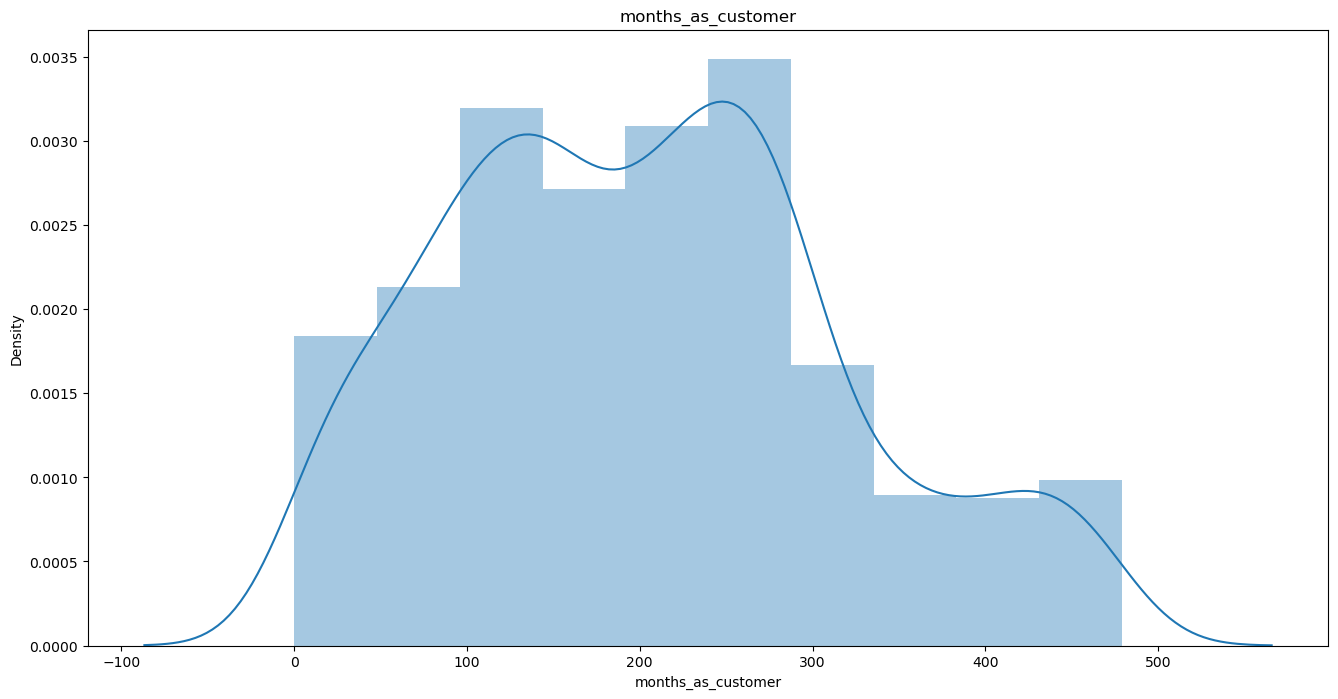

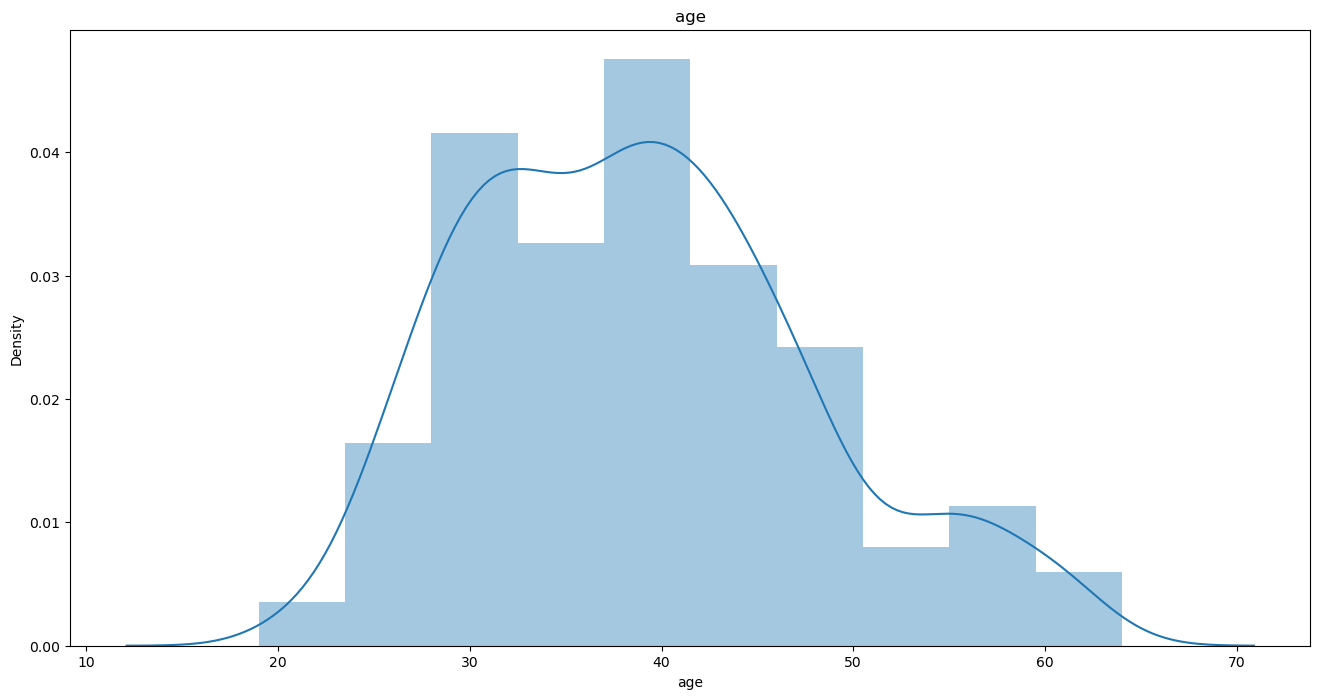

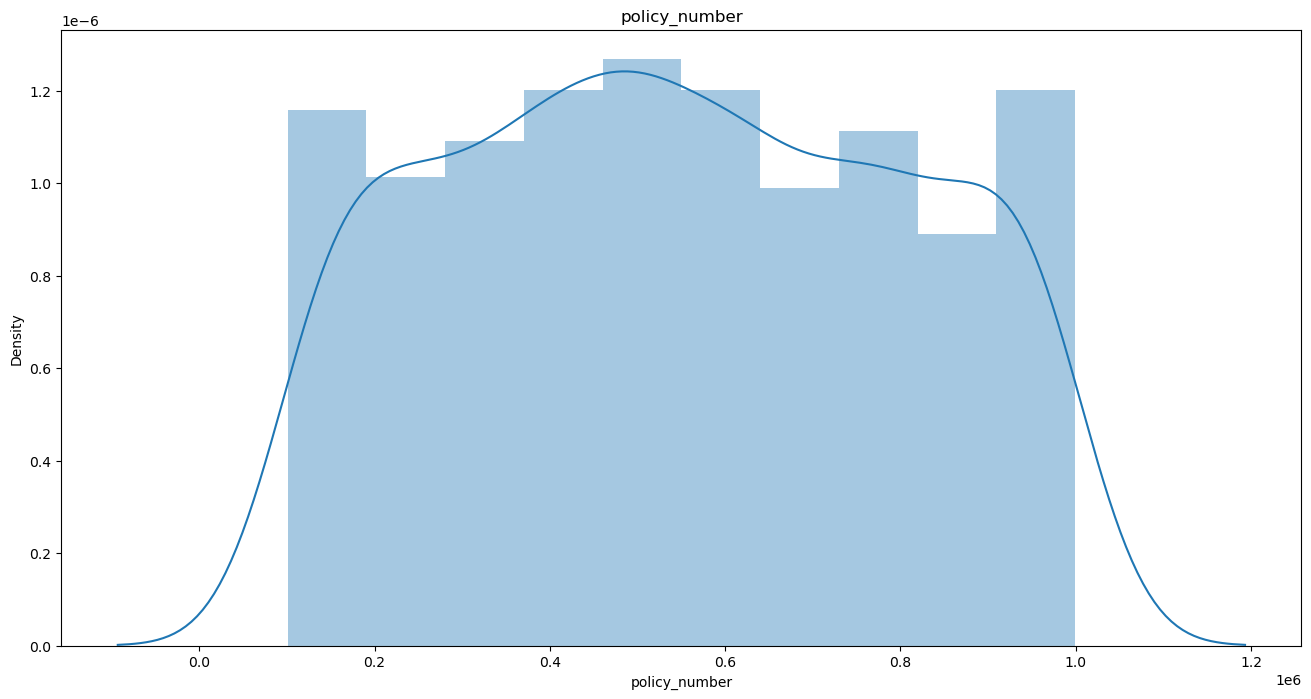

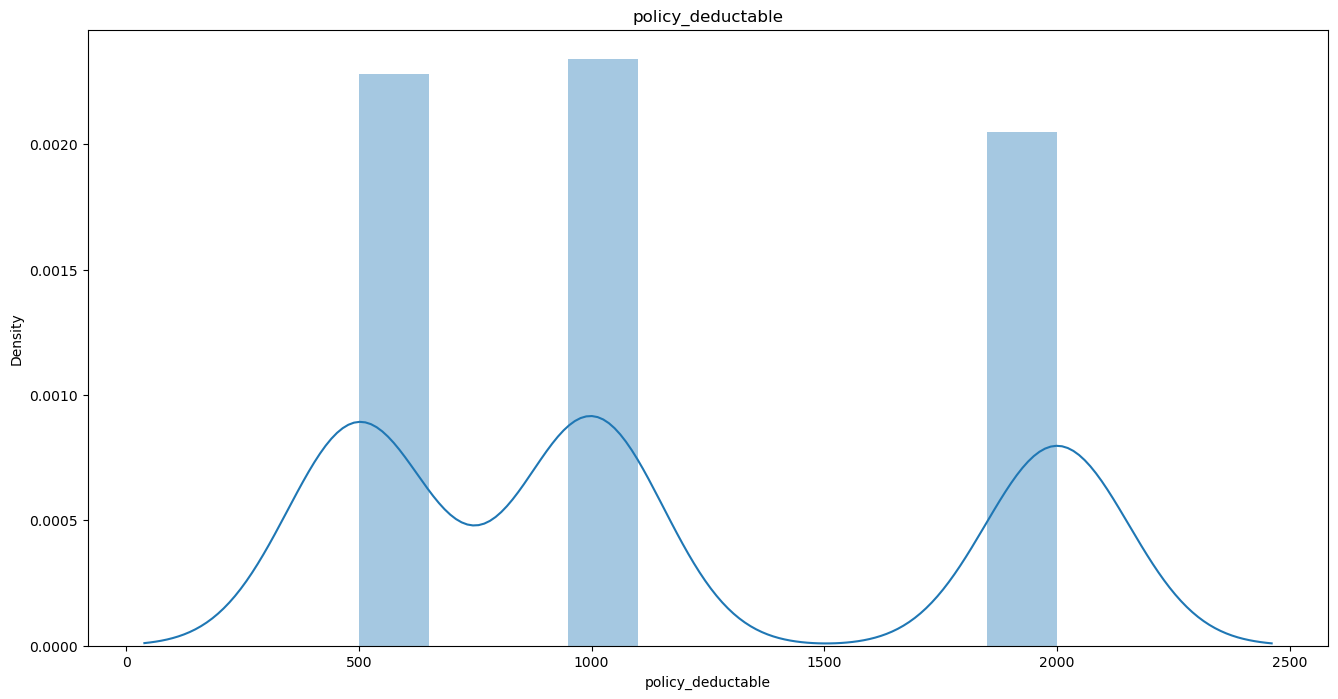

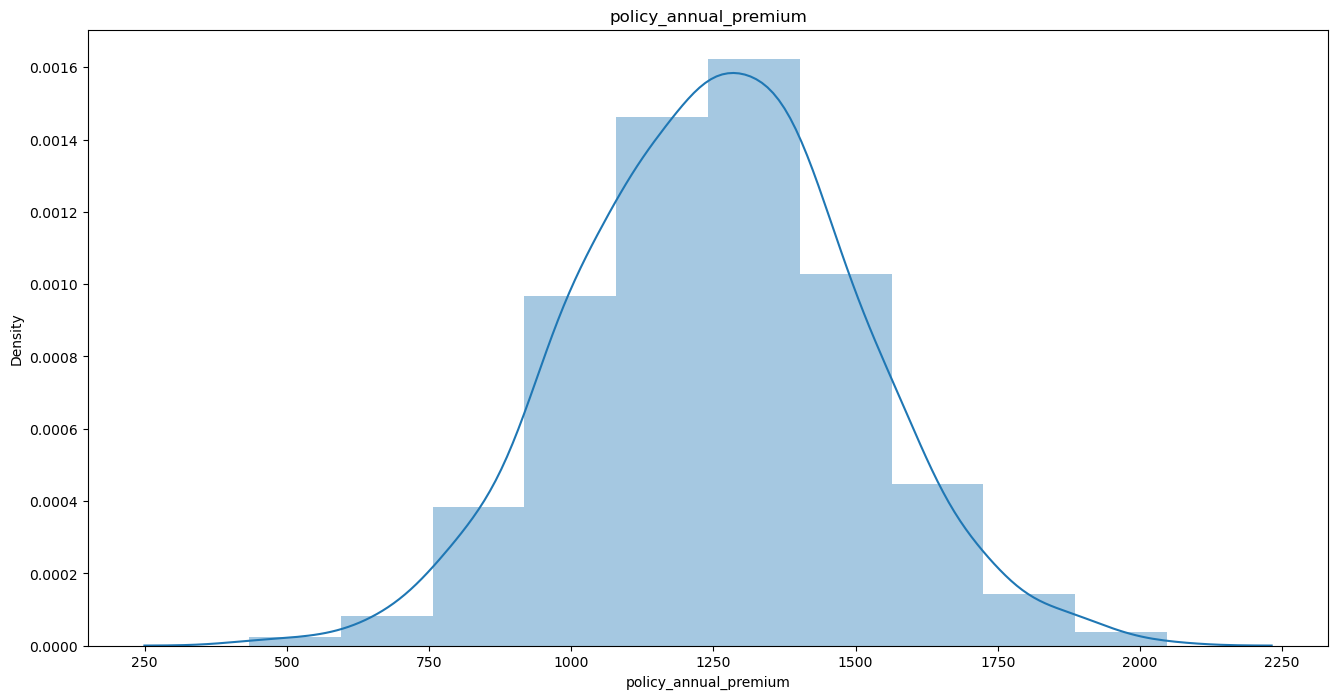

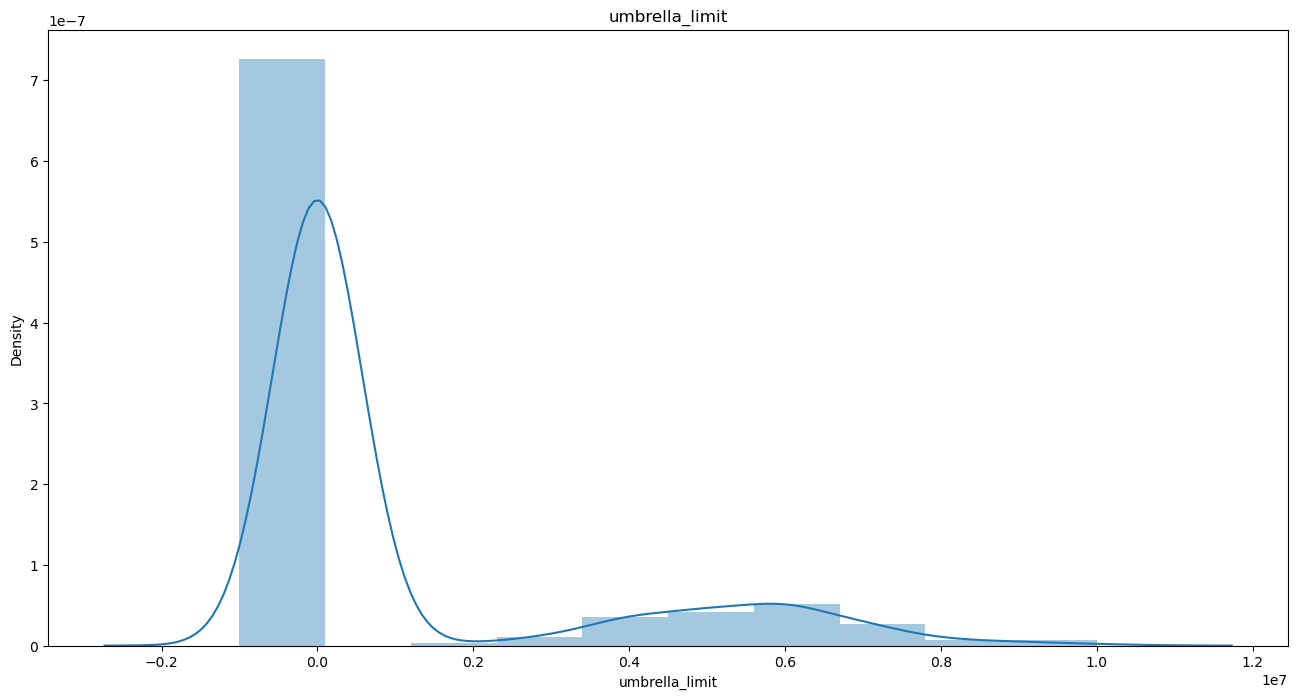

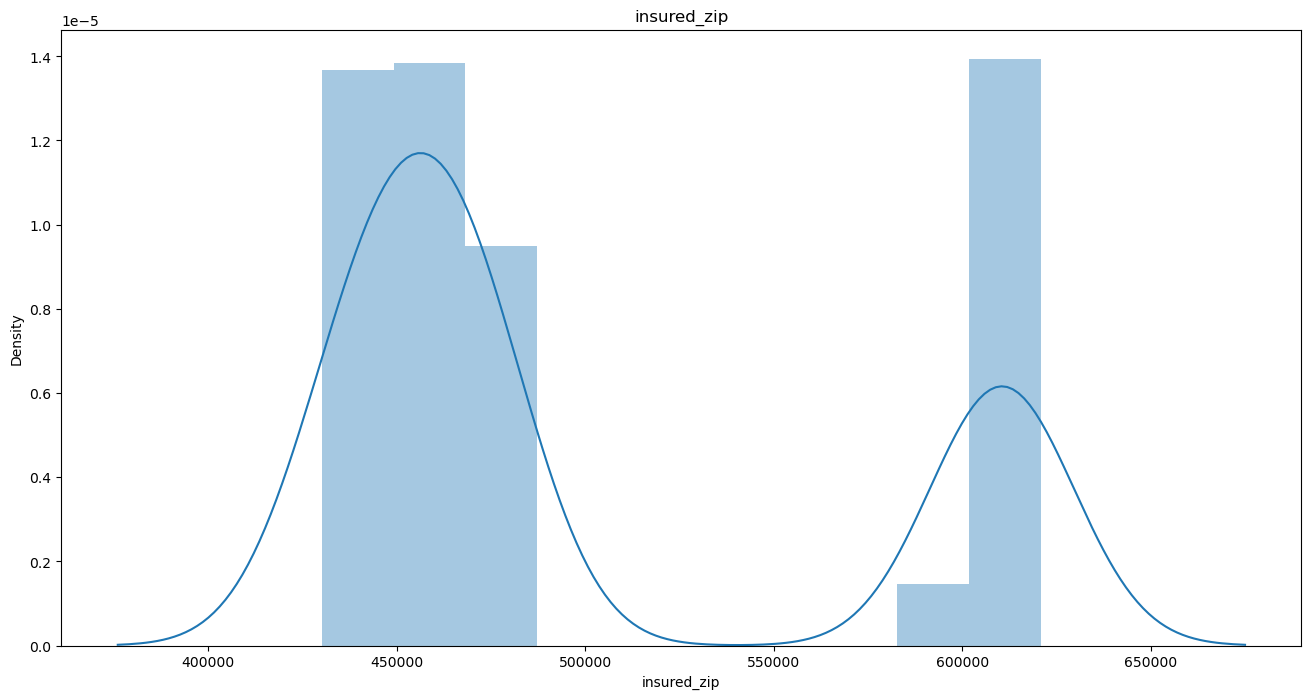

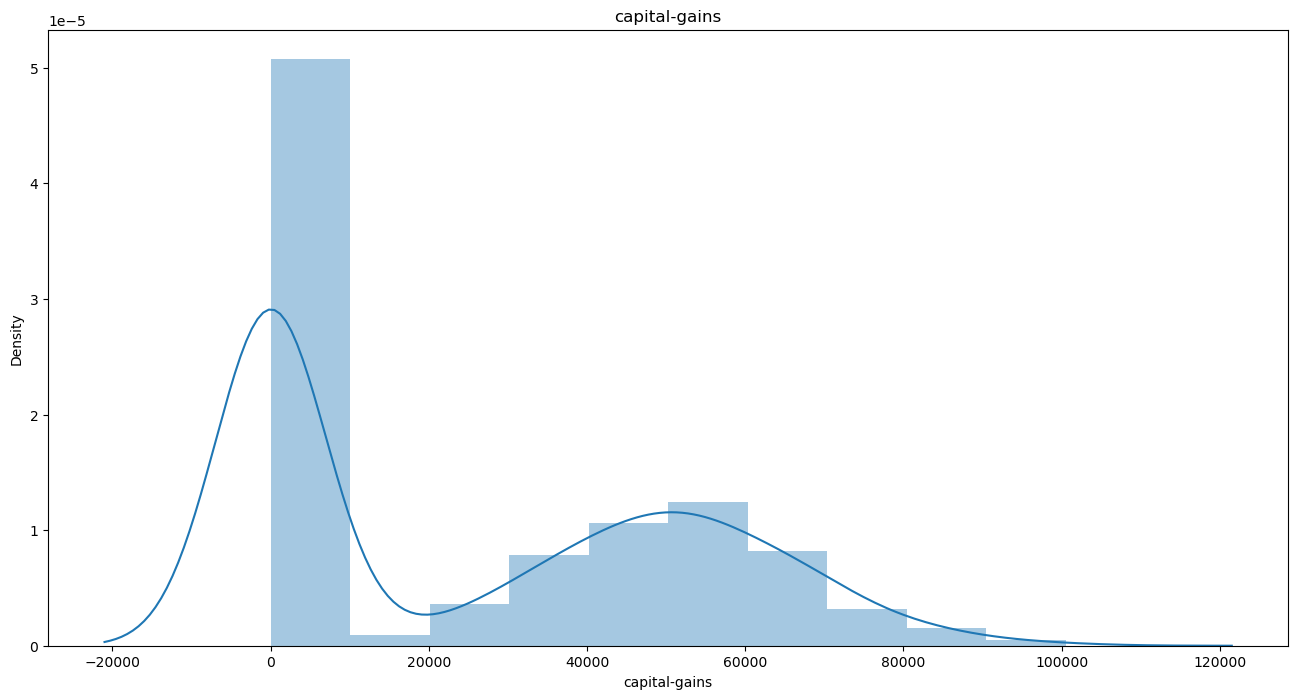

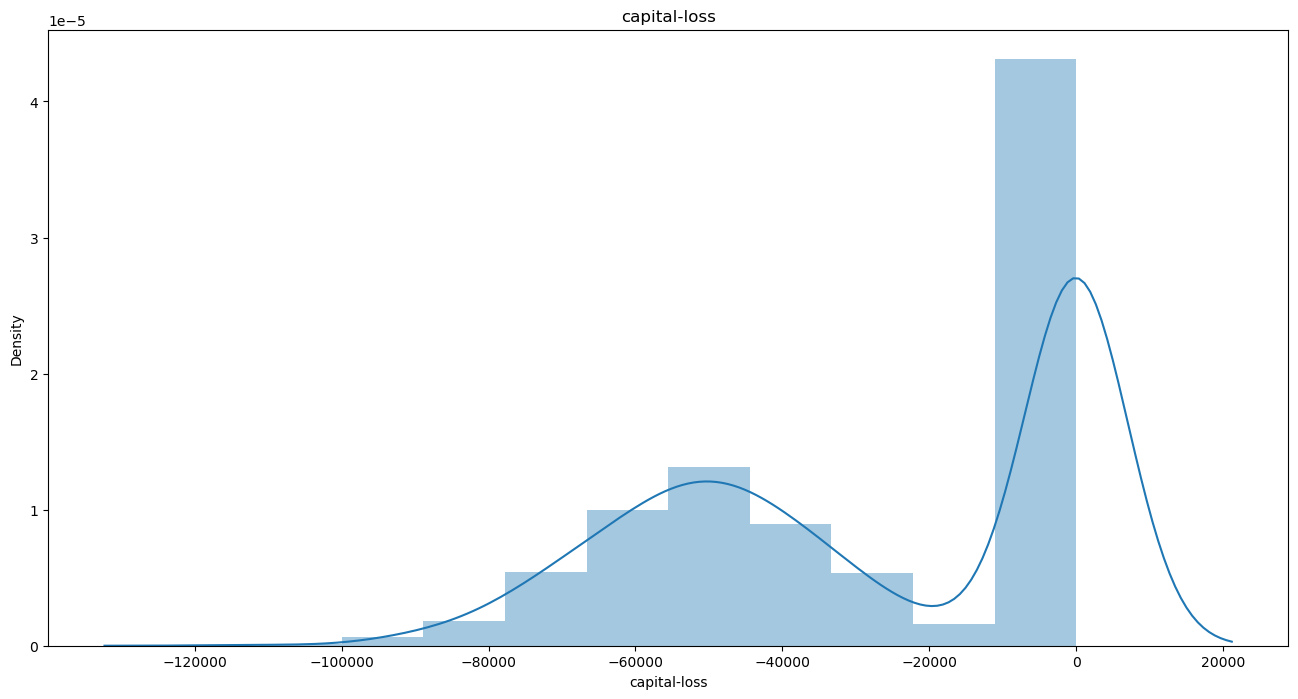

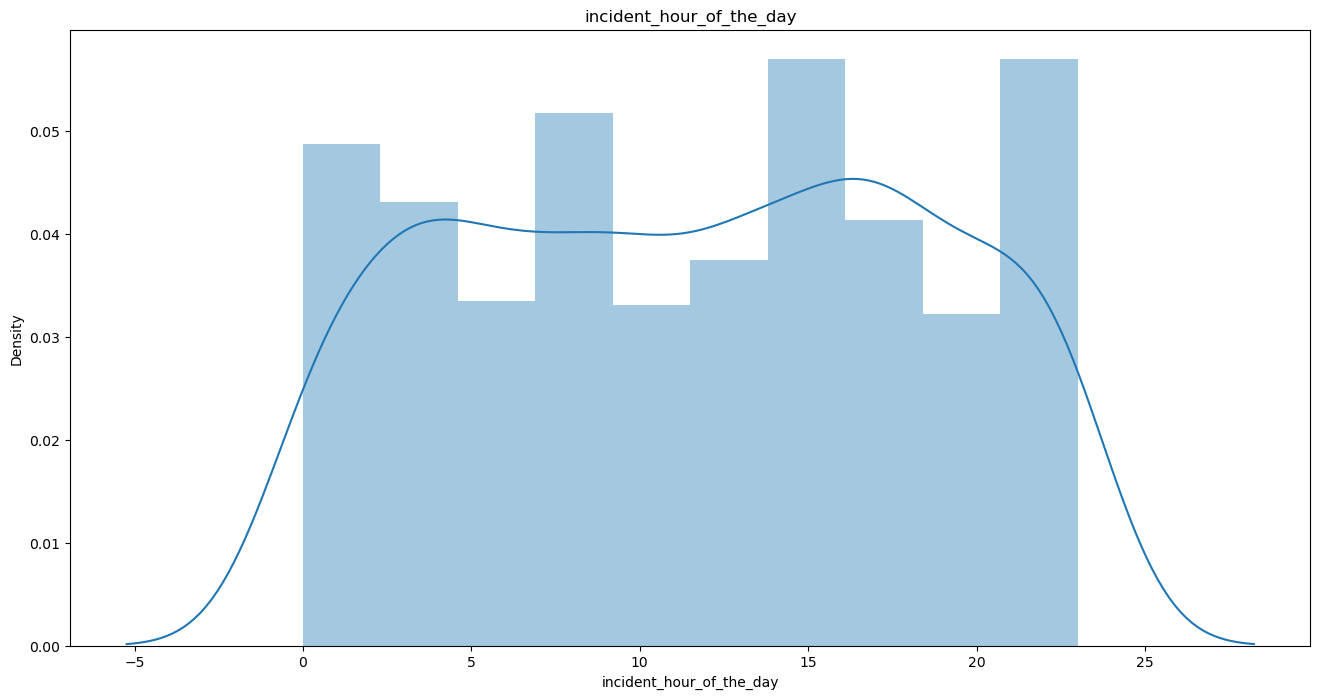

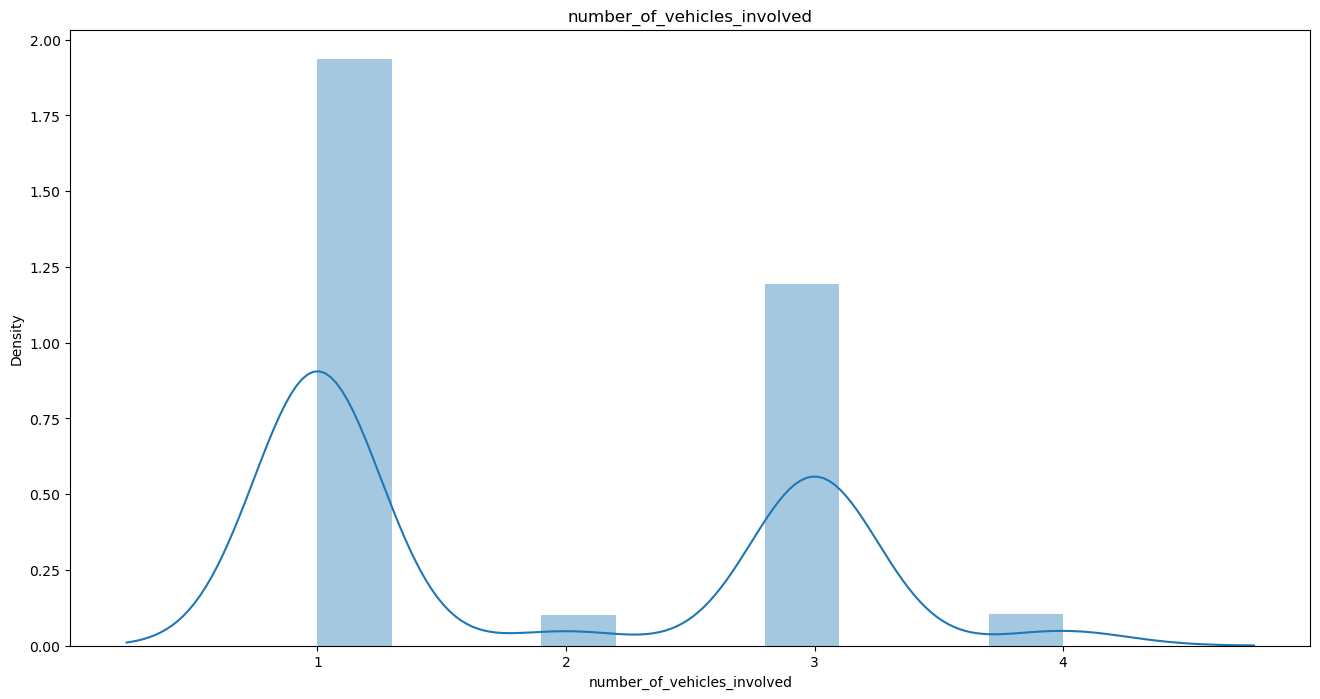

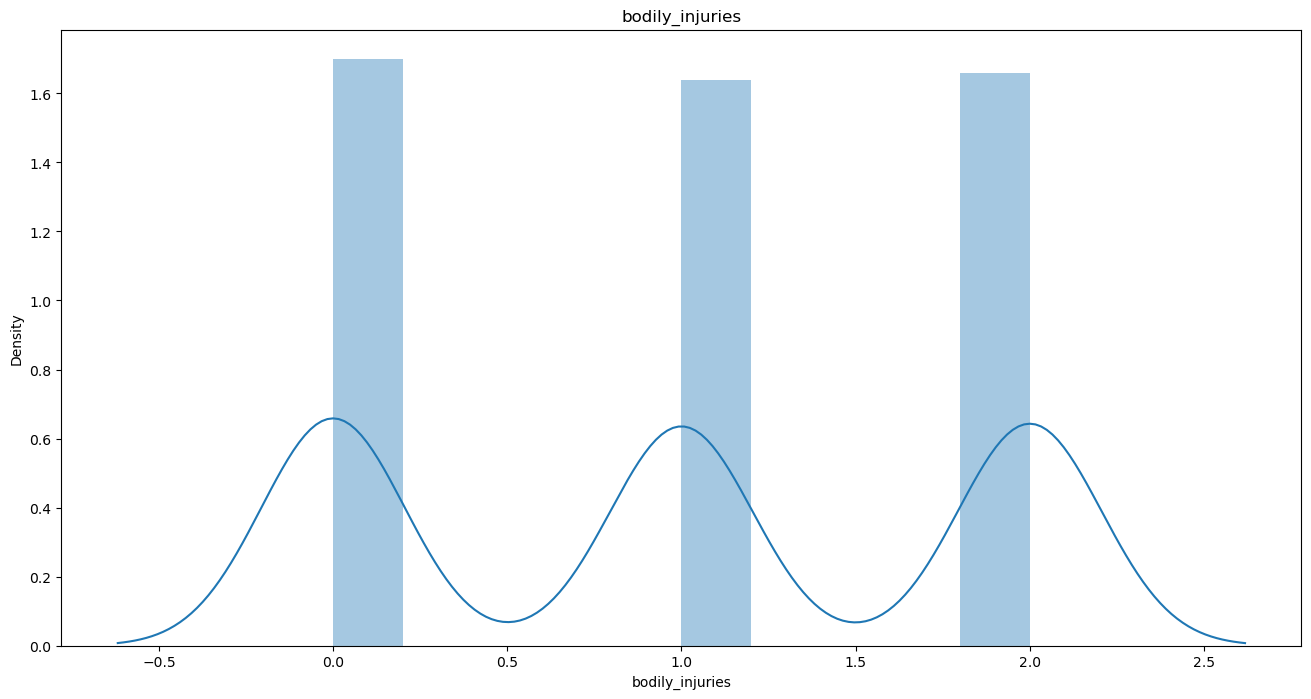

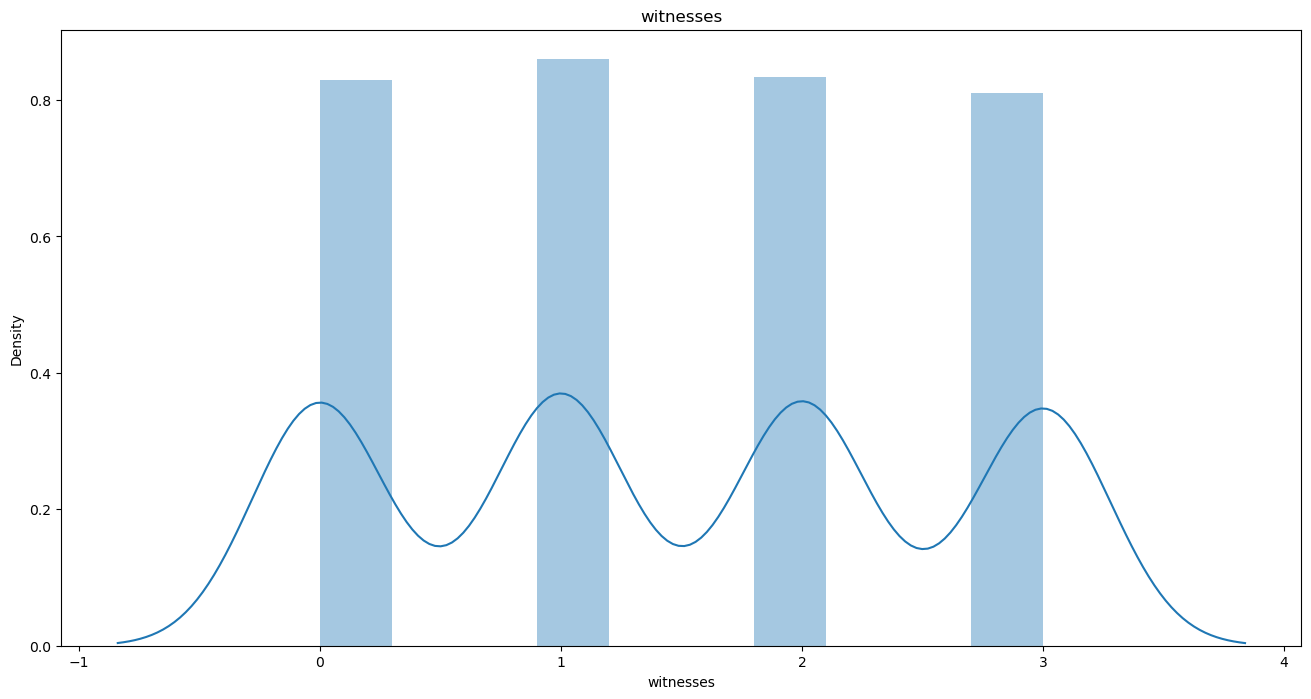

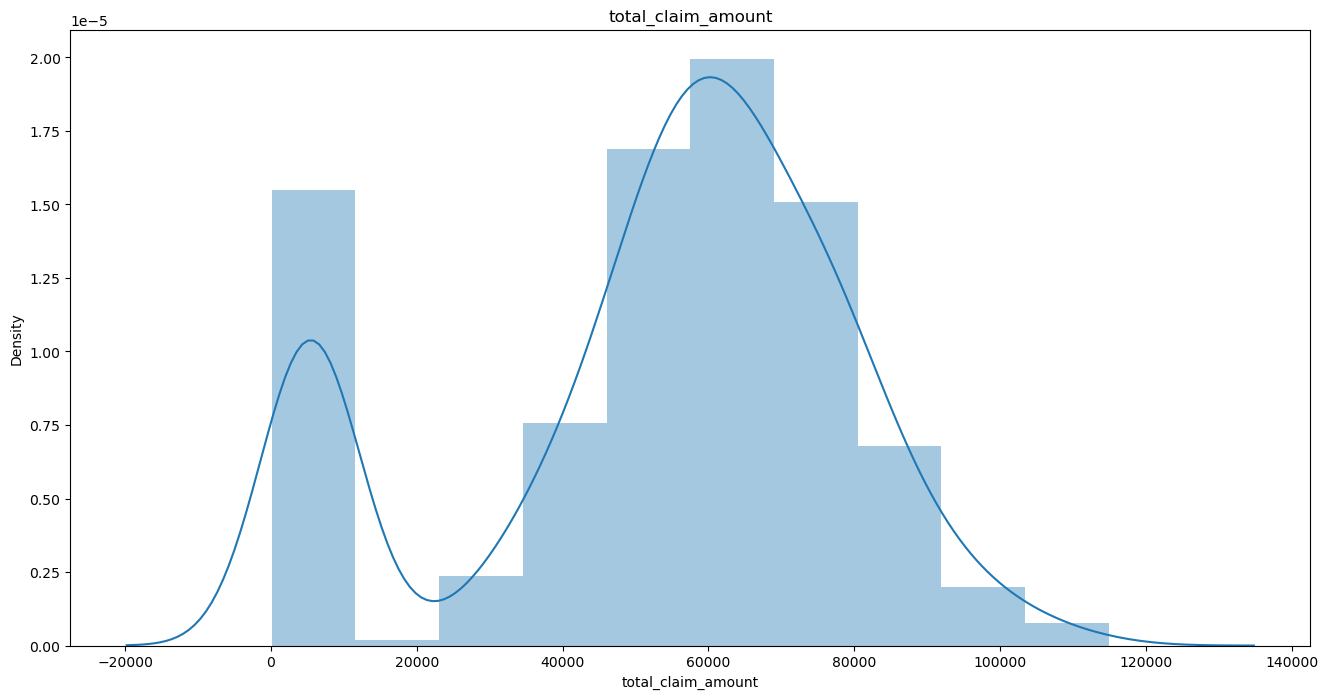

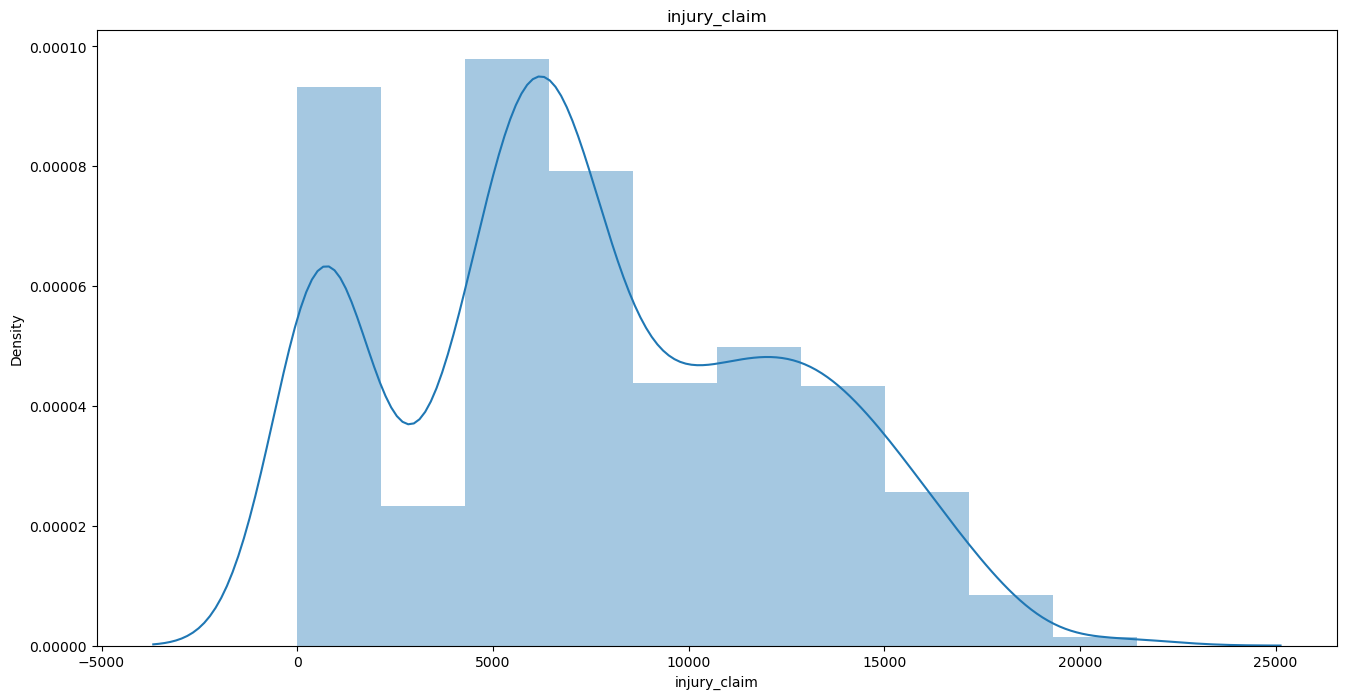

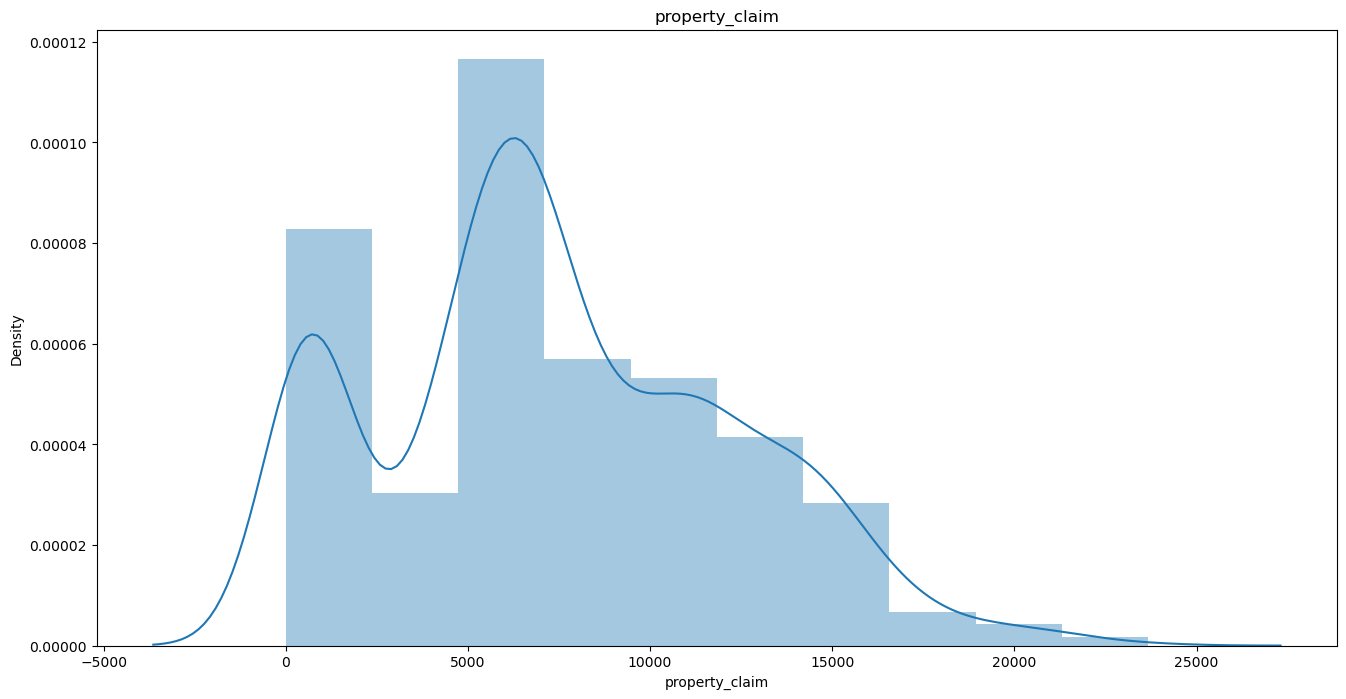

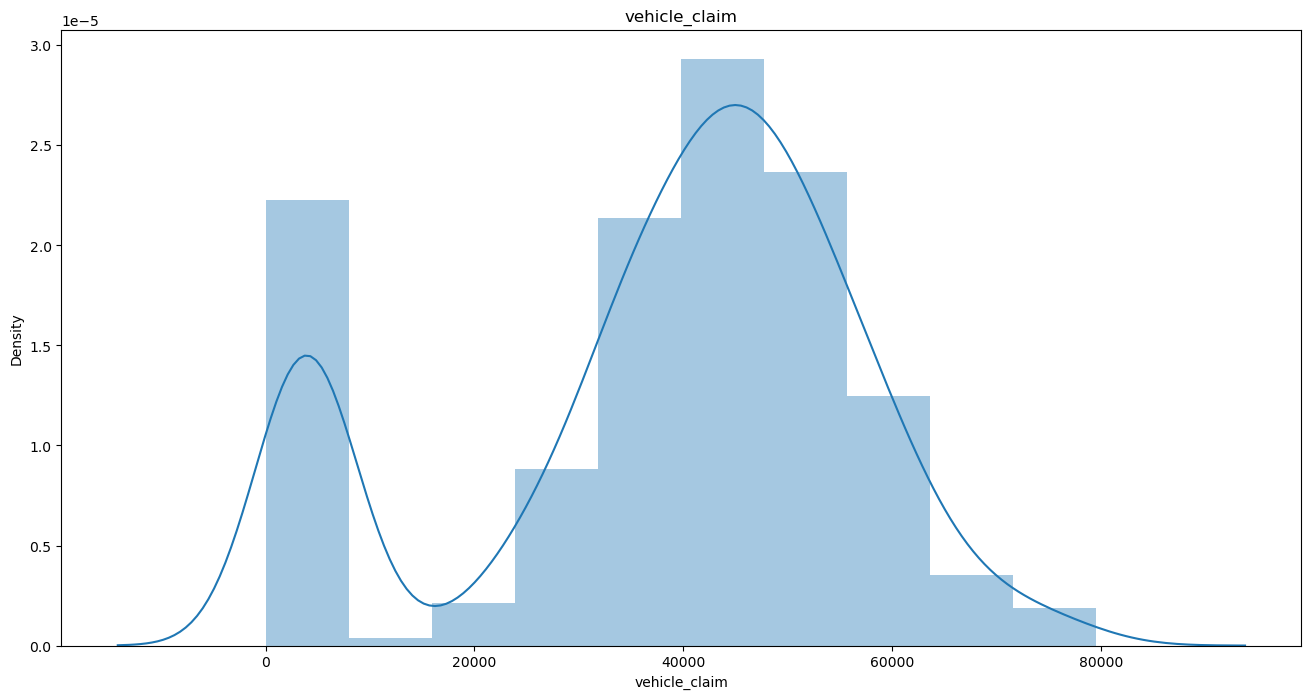

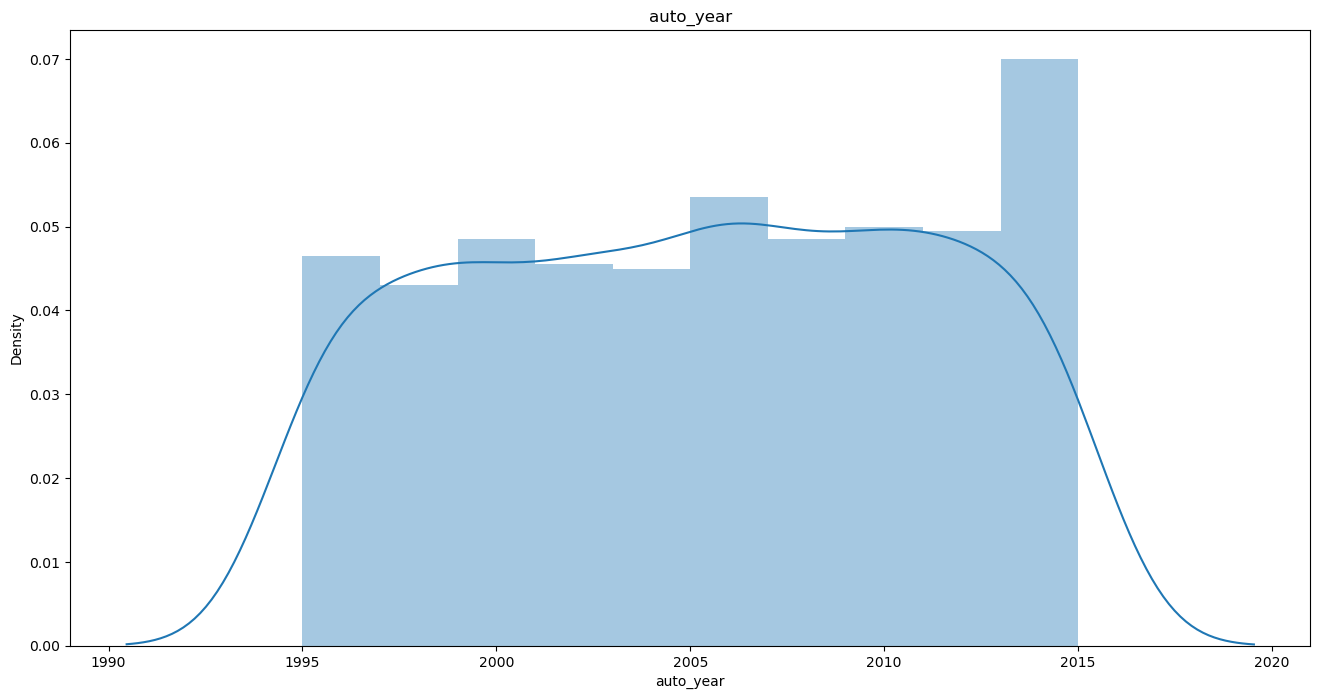

In [22]:
for i in ClaimFraud_Ds[cont_cols]:                         
    plt.figure(figsize = (16, 8))
    sns.distplot(ClaimFraud_Ds[i], bins = 10, kde = True)
    plt.title(i)
    plt.show()

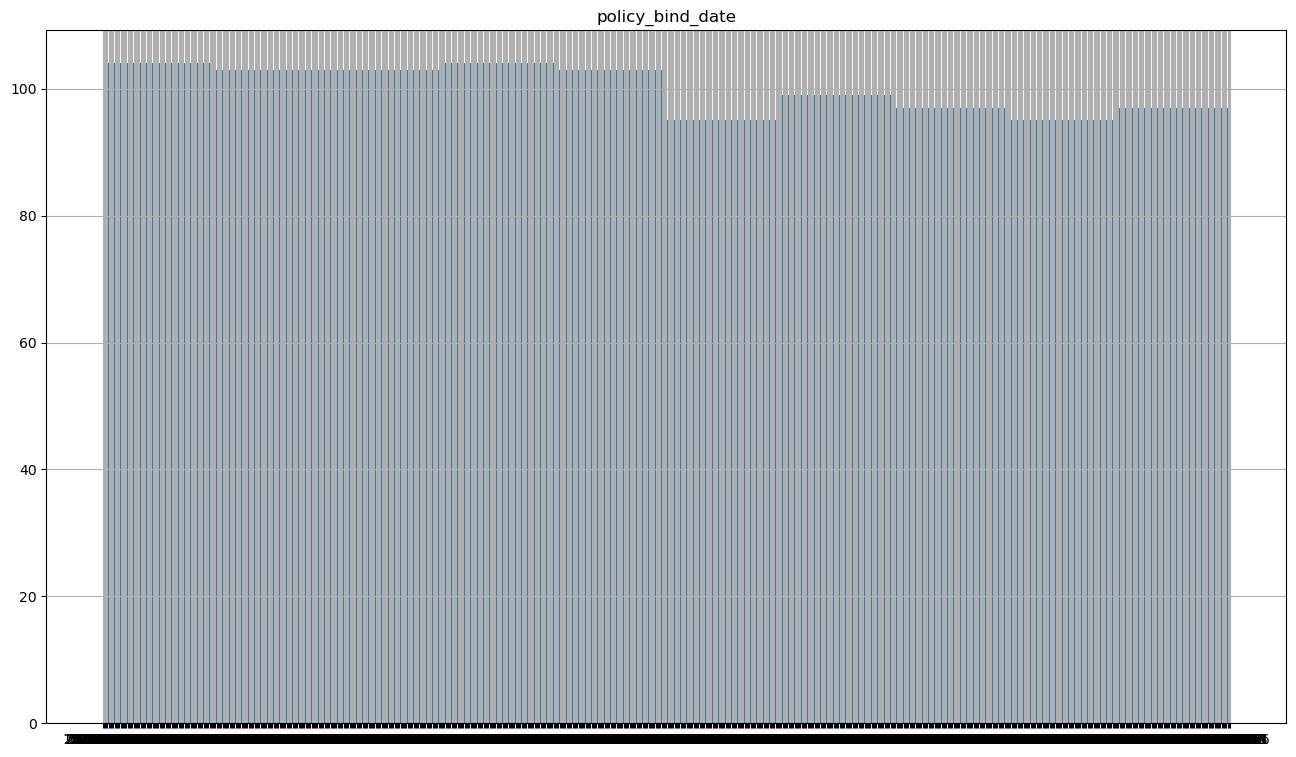

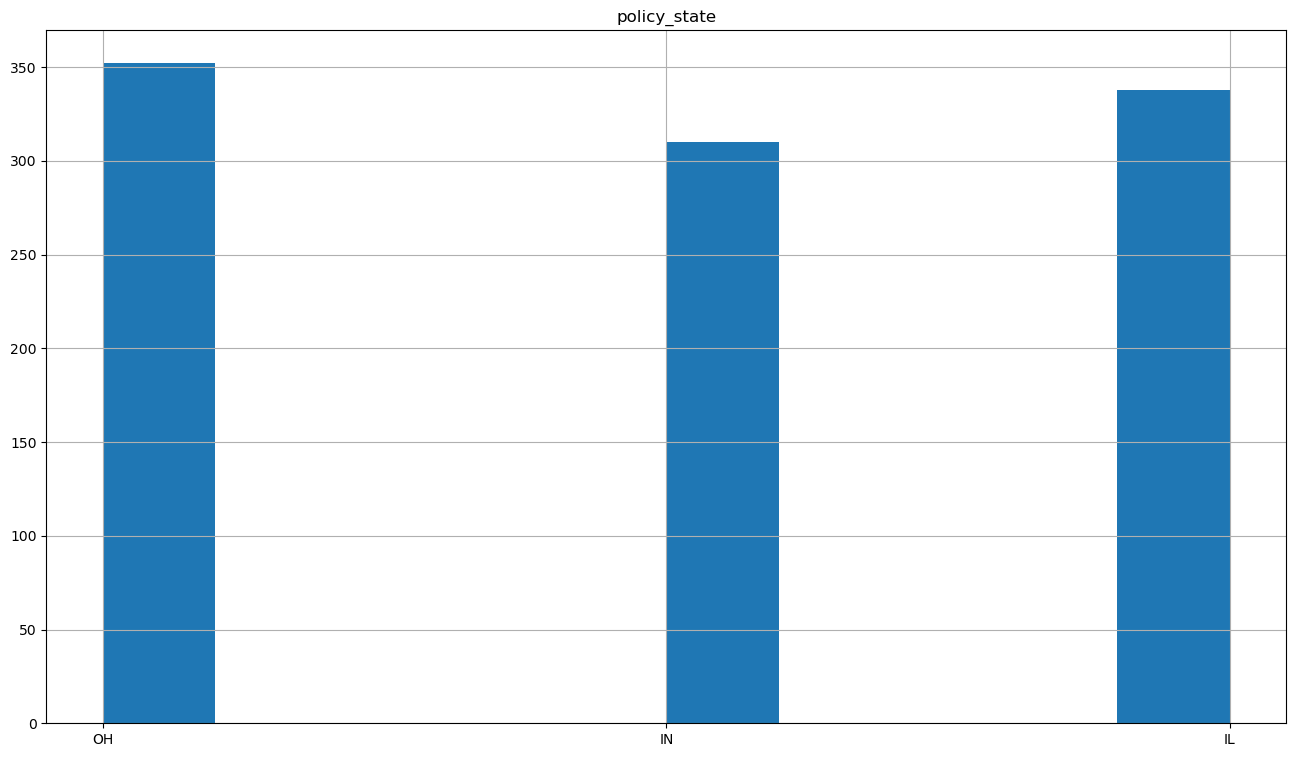

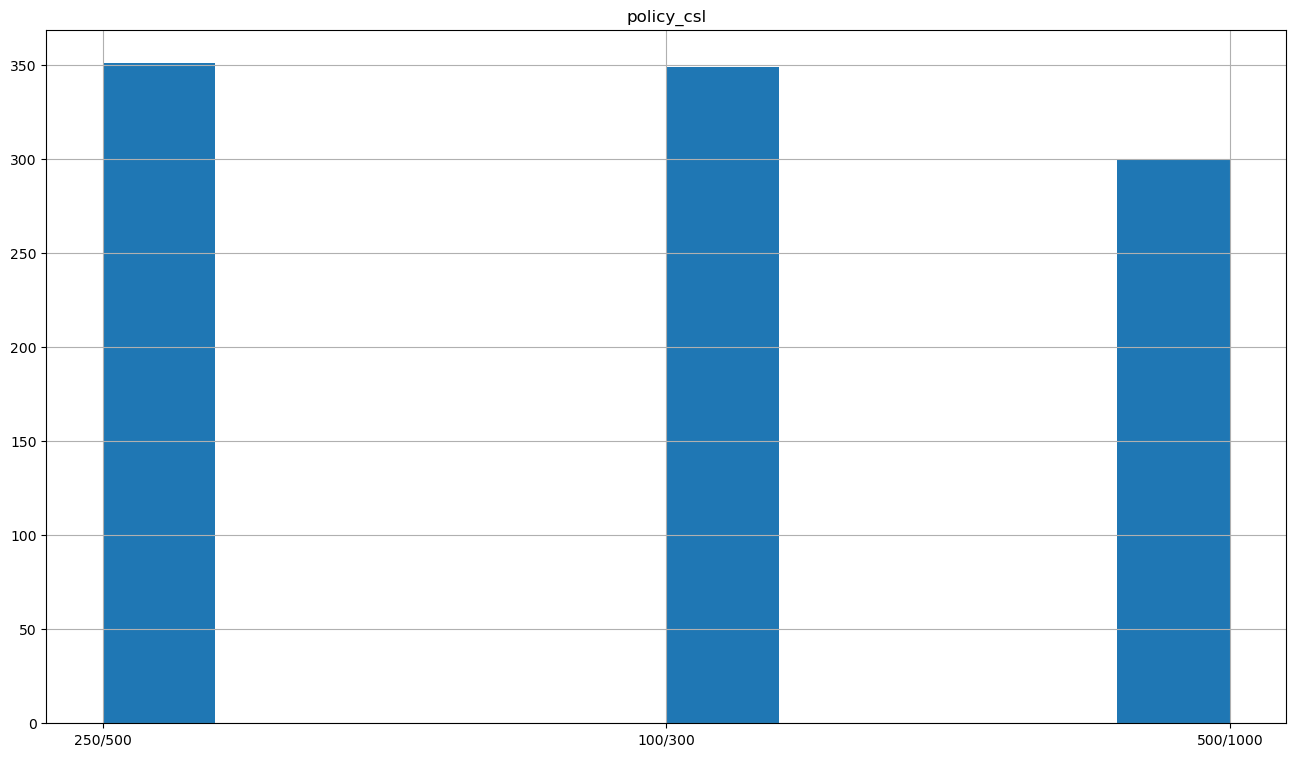

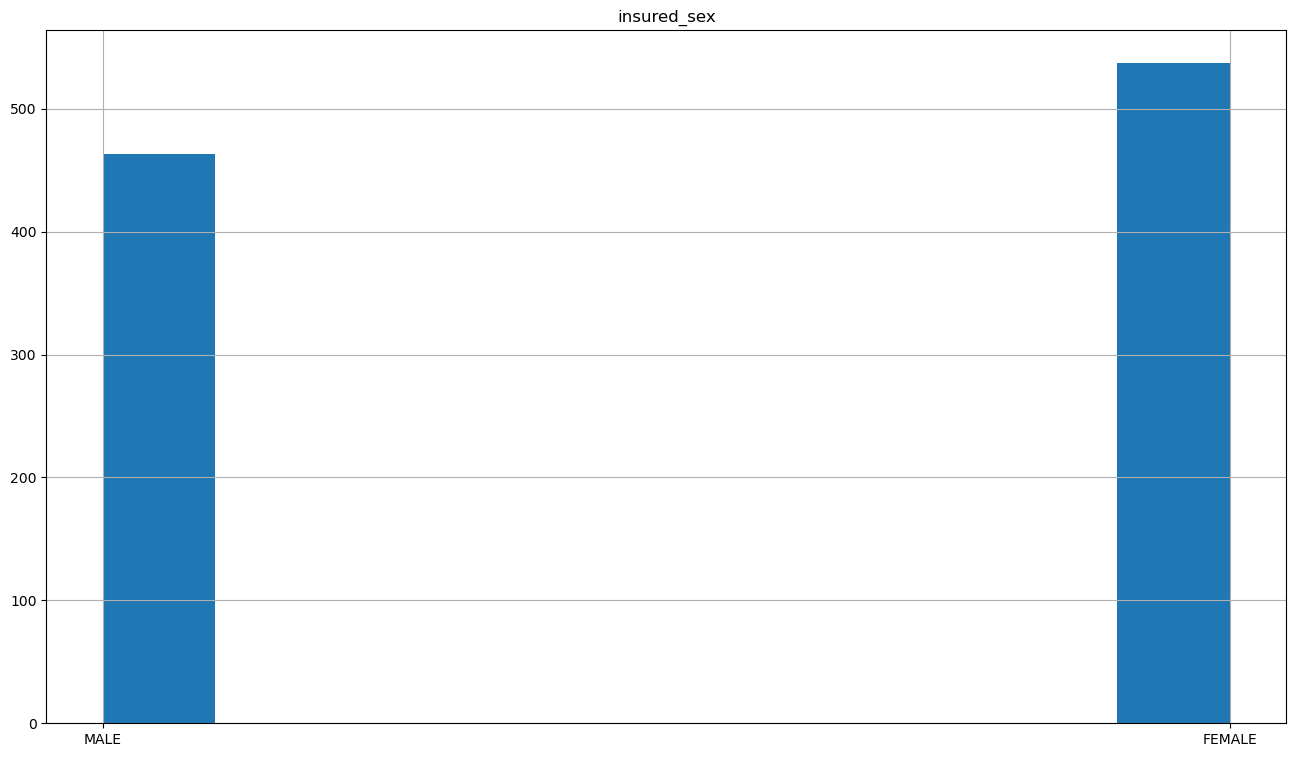

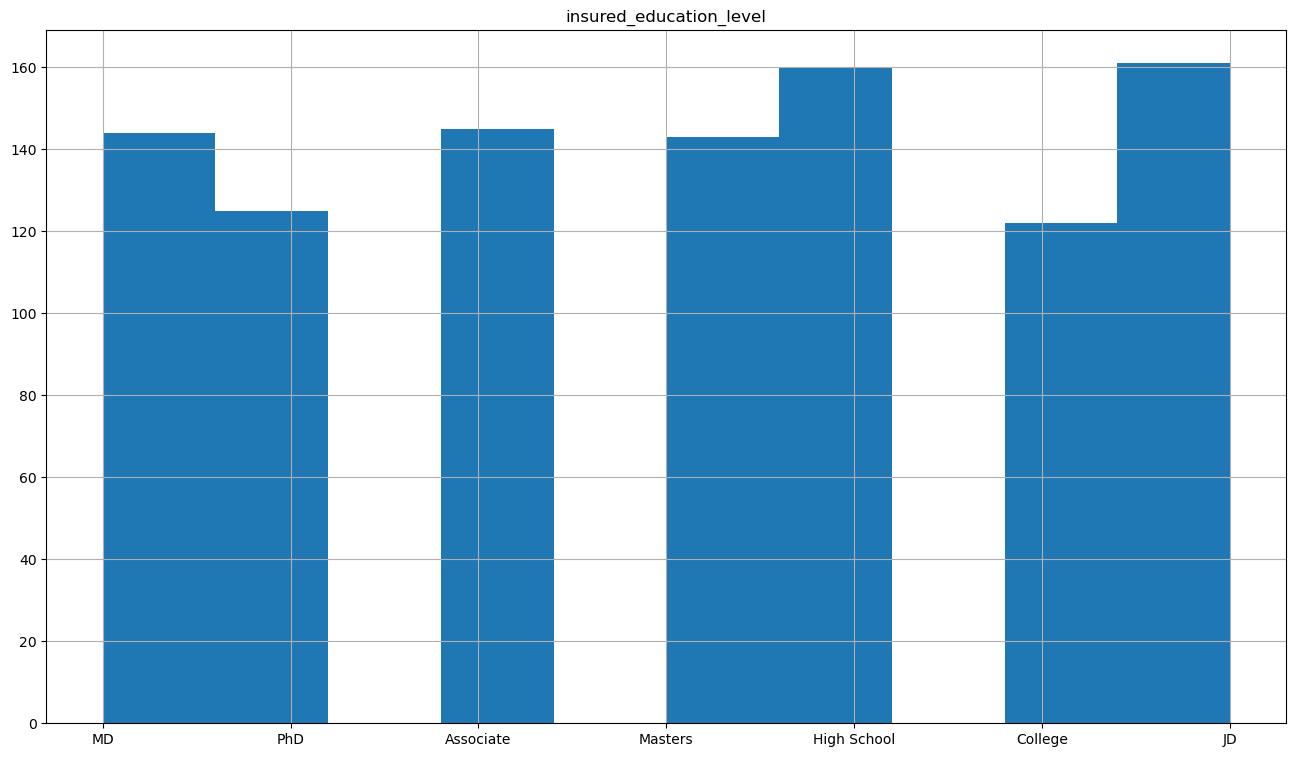

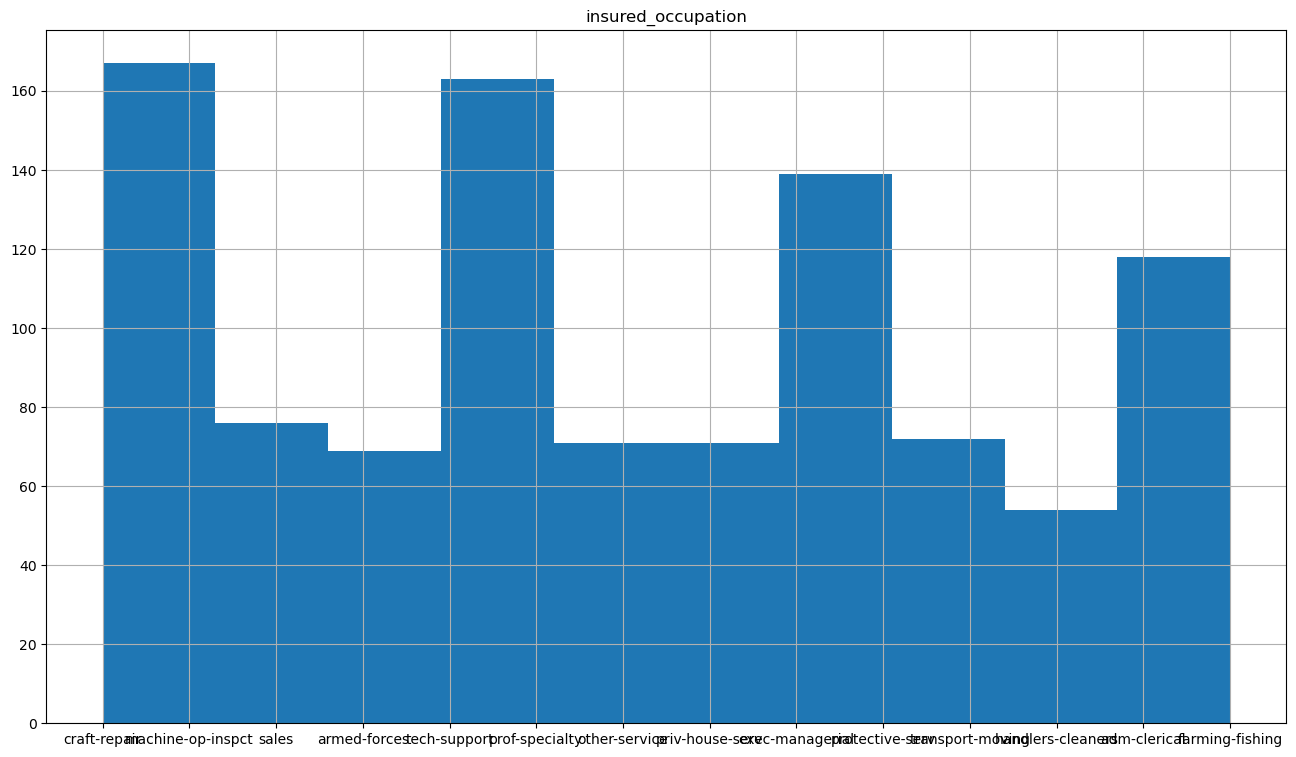

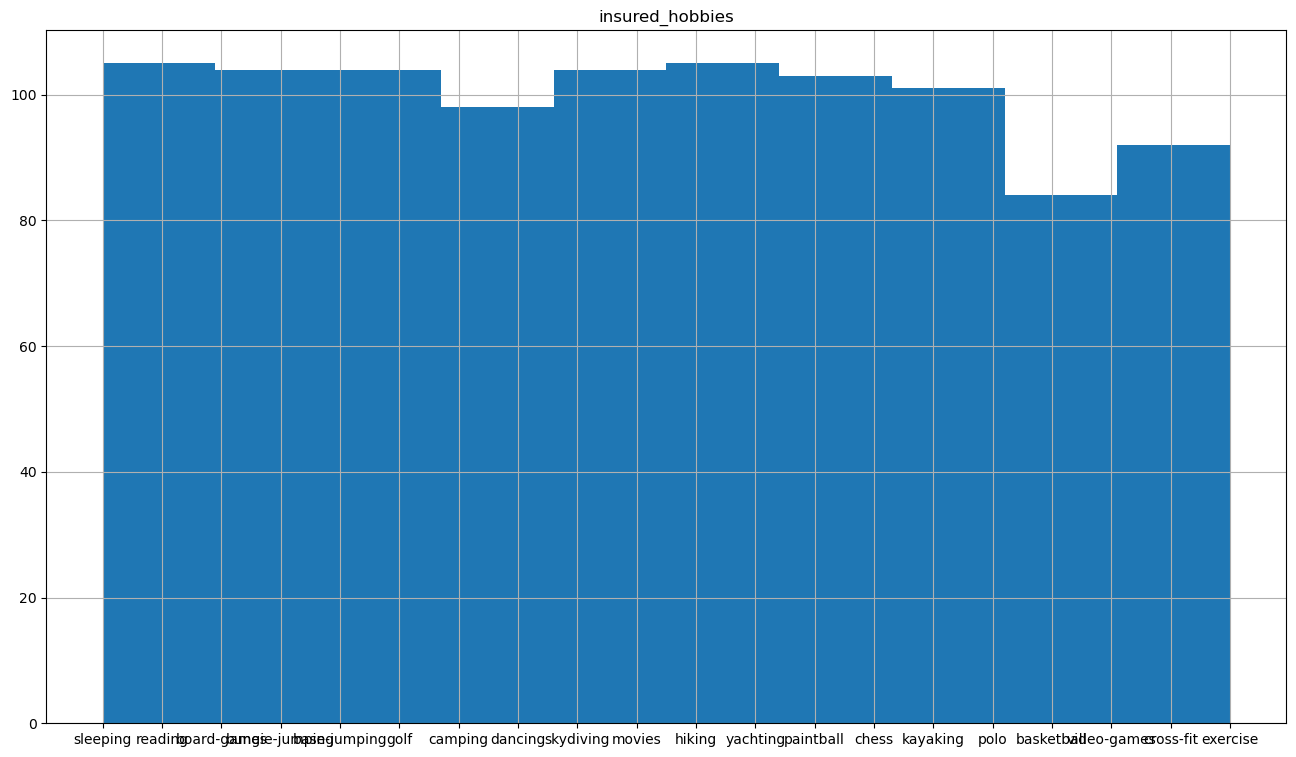

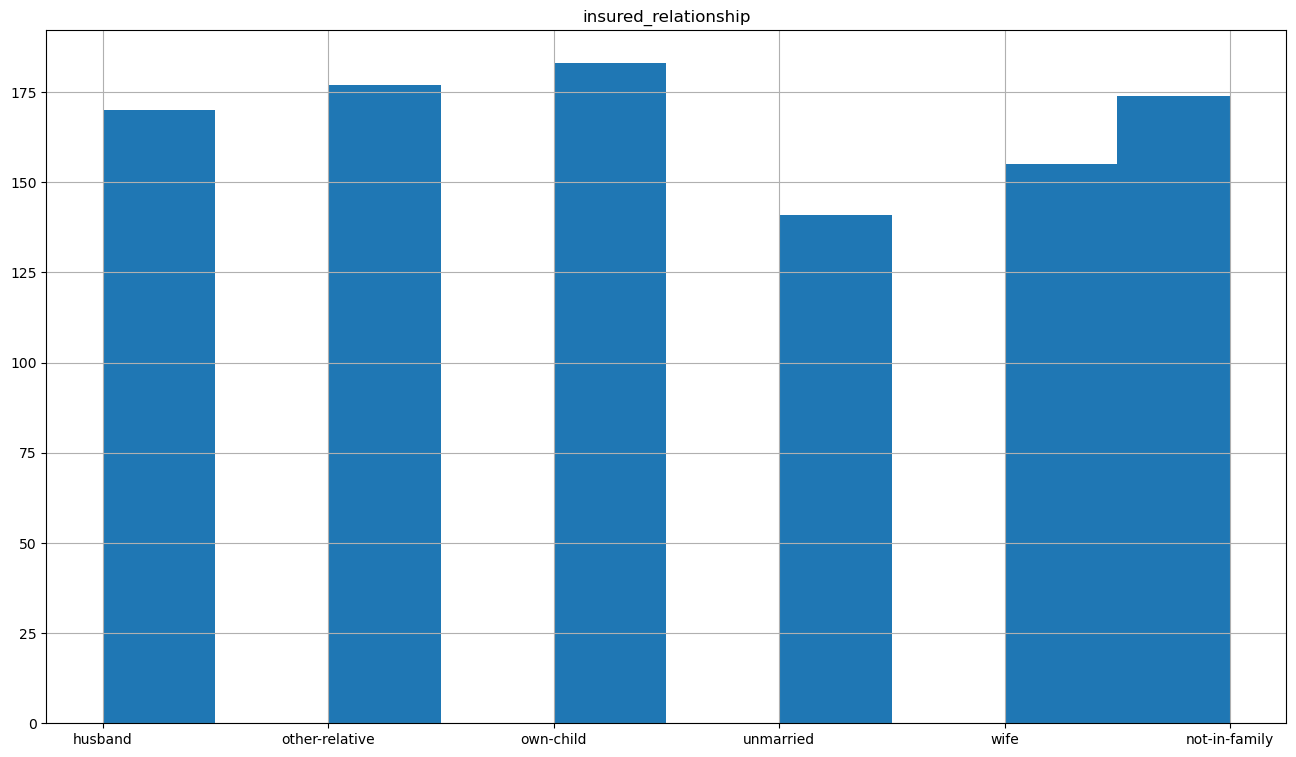

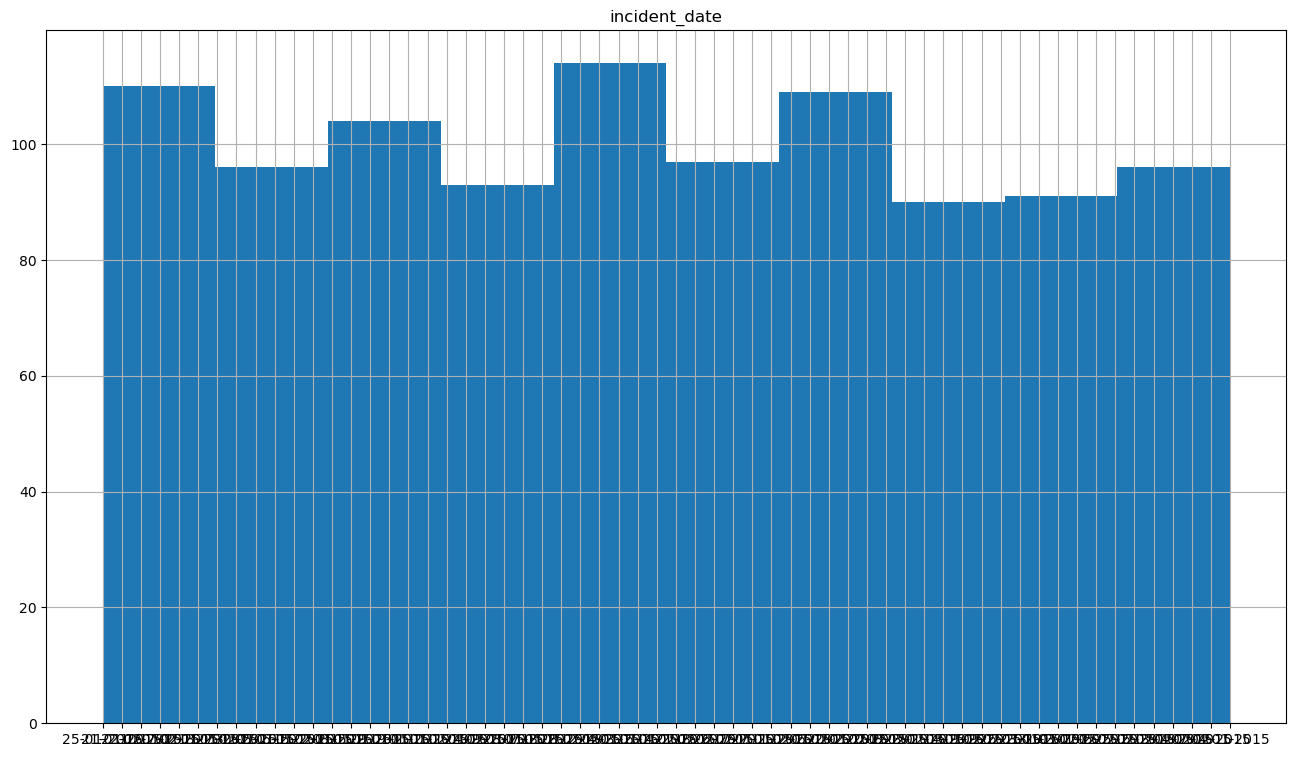

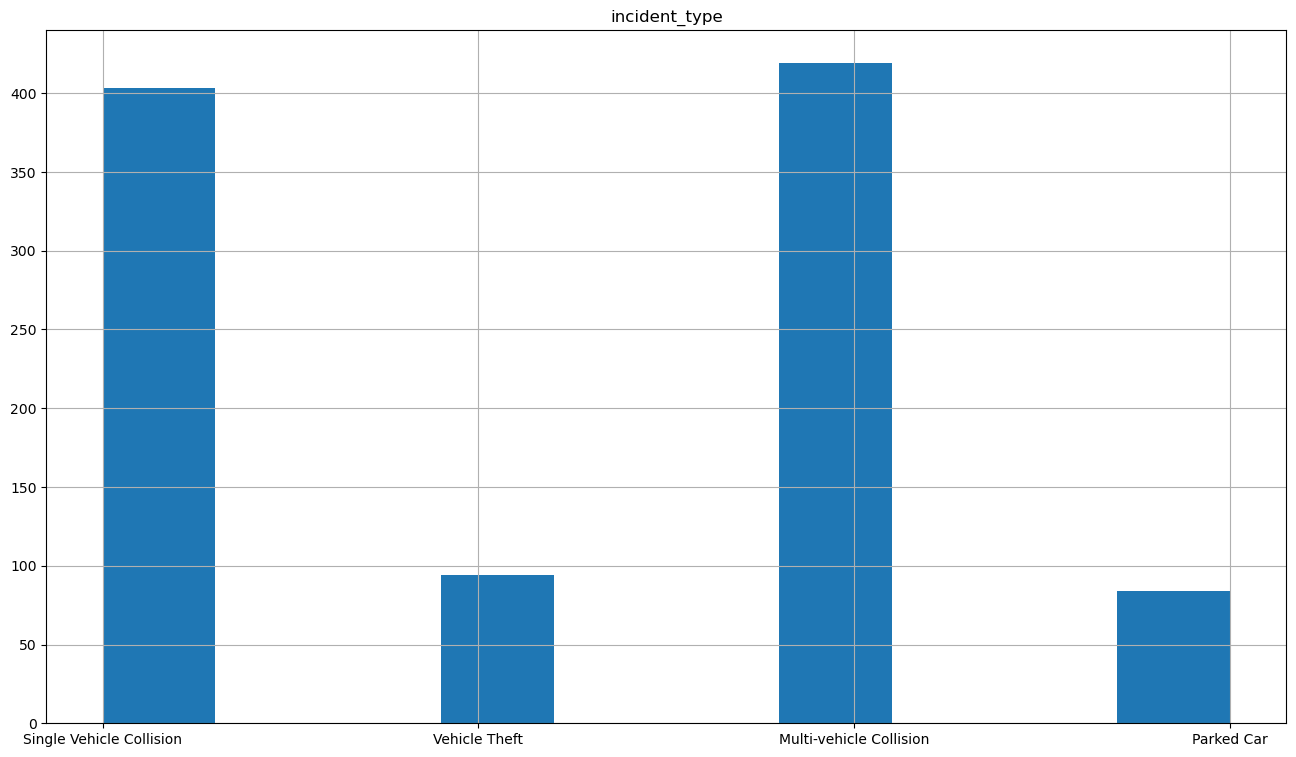

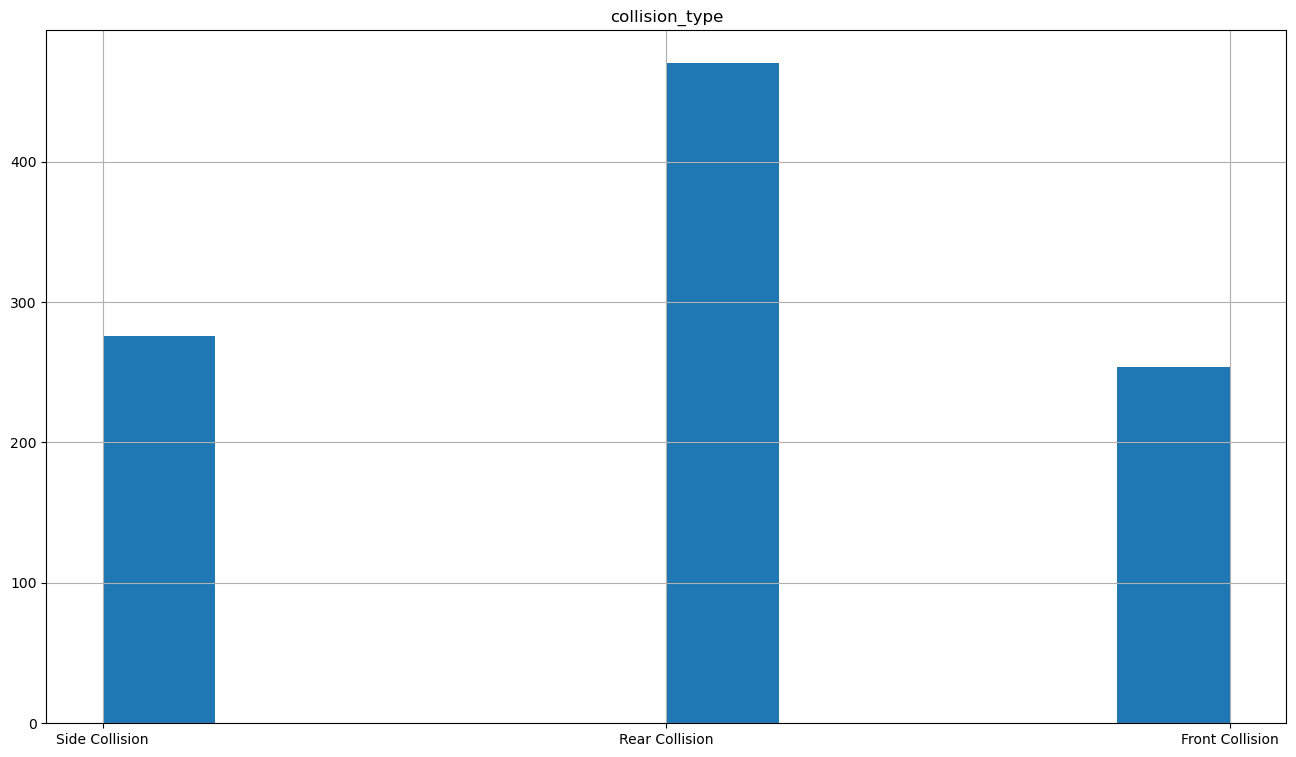

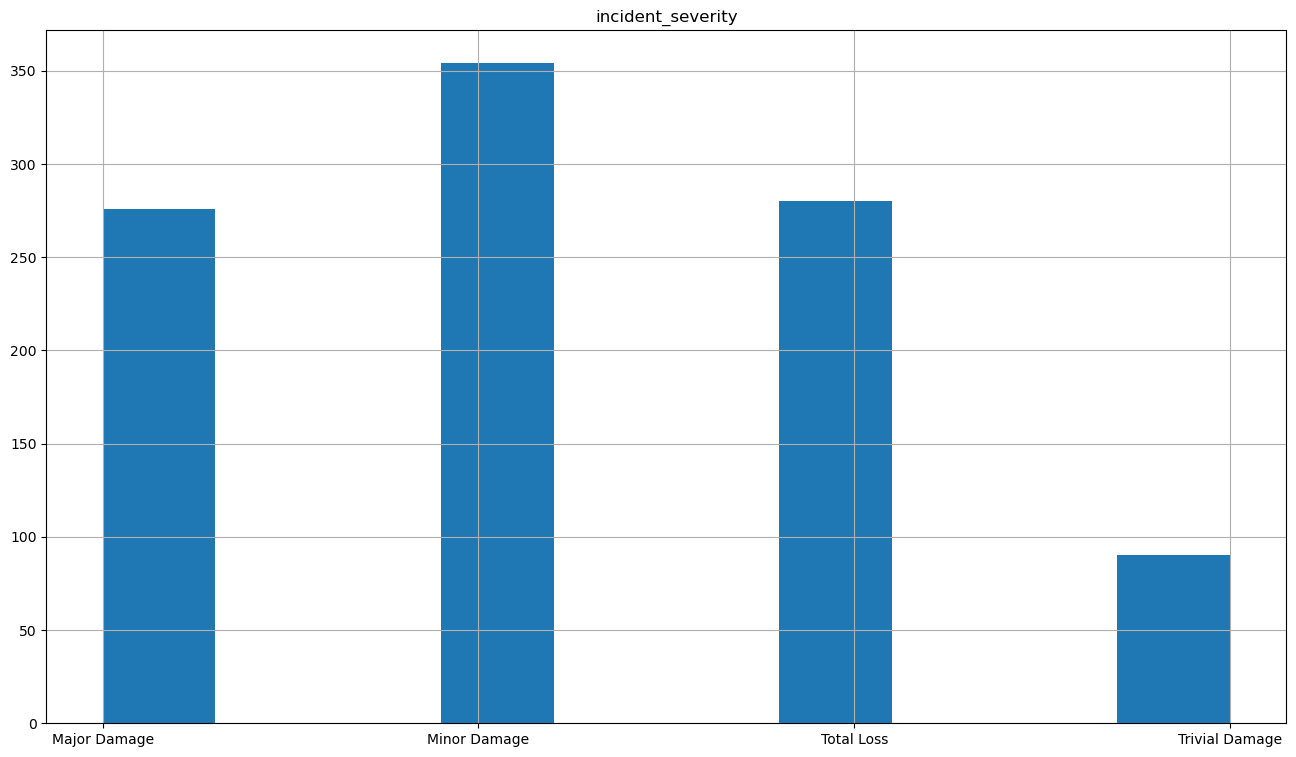

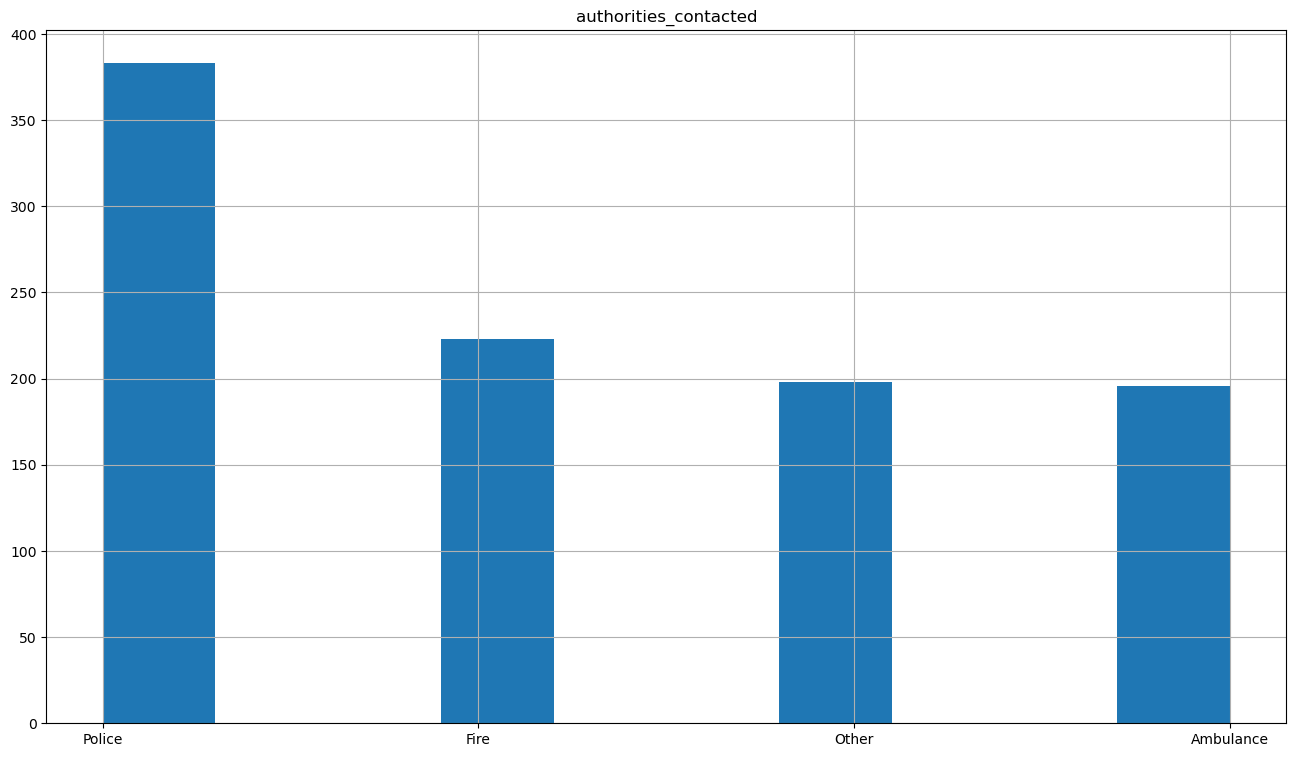

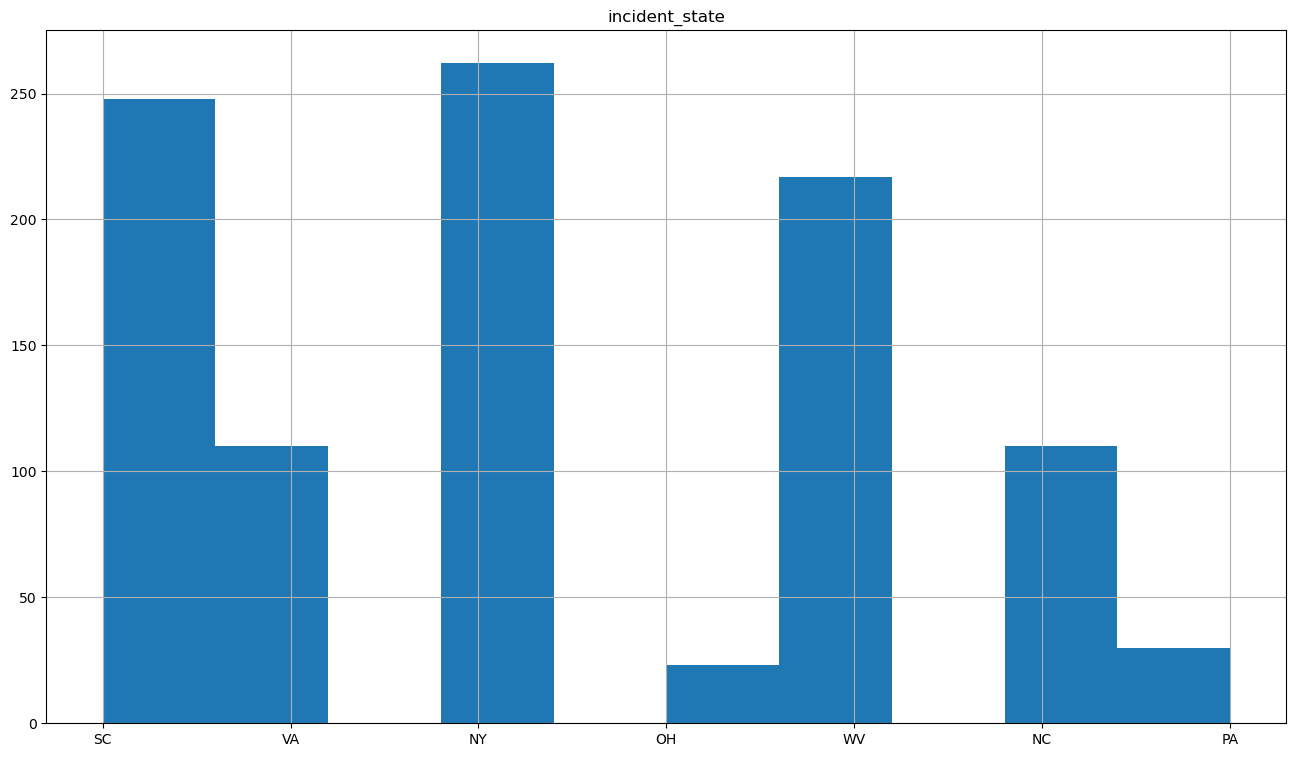

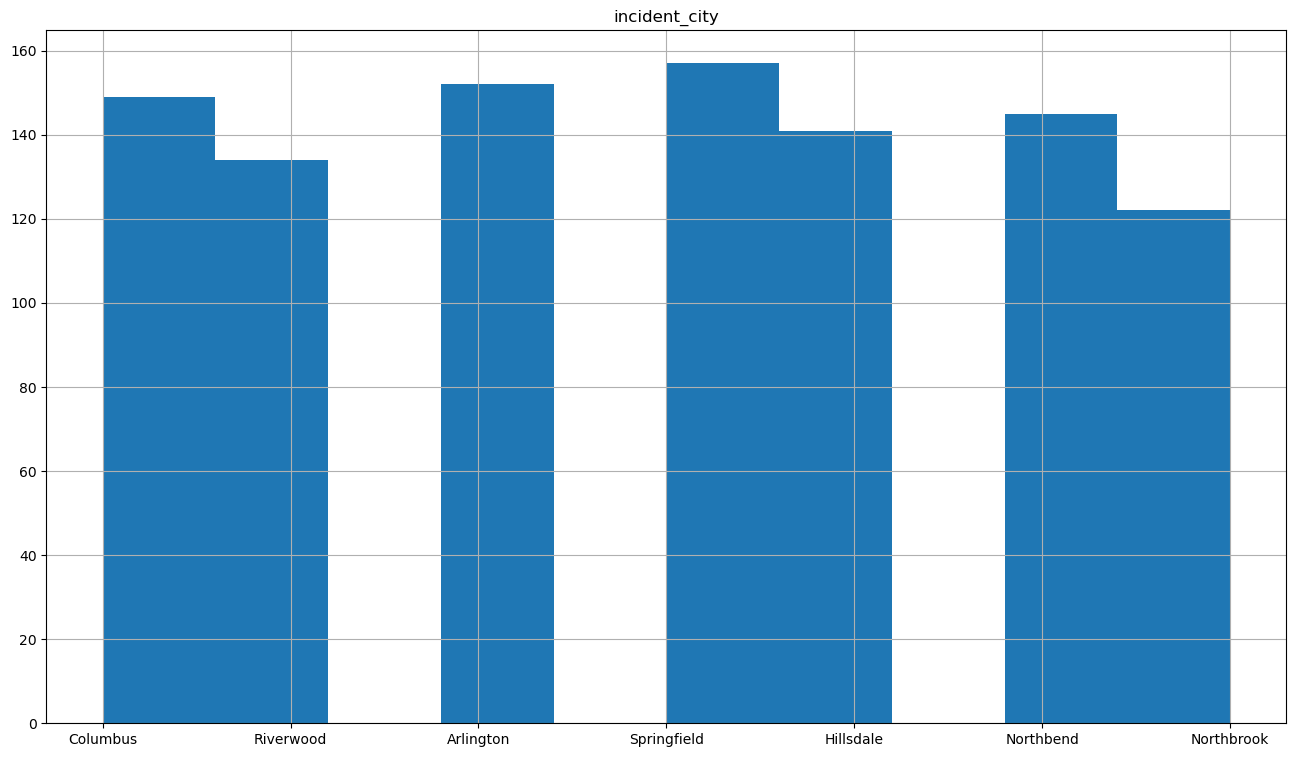

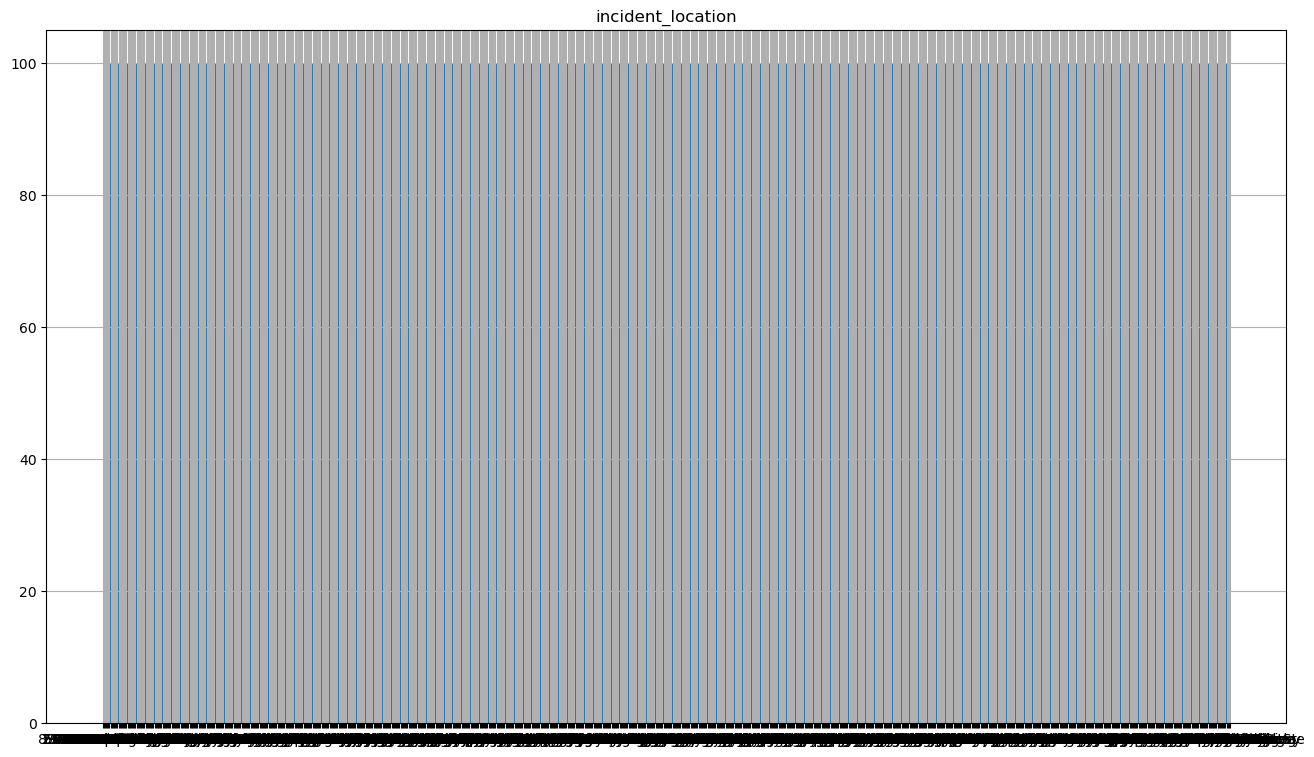

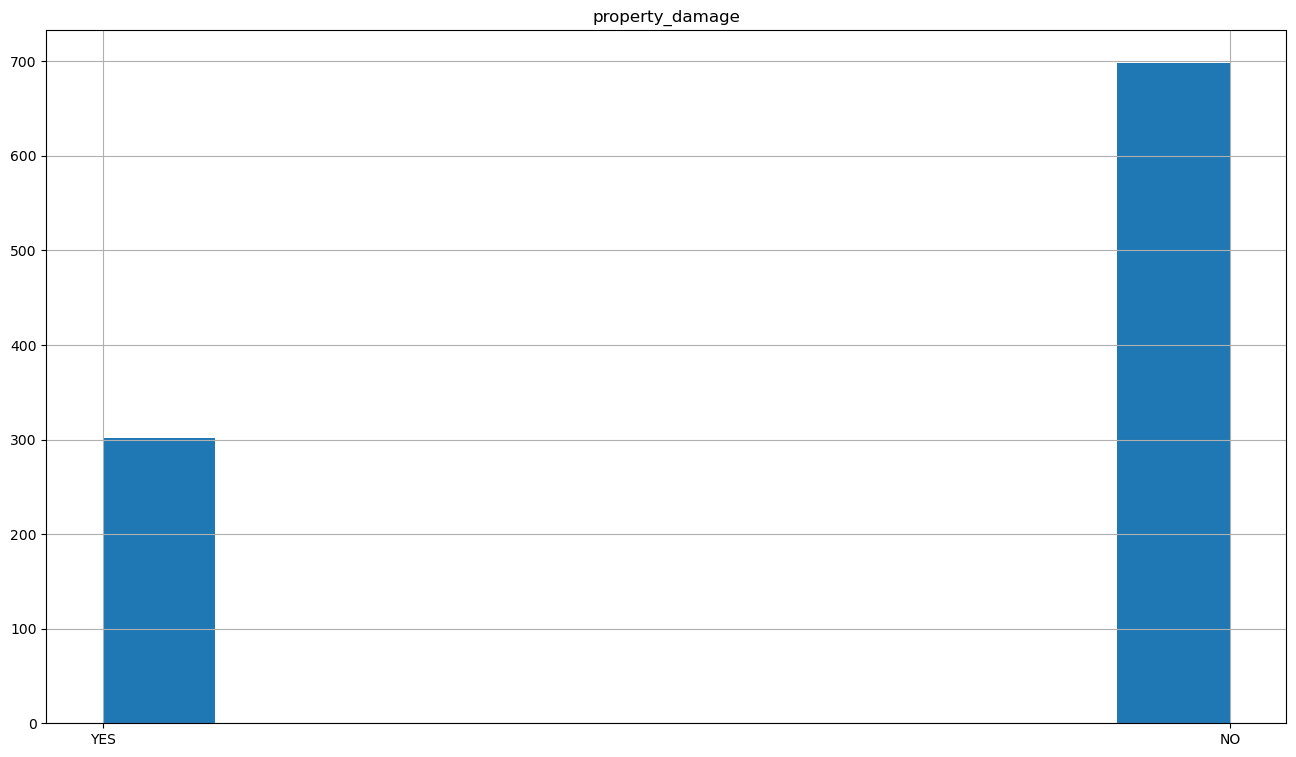

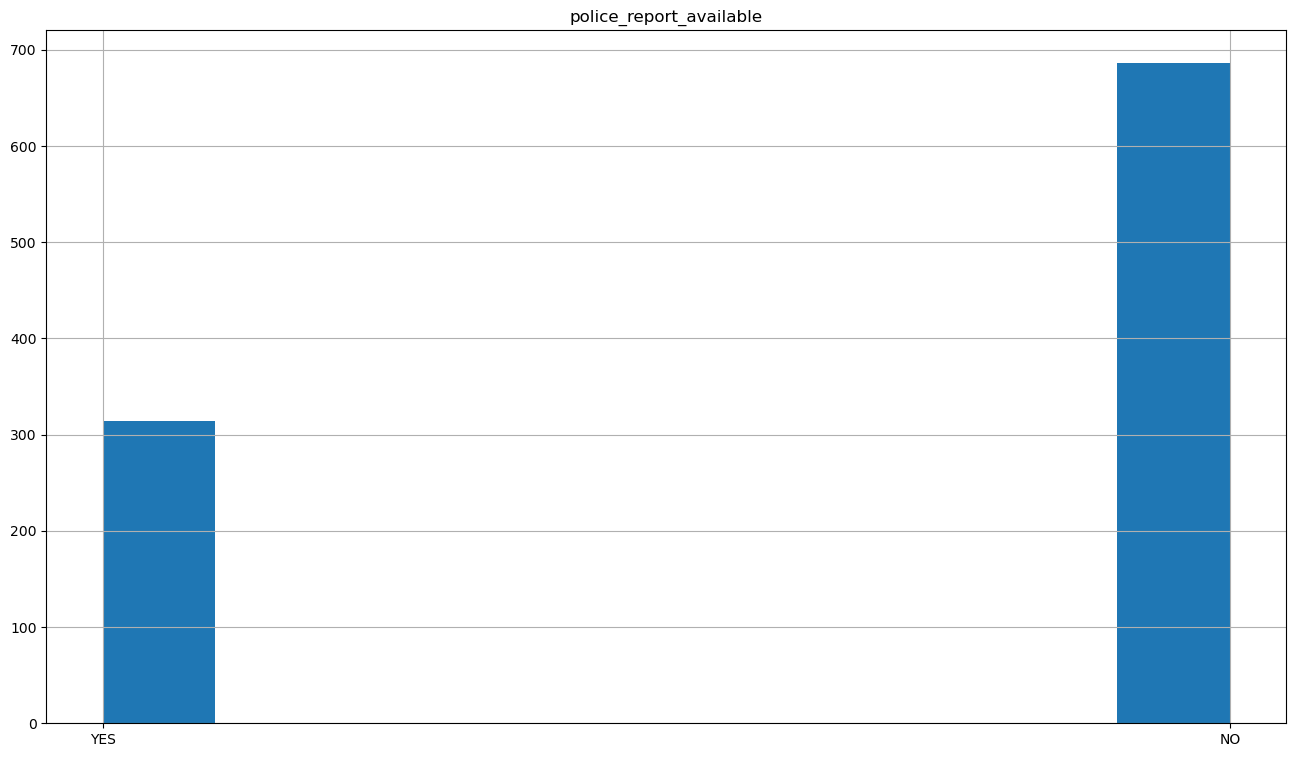

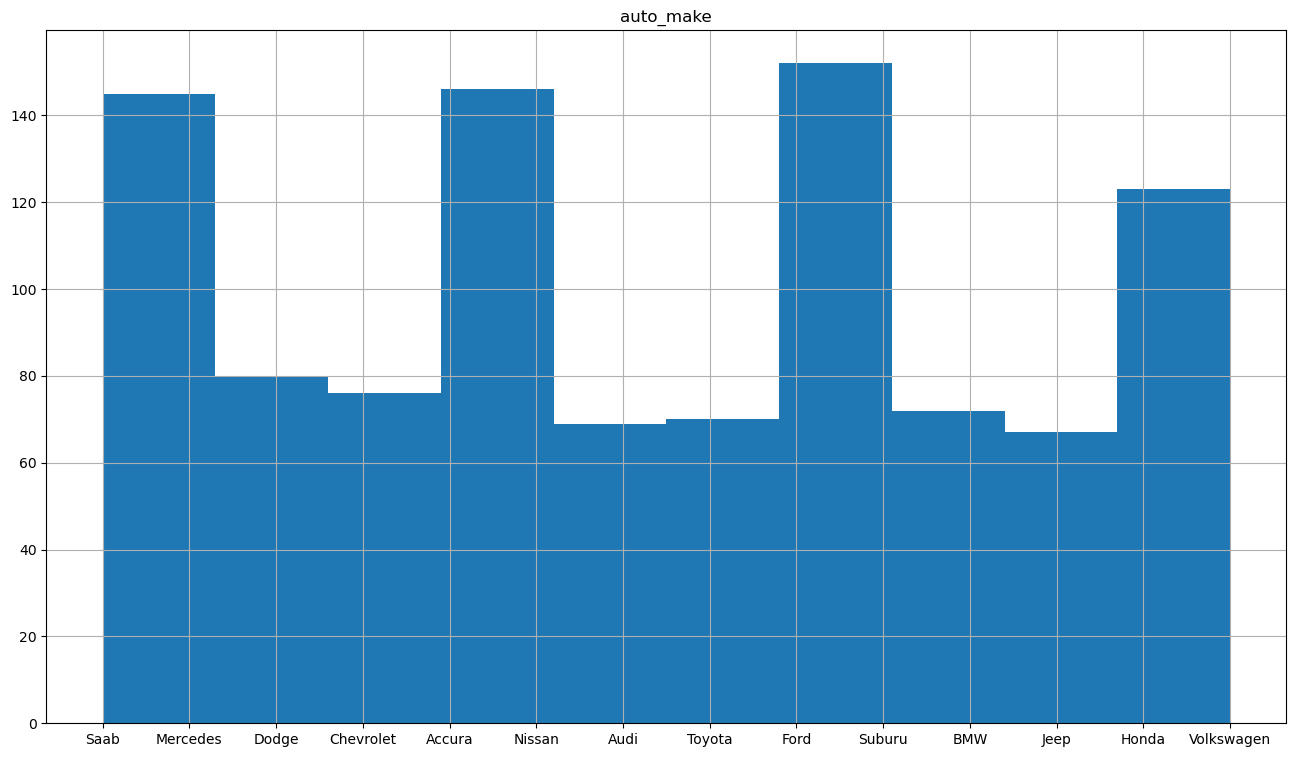

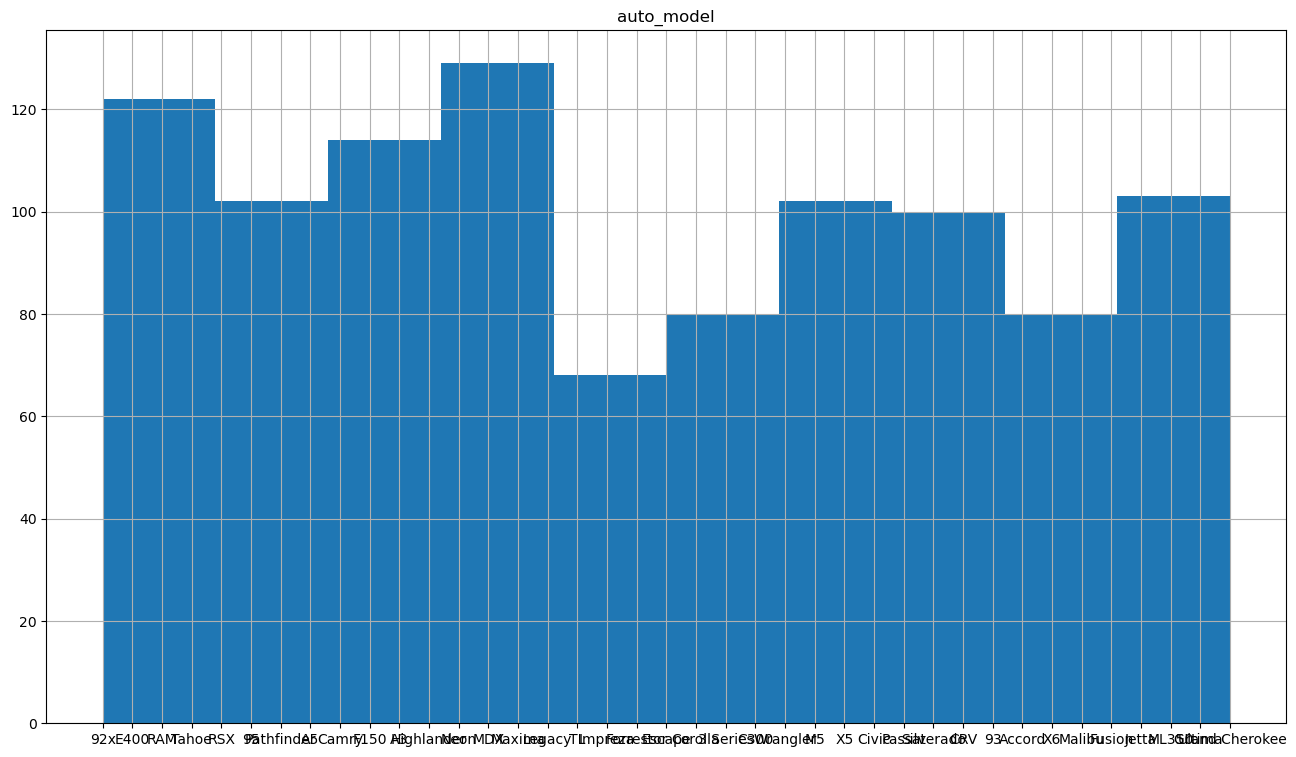

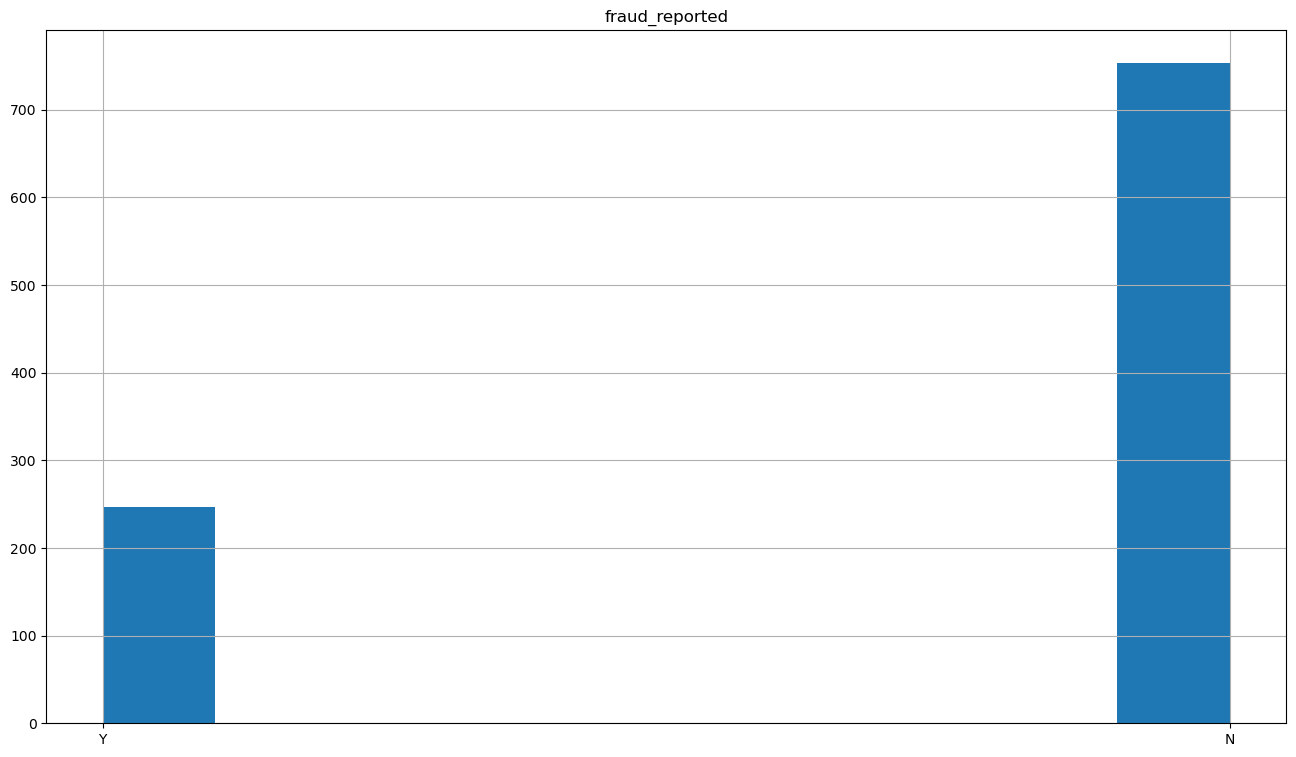

In [23]:
for i in cate_cols:                               
    plt.figure(figsize = (16, 9))
    ClaimFraud_Ds[i].hist(grid = True)
    plt.title(i)
    plt.show()

Dropping columns "policy_bind_date", 'incident_date', 'incident_location' as it does not impact the target variable. The other columns are almost balaced and there is a minimal skewness . 

In [24]:
ClaimFraud_Ds.drop(['policy_bind_date', 'incident_date', 'incident_location'], axis = 1, inplace = True)

In [25]:
ClaimFraud_Ds.head()

months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex  ... witnesses police_report_available total_claim_amount  \
0        MALE  ...         2                     YES              71610   
1        MALE  ...         0                      NO               5070   
2      FEMALE  ...         3                      NO              34650   
3      FEMALE  ...         2                      NO              63400   
4        MALE  ...         1                      NO               6500   

  injury_claim  property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510           13020          52080       Saab        92x      2004   
1          780             780           3510   Mercedes       E400      2007   
2         7700            3850          23100      Dodge        RAM      2007   
3         6340            6340          50720  Chevrolet      Tahoe      2014   
4         1300             650           4550     Accura        RSX      2009   

  fraud_reported  
0              Y  
1              Y  
2              N  
3              Y  
4              N  

[5 rows x 36 columns]

Text(0.5, 1.0, 'Fraud reported  Percentage')

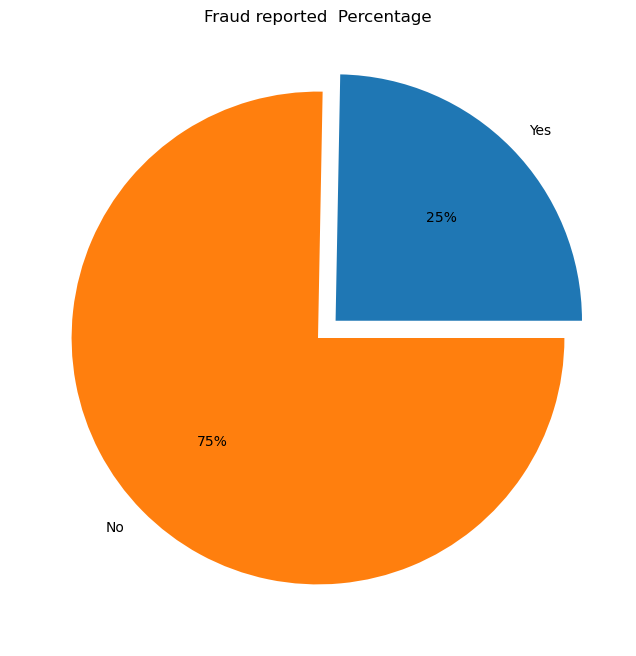

In [26]:
vals = [ClaimFraud_Ds.fraud_reported[ClaimFraud_Ds.fraud_reported == 'Y'].count() , ClaimFraud_Ds.fraud_reported[ClaimFraud_Ds.fraud_reported == 'N'].count()]
plt.figure(figsize = (15, 8))
label = ["Yes" , "No"]
plt.pie(vals , labels=label , autopct = '%1.0f%%' , explode=(0.1 , 0))
plt.title("Fraud reported  Percentage")

Only 25% of the claims are fraud while 75% are not fraud.

In [27]:
cate_cols.remove('policy_bind_date')
cate_cols.remove('incident_date')
cate_cols.remove('incident_location')

Columns 'policy_bind_date', 'incident_date', 'incident_location' dropped because they does not imact the target.

BiVariate Analysis

<Axes: title={'center': 'Fraud reported vs policy_state'}, xlabel='policy_state', ylabel='count'>

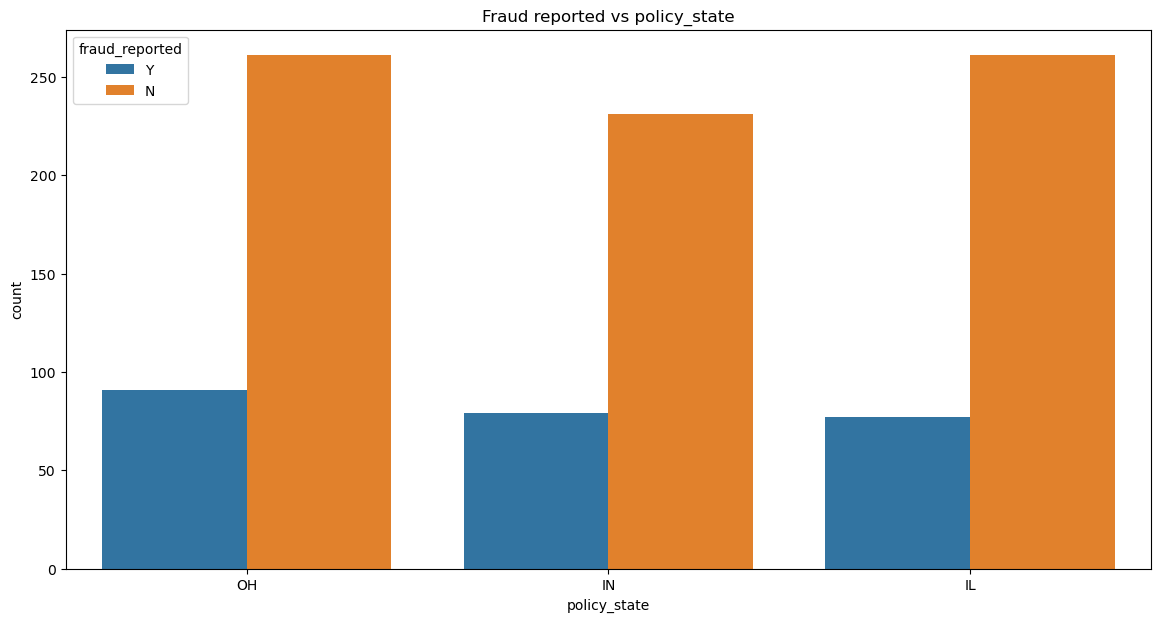

In [28]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs policy_state")
sns.countplot(x="policy_state",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs policy_csl'}, xlabel='policy_csl', ylabel='count'>

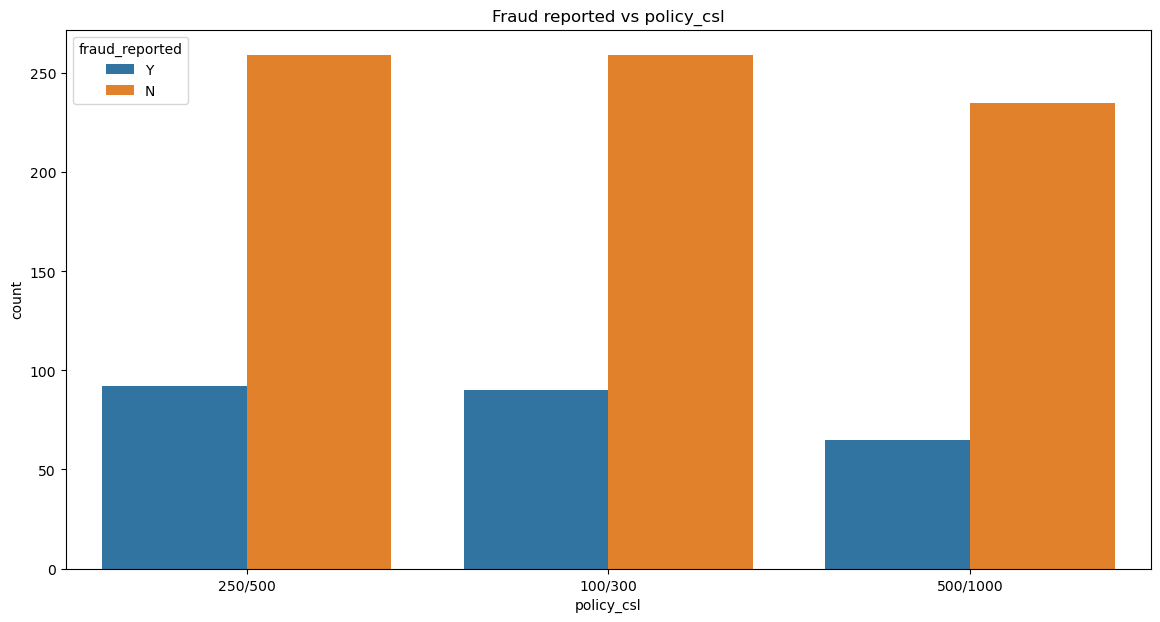

In [29]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs policy_csl")
sns.countplot(x="policy_csl",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs insured_sex'}, xlabel='insured_sex', ylabel='count'>

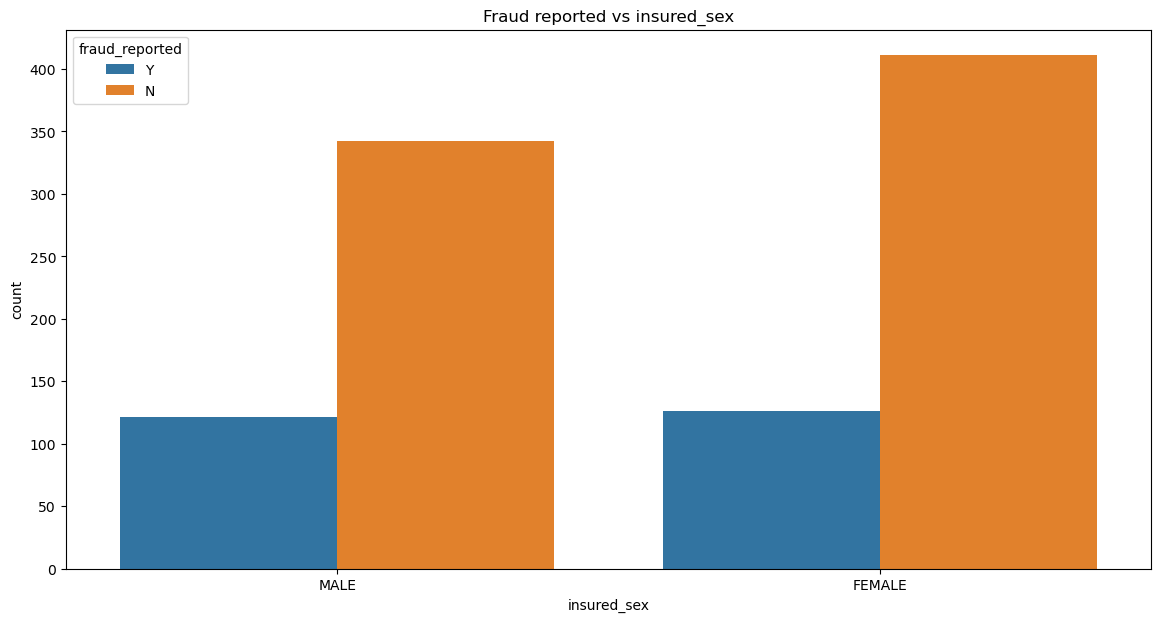

In [30]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs insured_sex")
sns.countplot(x="insured_sex",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs insured_education_level'}, xlabel='insured_education_level', ylabel='count'>

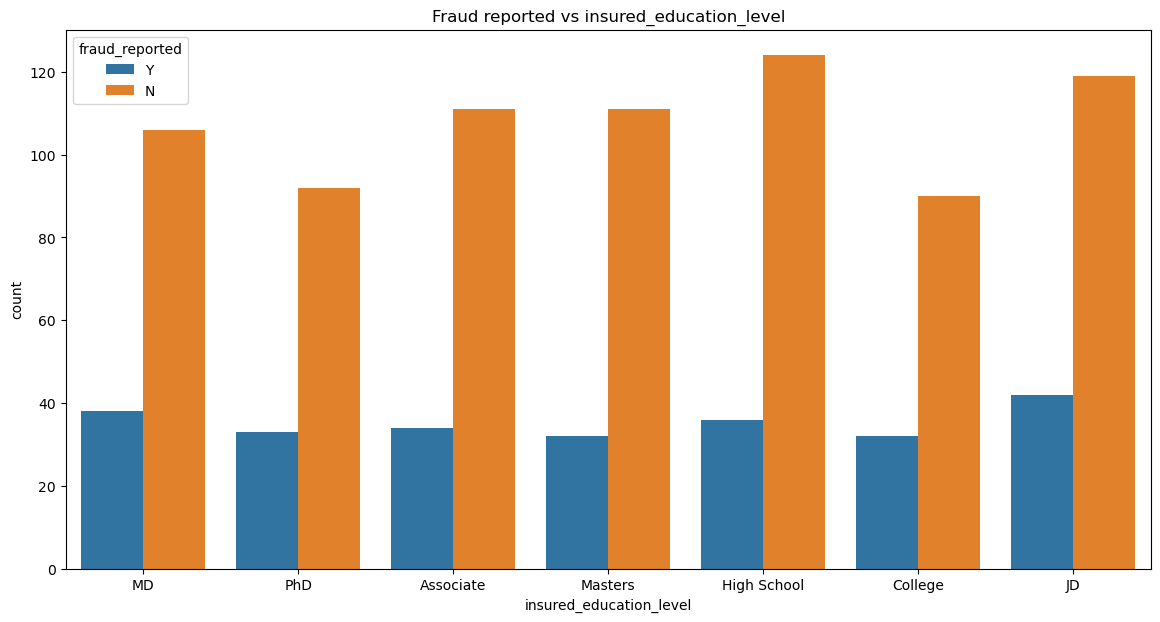

In [31]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs insured_education_level")
sns.countplot(x="insured_education_level",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs insured_occupation'}, xlabel='insured_occupation', ylabel='count'>

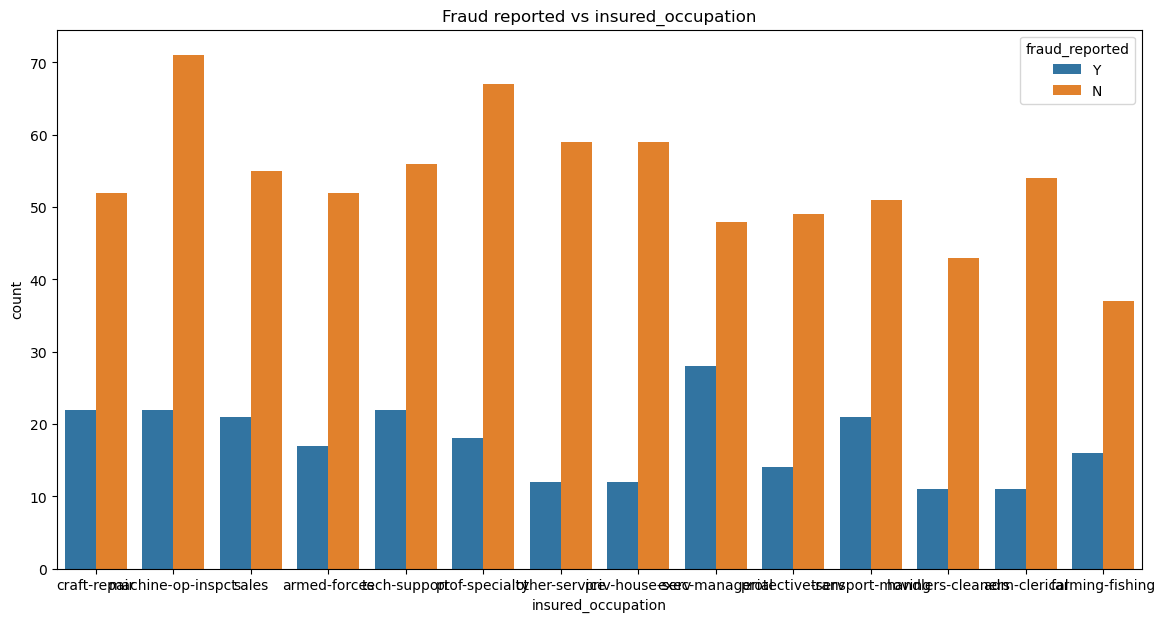

In [32]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs insured_occupation")
sns.countplot(x="insured_occupation",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)


<Axes: title={'center': 'Fraud reported vs insured_hobbies'}, xlabel='insured_hobbies', ylabel='count'>

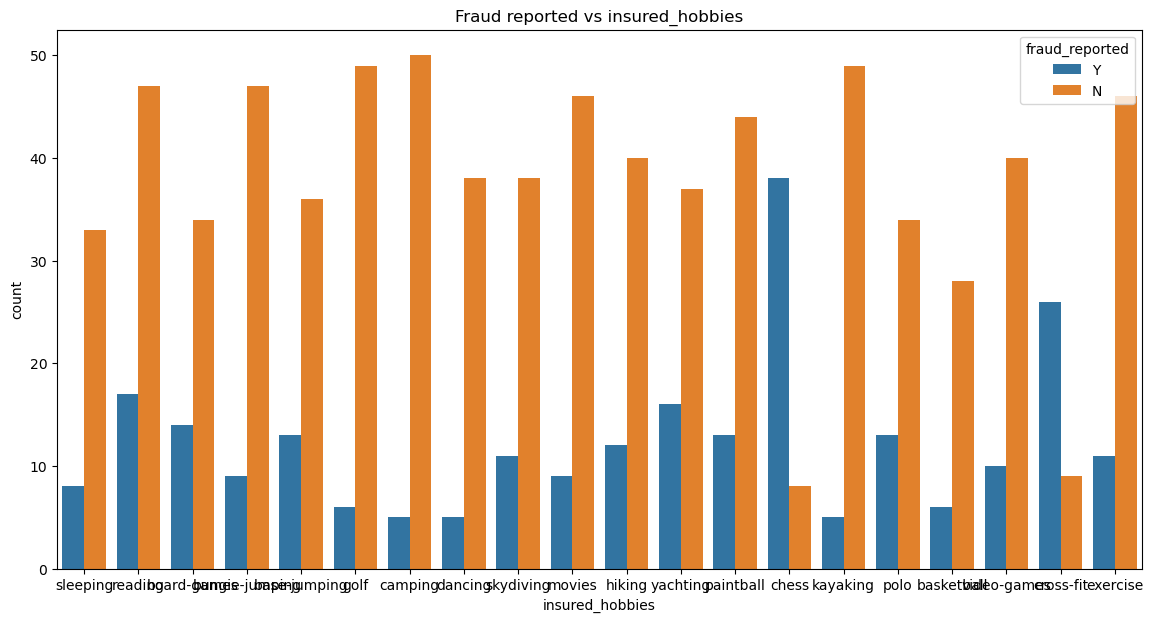

In [33]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs insured_hobbies")
sns.countplot(x="insured_hobbies",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs insured_relationship'}, xlabel='insured_relationship', ylabel='count'>

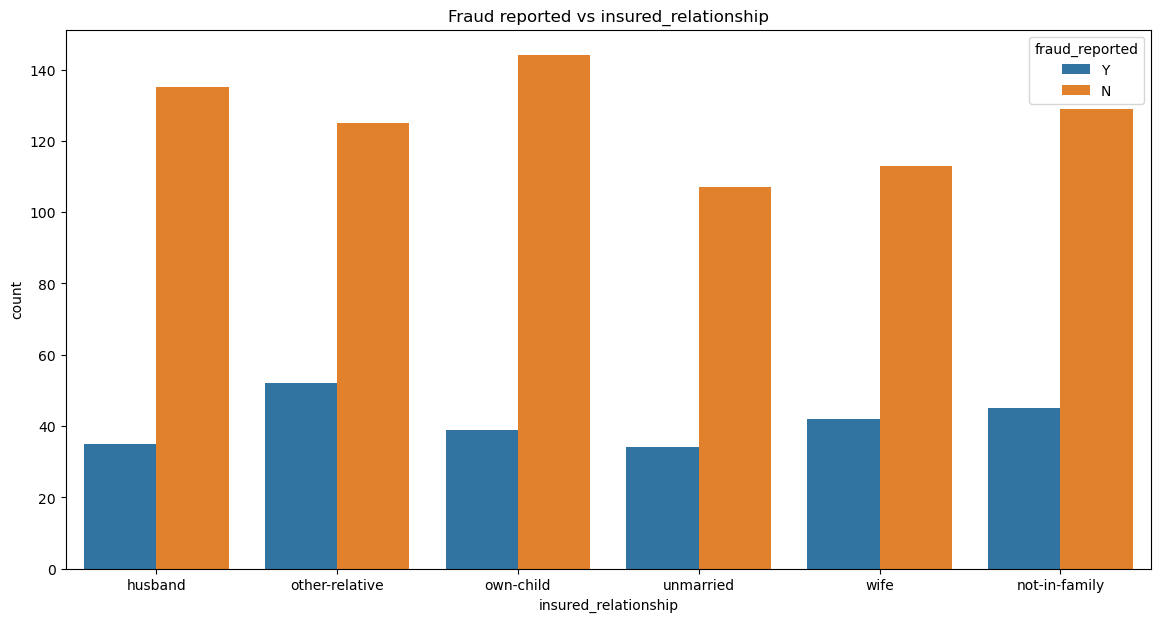

In [34]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs insured_relationship")
sns.countplot(x="insured_relationship",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs incident_type'}, xlabel='incident_type', ylabel='count'>

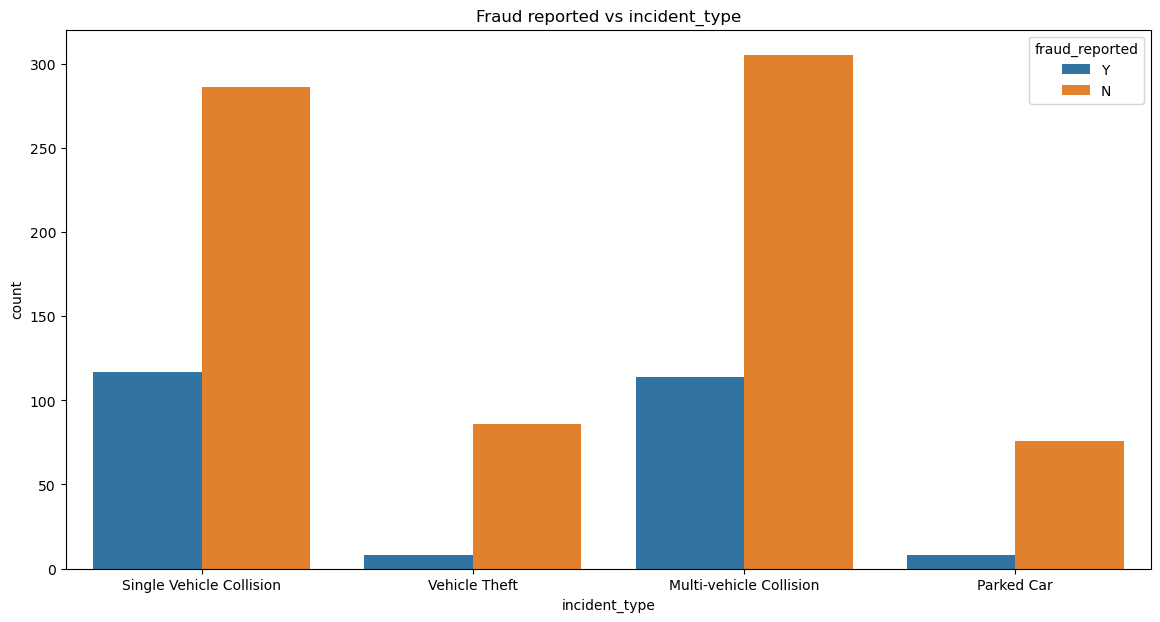

In [35]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs incident_type")
sns.countplot(x="incident_type",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs collision_type'}, xlabel='collision_type', ylabel='count'>

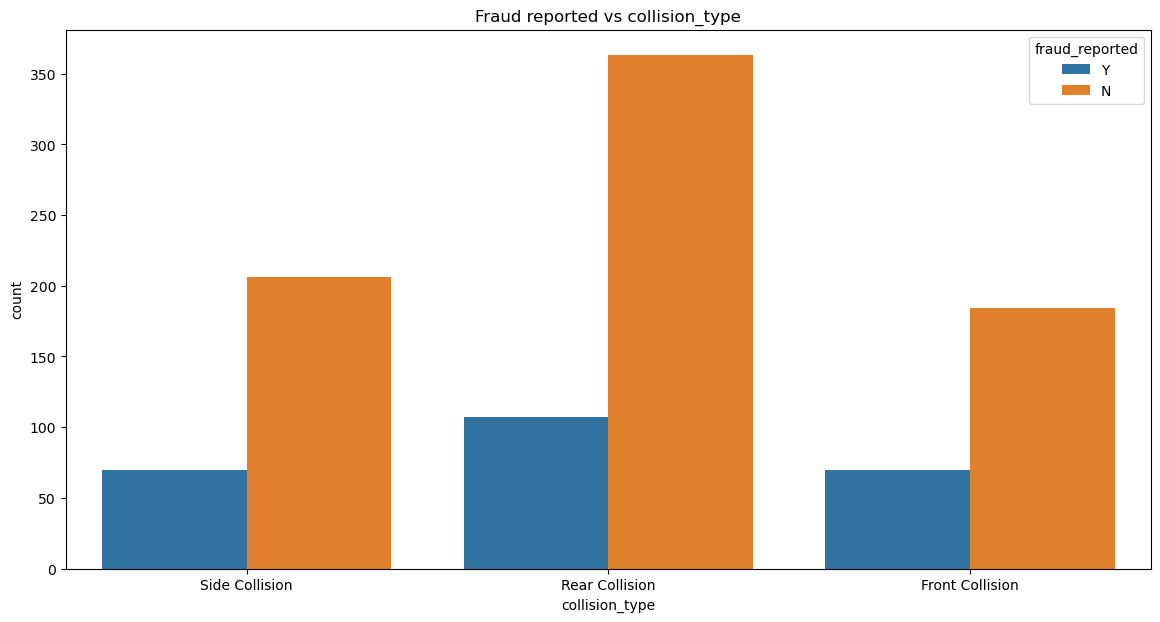

In [36]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs collision_type")
sns.countplot(x="collision_type",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs incident_severity'}, xlabel='incident_severity', ylabel='count'>

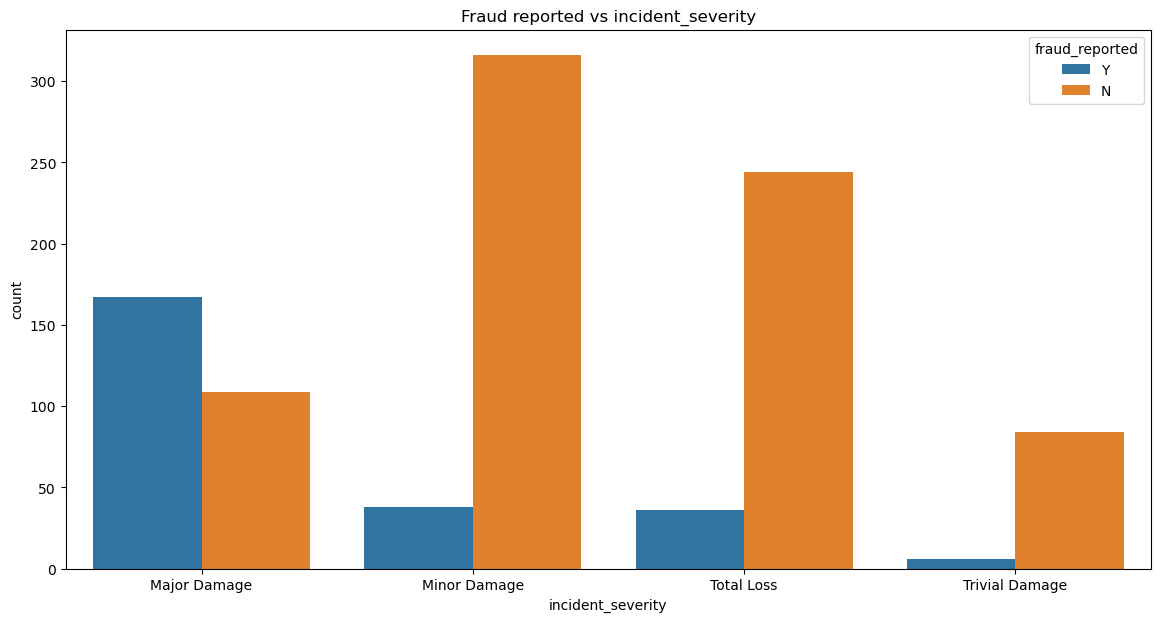

In [37]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs incident_severity")
sns.countplot(x="incident_severity",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs authorities_contacted'}, xlabel='authorities_contacted', ylabel='count'>

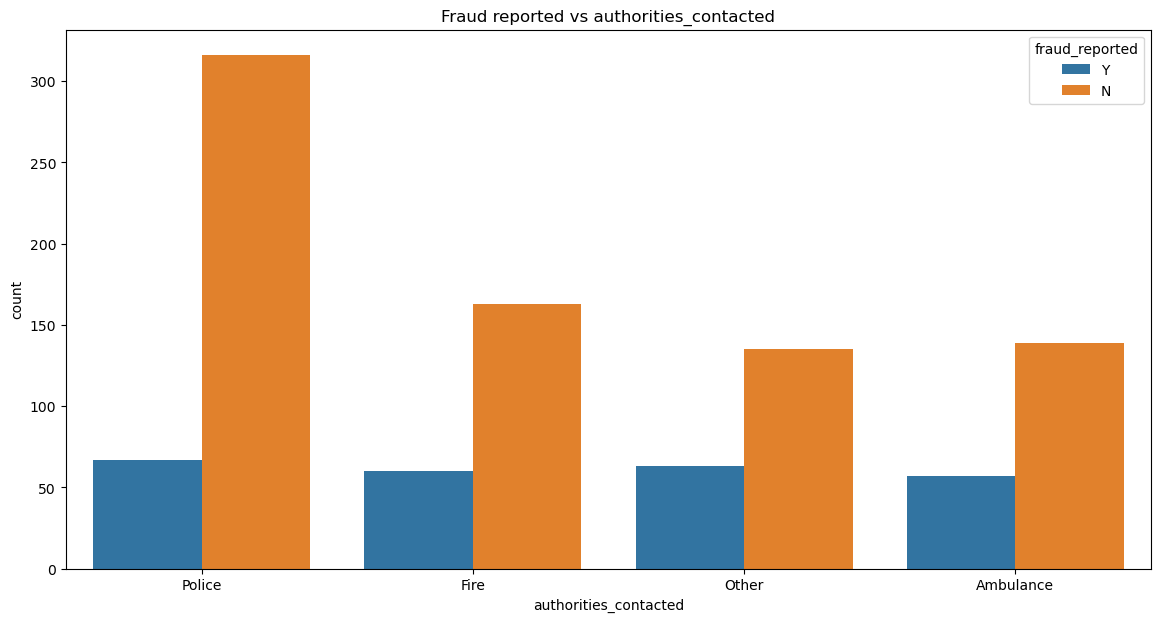

In [38]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs authorities_contacted")
sns.countplot(x="authorities_contacted",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs incident_state'}, xlabel='incident_state', ylabel='count'>

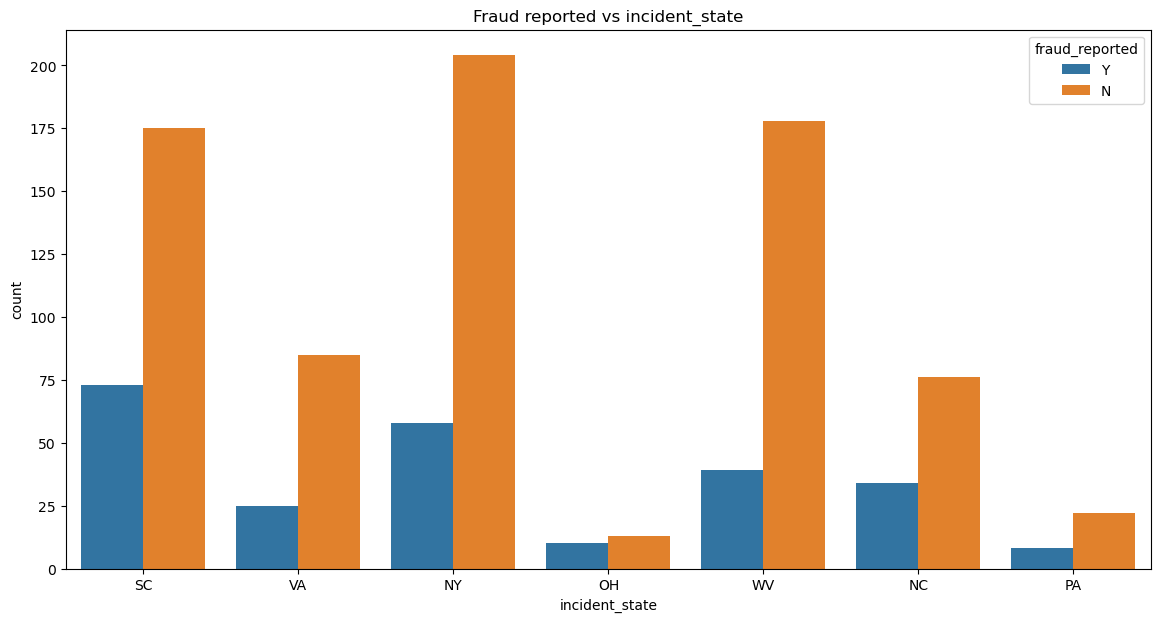

In [39]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs incident_state")
sns.countplot(x="incident_state",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs incident_city'}, xlabel='incident_city', ylabel='count'>

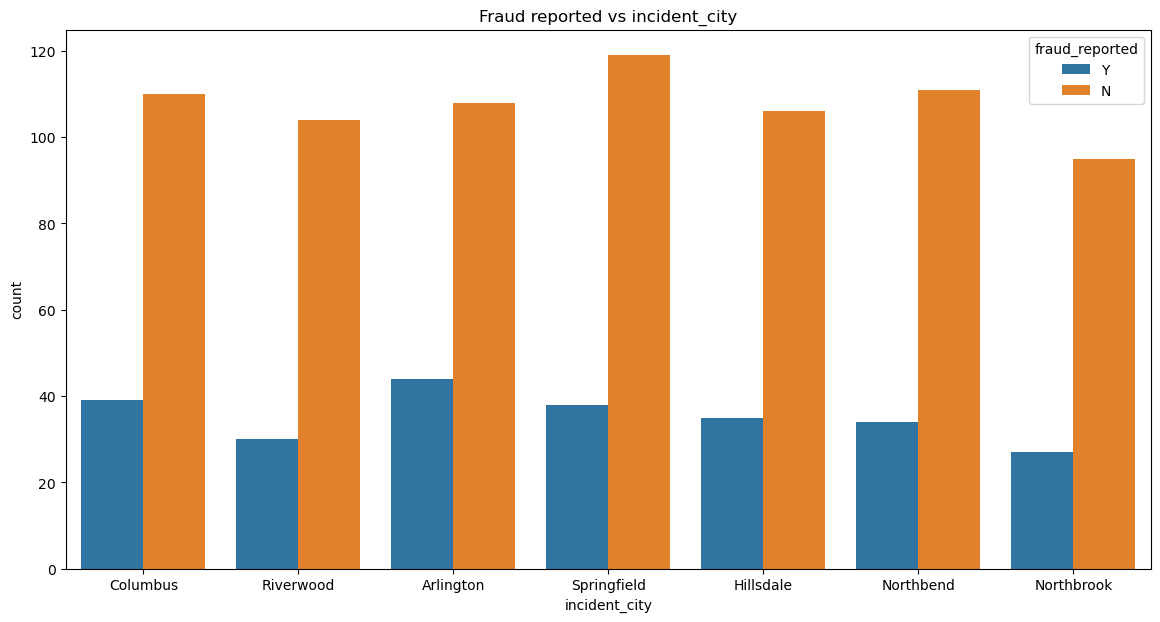

In [40]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs incident_city")
sns.countplot(x="incident_city",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs property_damage'}, xlabel='property_damage', ylabel='count'>

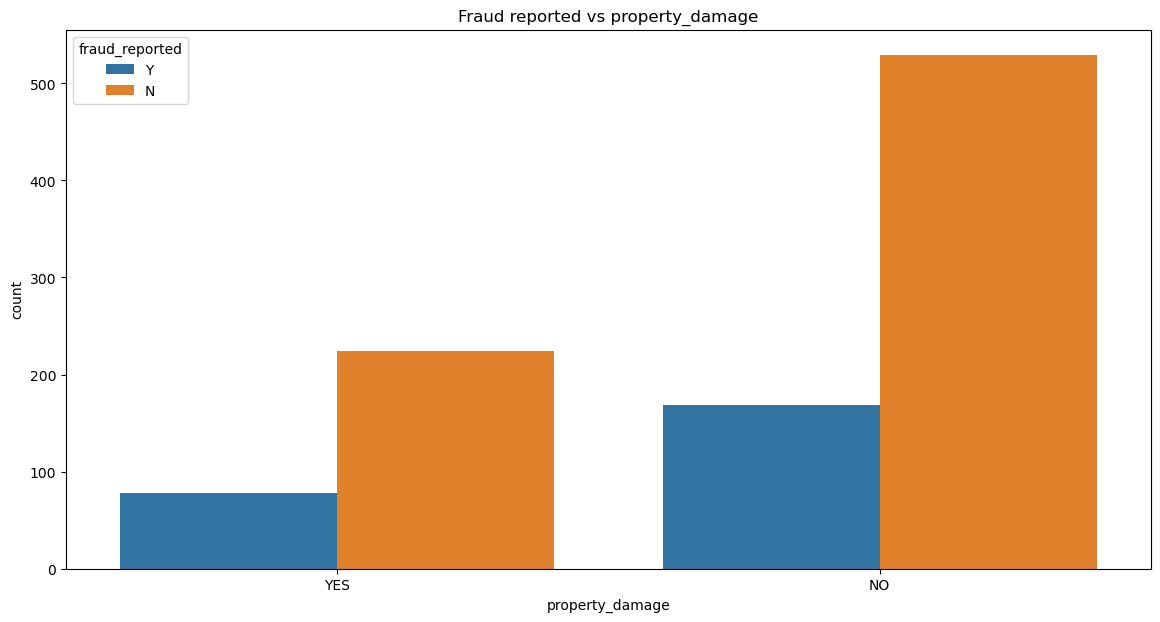

In [41]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs property_damage")
sns.countplot(x="property_damage",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs auto_make'}, xlabel='auto_make', ylabel='count'>

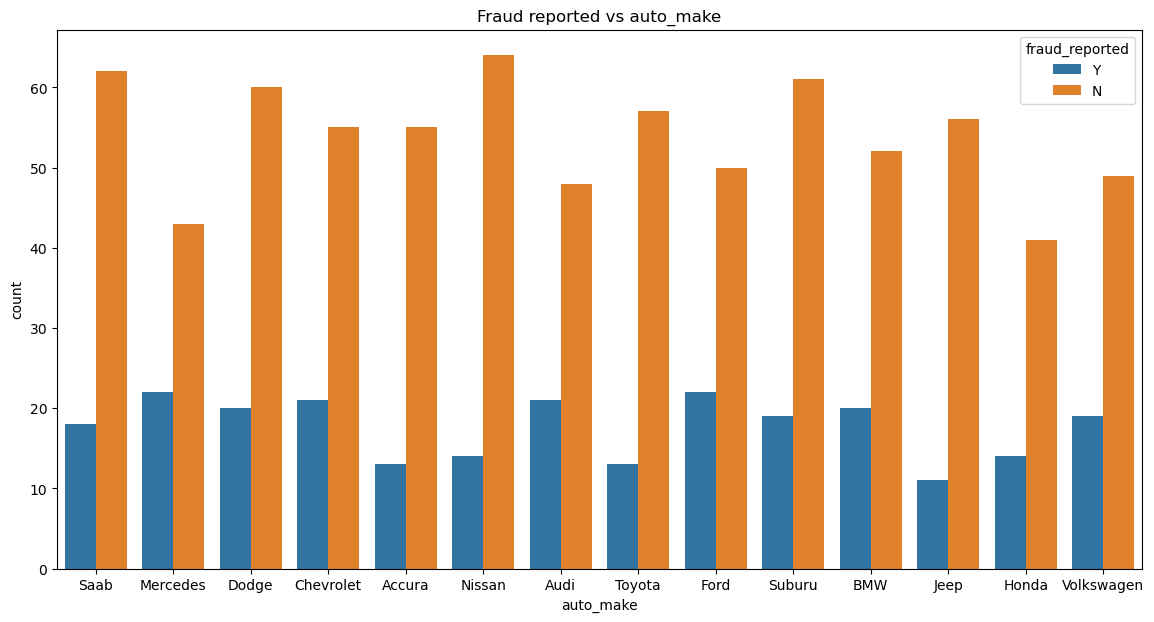

In [42]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs auto_make")
sns.countplot(x="auto_make",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs auto_model'}, xlabel='auto_model', ylabel='count'>

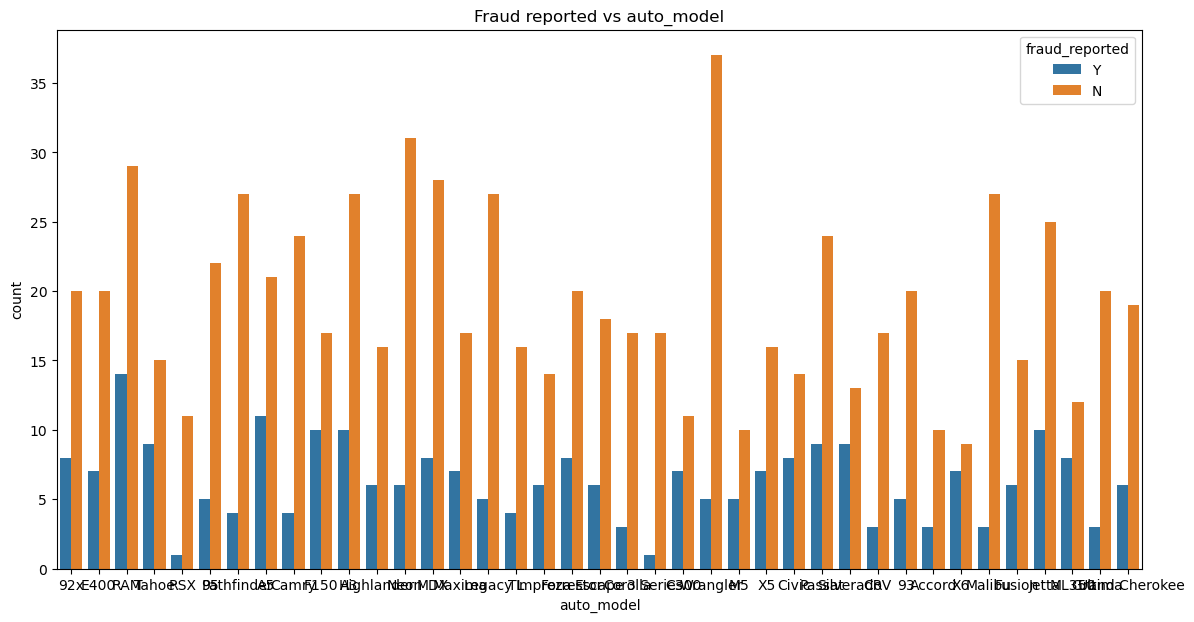

In [43]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs auto_model")
sns.countplot(x="auto_model",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

<Axes: title={'center': 'Fraud reported vs police_report_available'}, xlabel='police_report_available', ylabel='count'>

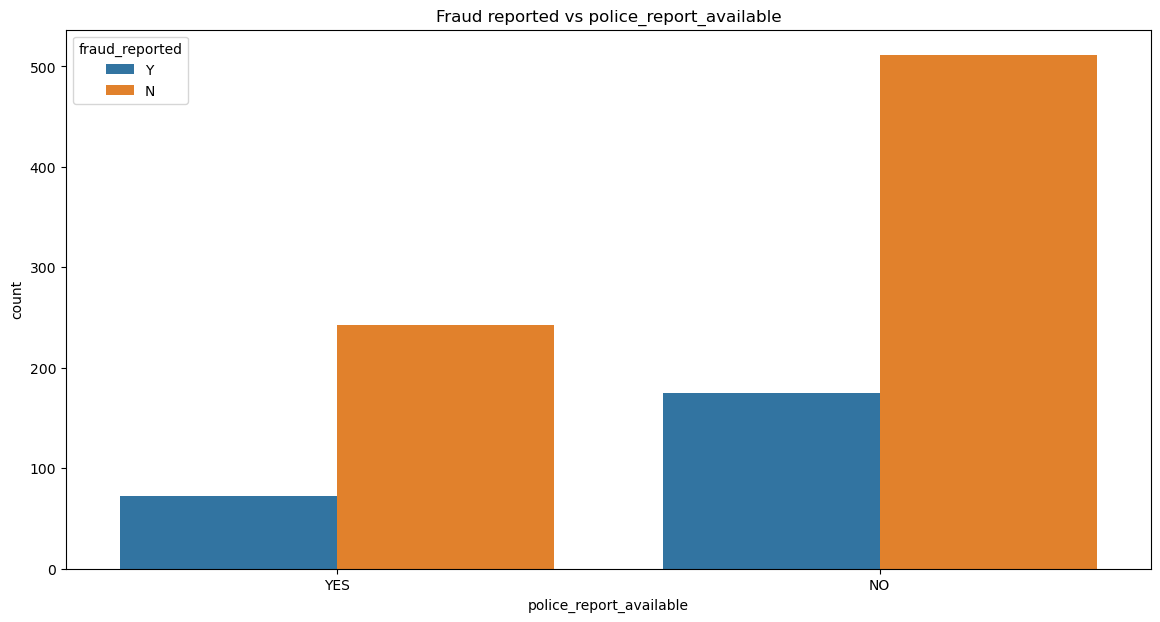

In [44]:
plt.figure(figsize=(14, 7))
plt.title("Fraud reported vs police_report_available")
sns.countplot(x="police_report_available",hue=ClaimFraud_Ds['fraud_reported'],data=ClaimFraud_Ds)

In [45]:

ClaimFraud_Ds['fraud_reported'].replace('N', 0, inplace = True)
ClaimFraud_Ds['fraud_reported'].replace('Y', 1, inplace = True)

In [46]:
ClaimFraud_Ds.head()

months_as_customer  age  policy_number policy_state policy_csl  \
0                 328   48         521585           OH    250/500   
1                 228   42         342868           IN    250/500   
2                 134   29         687698           OH    100/300   
3                 256   41         227811           IL    250/500   
4                 228   44         367455           IL   500/1000   

   policy_deductable  policy_annual_premium  umbrella_limit  insured_zip  \
0               1000                1406.91               0       466132   
1               2000                1197.22         5000000       468176   
2               2000                1413.14         5000000       430632   
3               2000                1415.74         6000000       608117   
4               1000                1583.91         6000000       610706   

  insured_sex  ... witnesses police_report_available total_claim_amount  \
0        MALE  ...         2                     YES              71610   
1        MALE  ...         0                      NO               5070   
2      FEMALE  ...         3                      NO              34650   
3      FEMALE  ...         2                      NO              63400   
4        MALE  ...         1                      NO               6500   

  injury_claim  property_claim  vehicle_claim  auto_make auto_model auto_year  \
0         6510           13020          52080       Saab        92x      2004   
1          780             780           3510   Mercedes       E400      2007   
2         7700            3850          23100      Dodge        RAM      2007   
3         6340            6340          50720  Chevrolet      Tahoe      2014   
4         1300             650           4550     Accura        RSX      2009   

  fraud_reported  
0              1  
1              1  
2              0  
3              1  
4              0  

[5 rows x 36 columns]

Converting categorical column into Numerical data

In [47]:

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for col in cate_cols:
    ClaimFraud_Ds[col] = label_encoder.fit_transform(ClaimFraud_Ds[col])

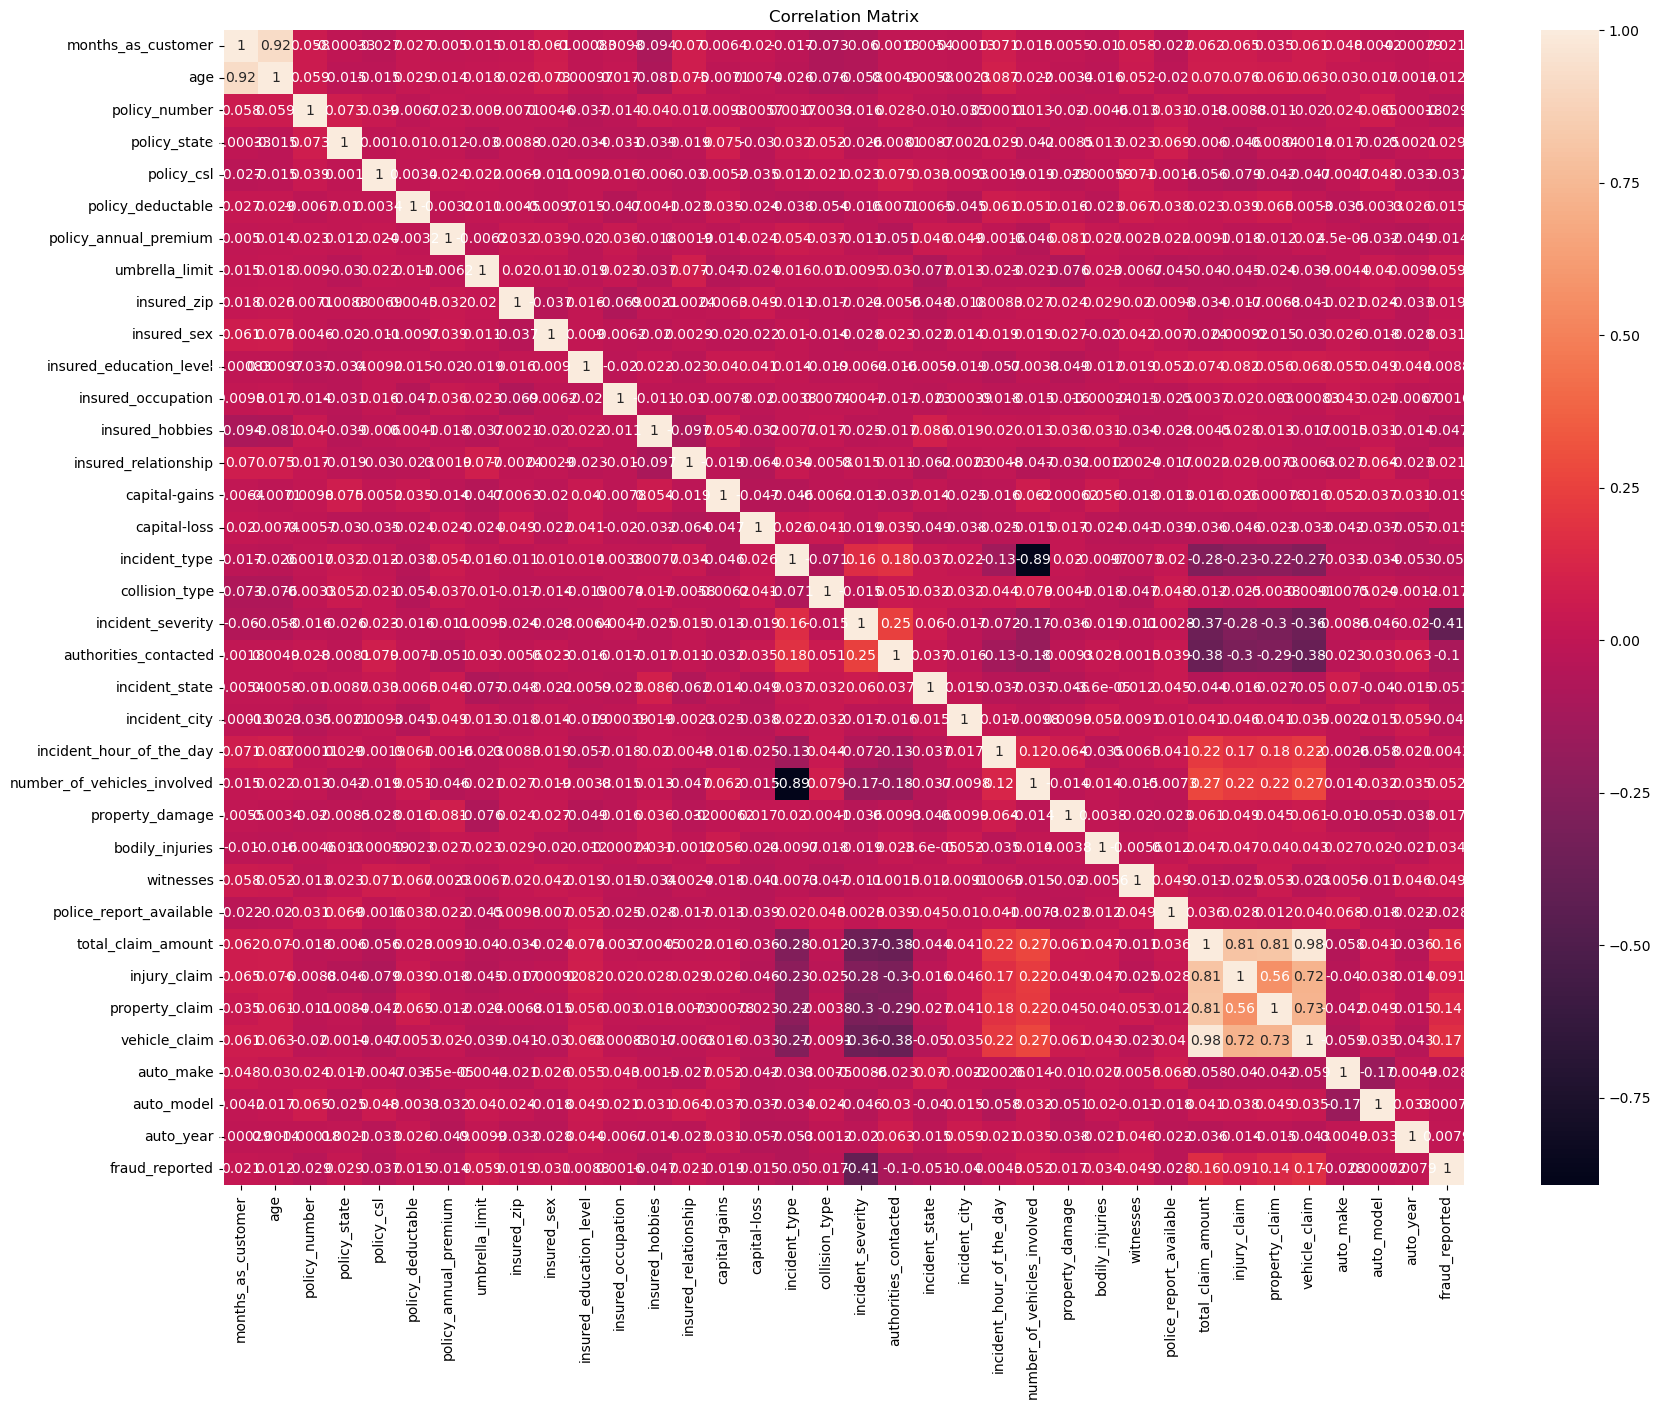

In [48]:
plt.figure(figsize = [20, 15])                             #multivariate analysis
sns.heatmap(ClaimFraud_Ds.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

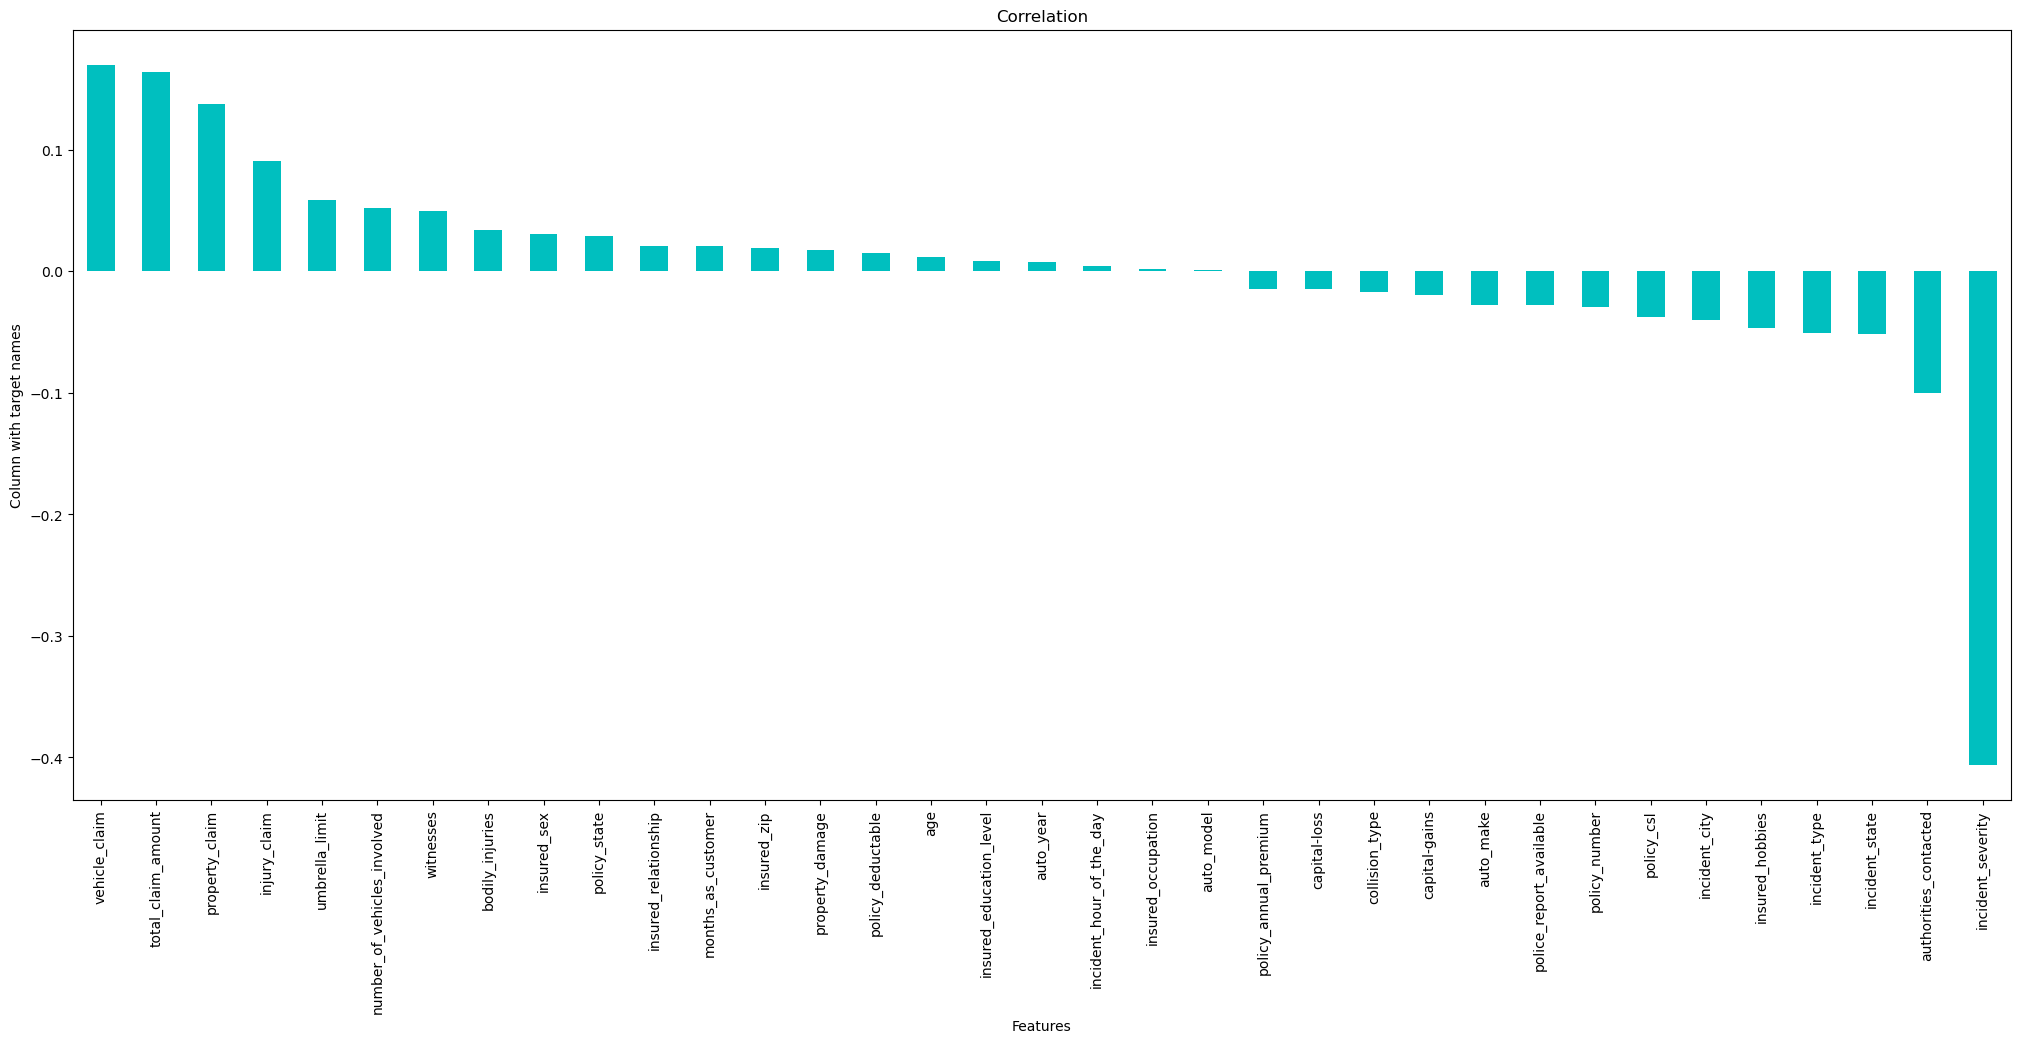

In [49]:
plt.figure(figsize = (25, 10))
ClaimFraud_Ds.corr()['fraud_reported'].sort_values(ascending = False).drop(['fraud_reported']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features')
plt.ylabel('Column with target names')
plt.title('Correlation')
plt.show()

Detecting Outliers and Skewness

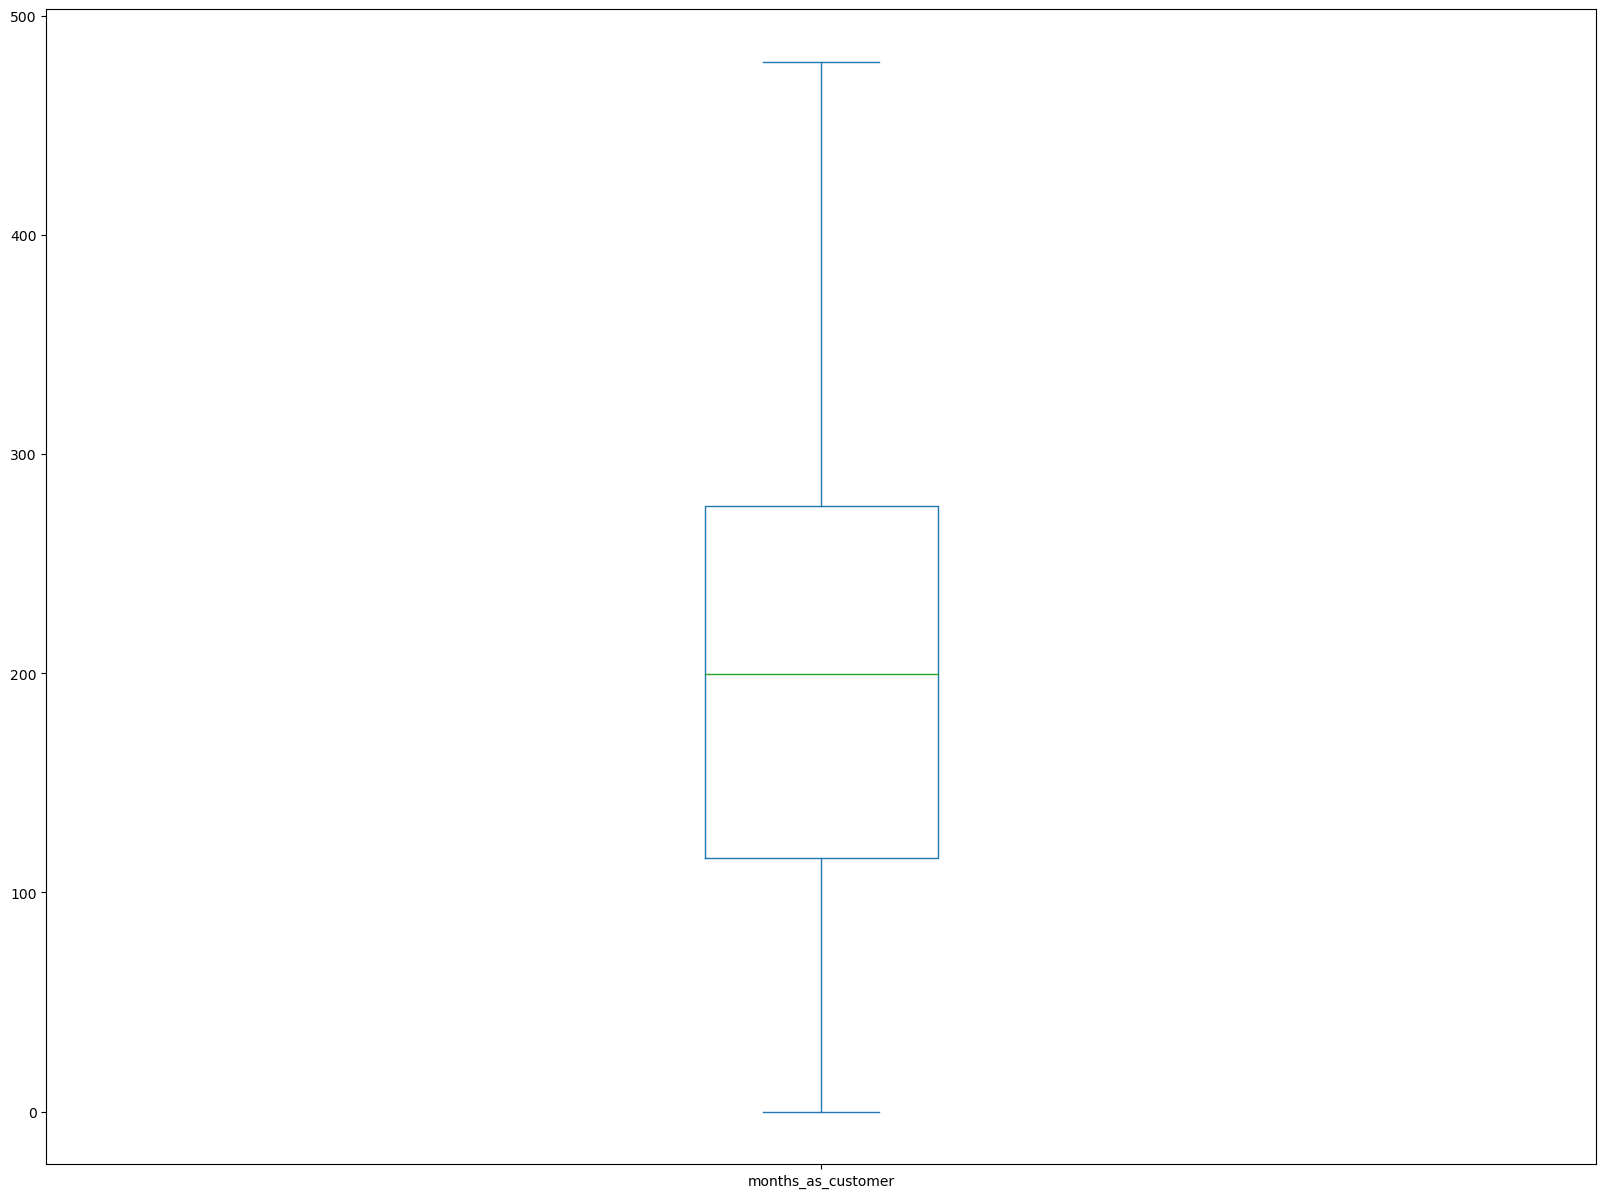

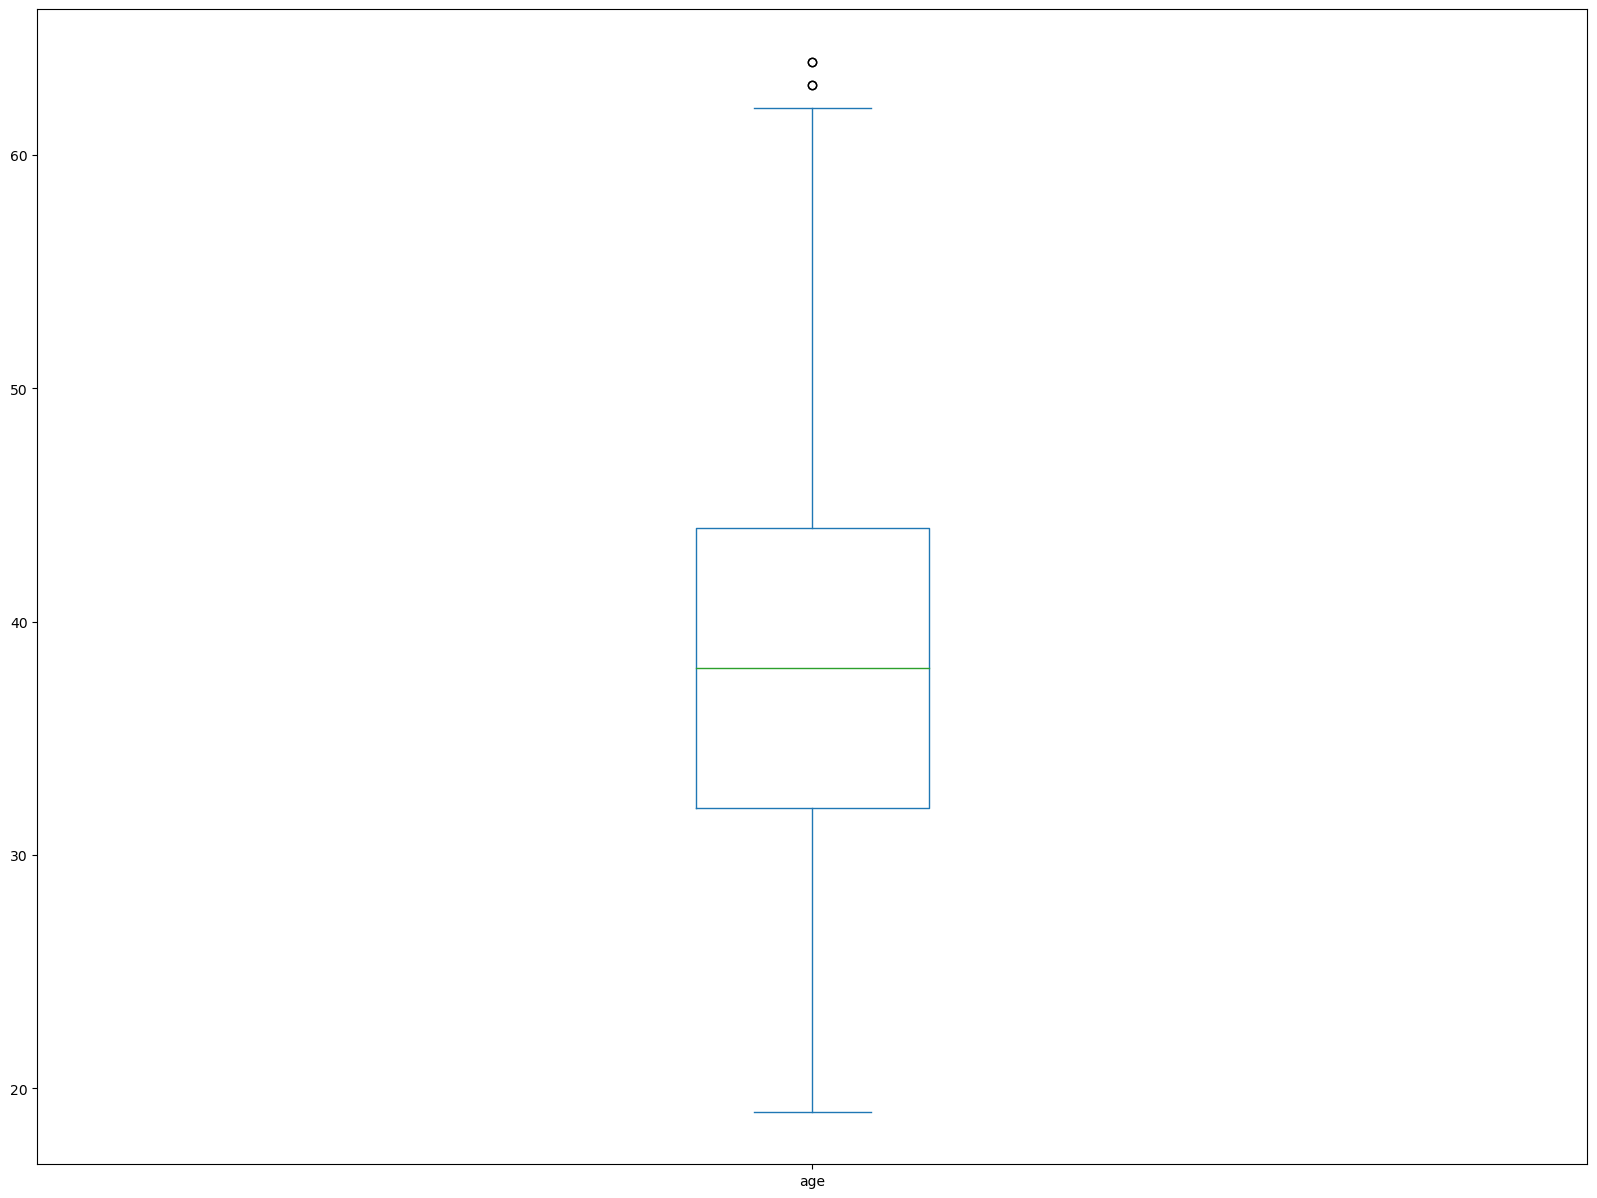

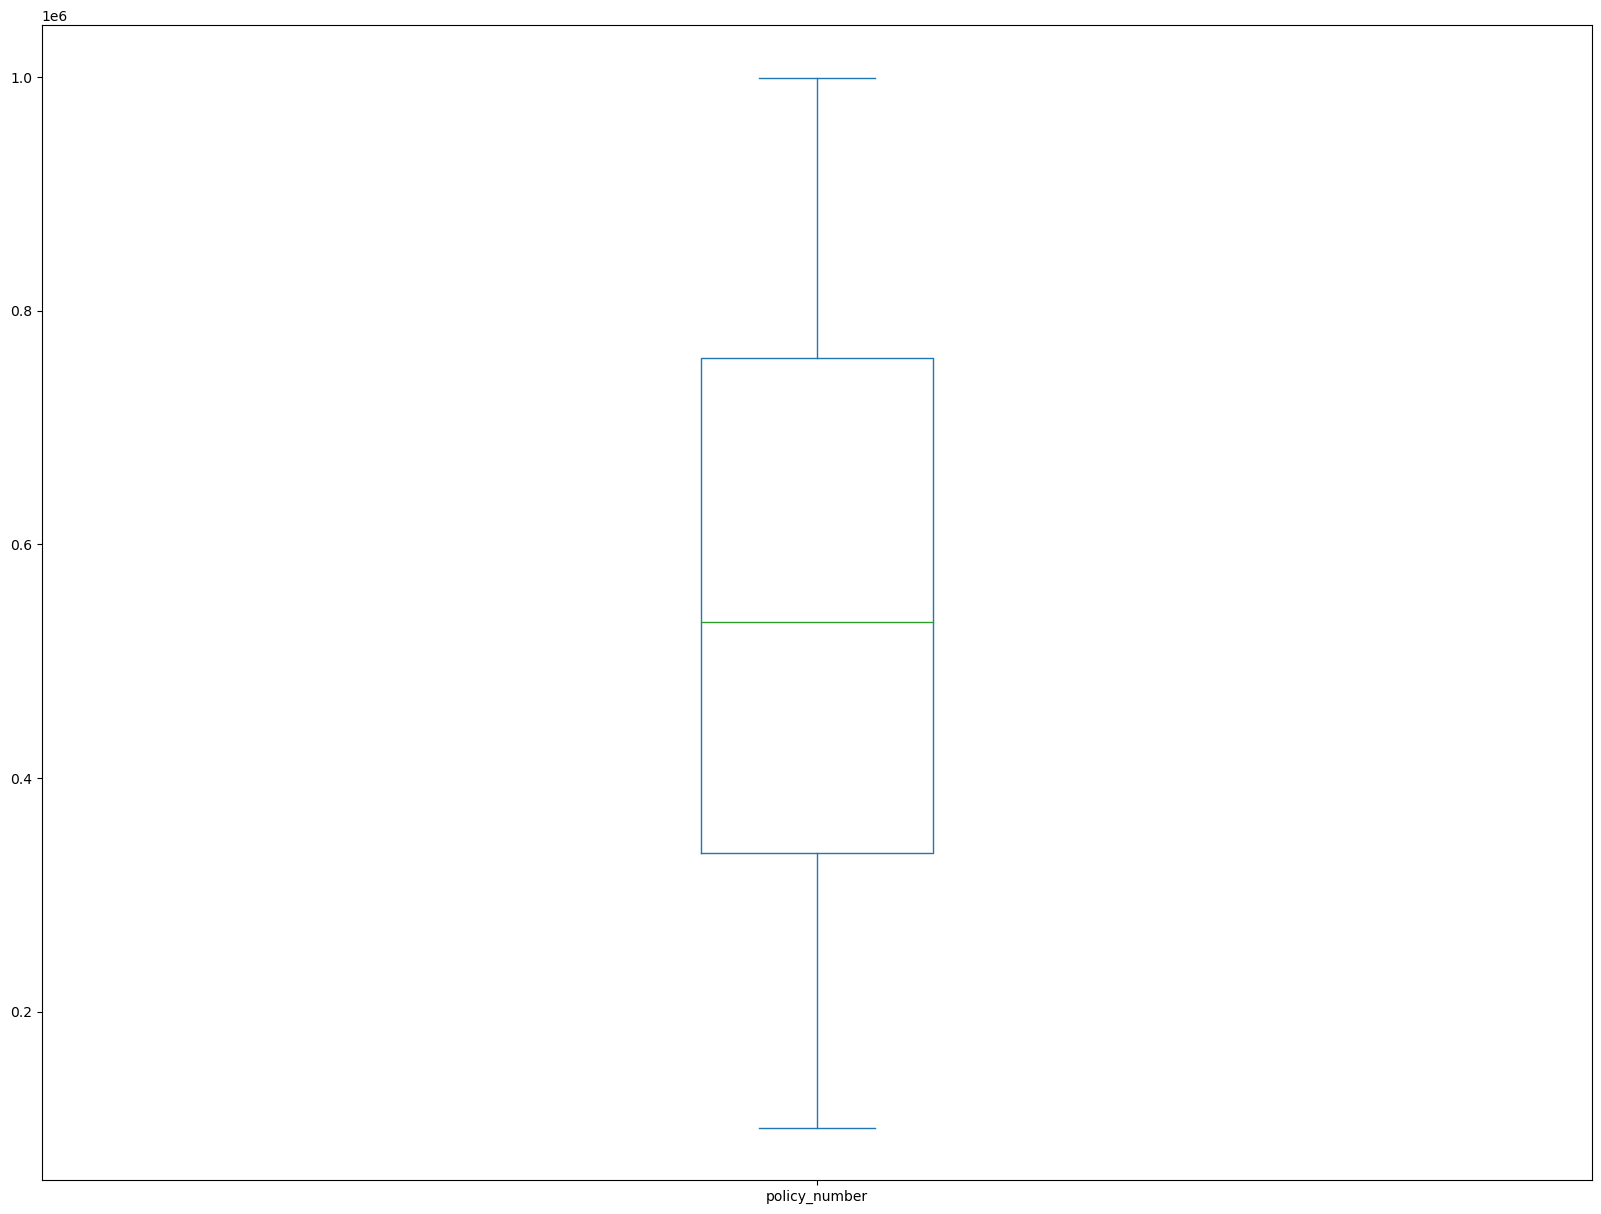

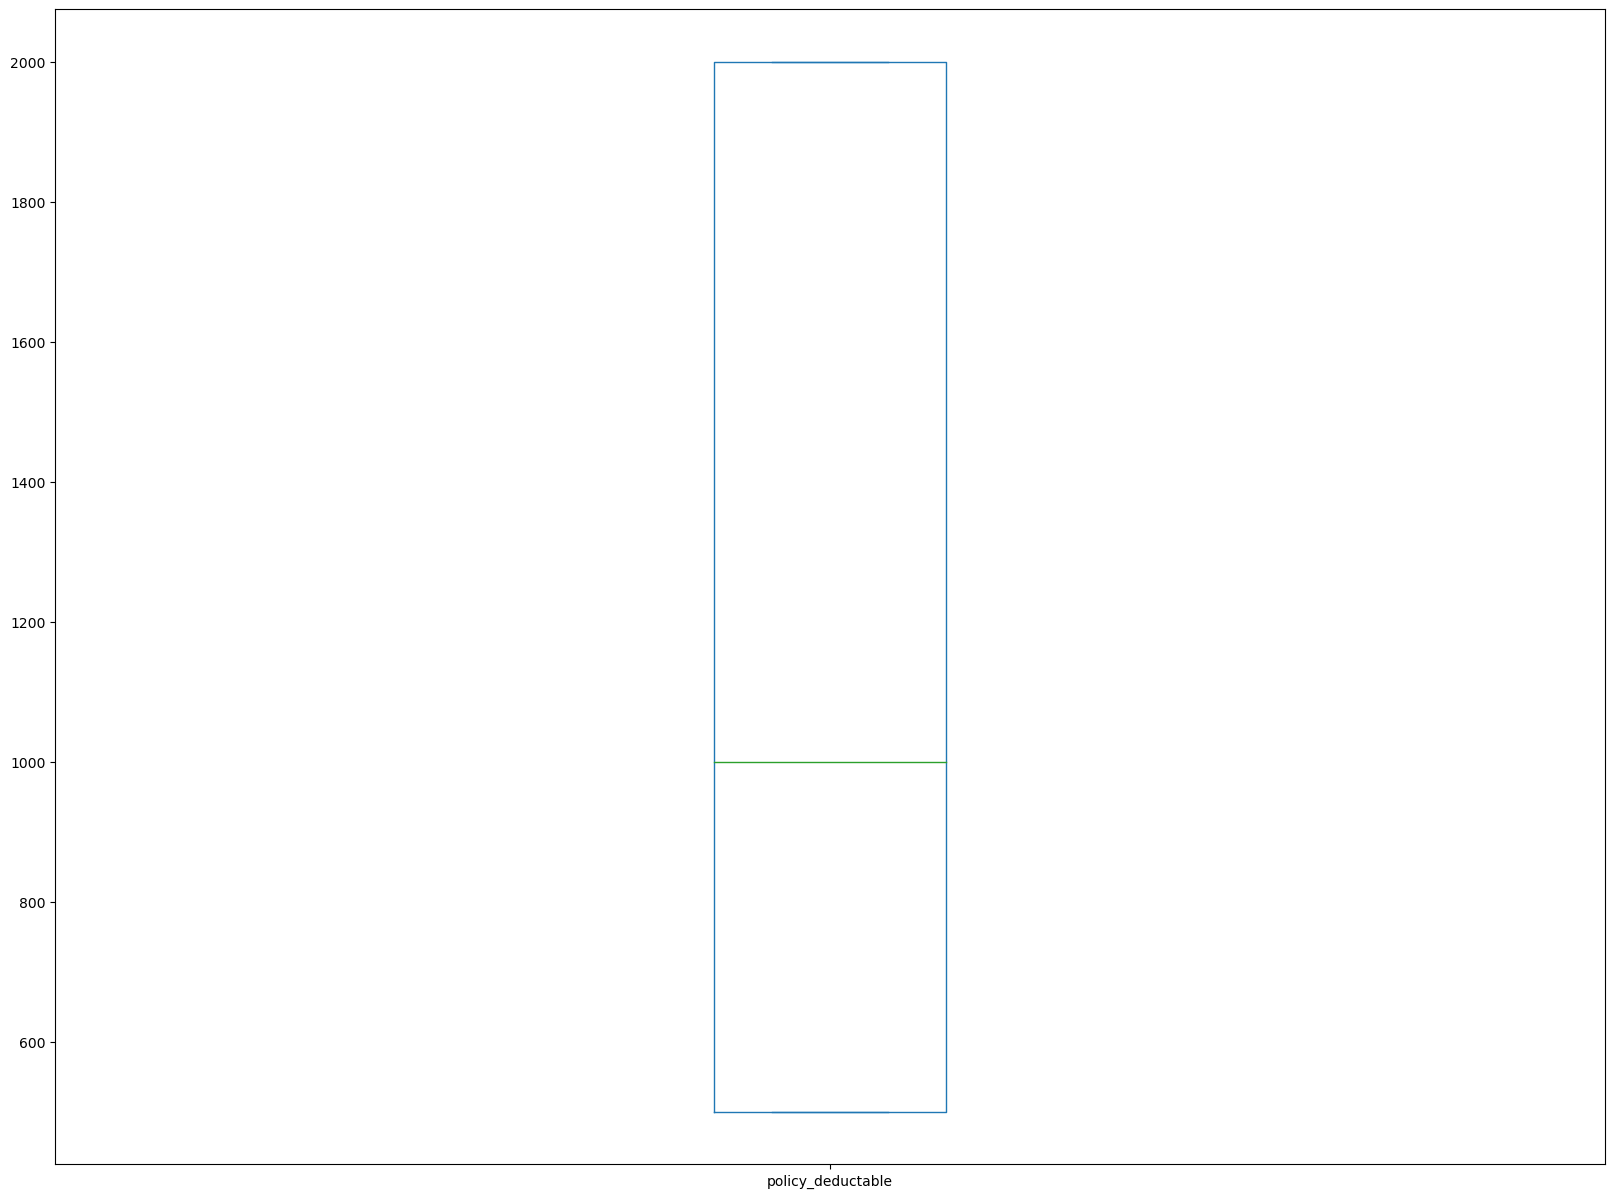

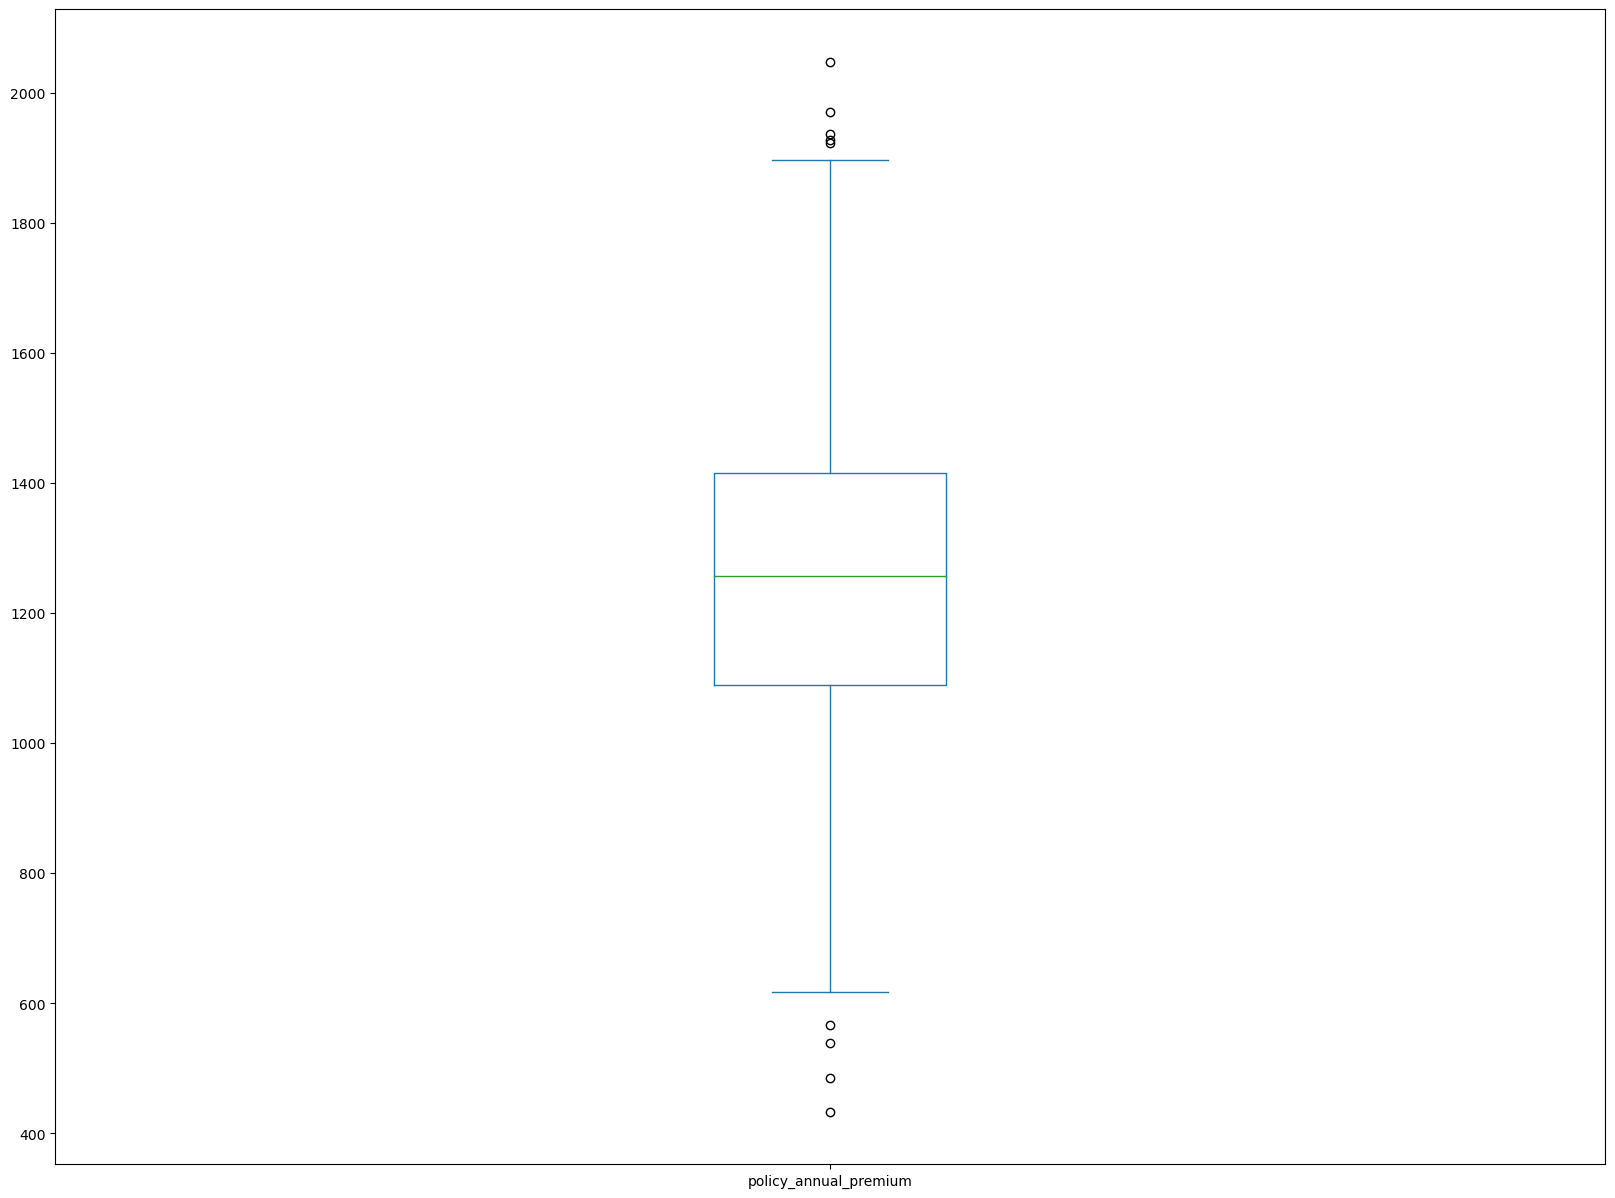

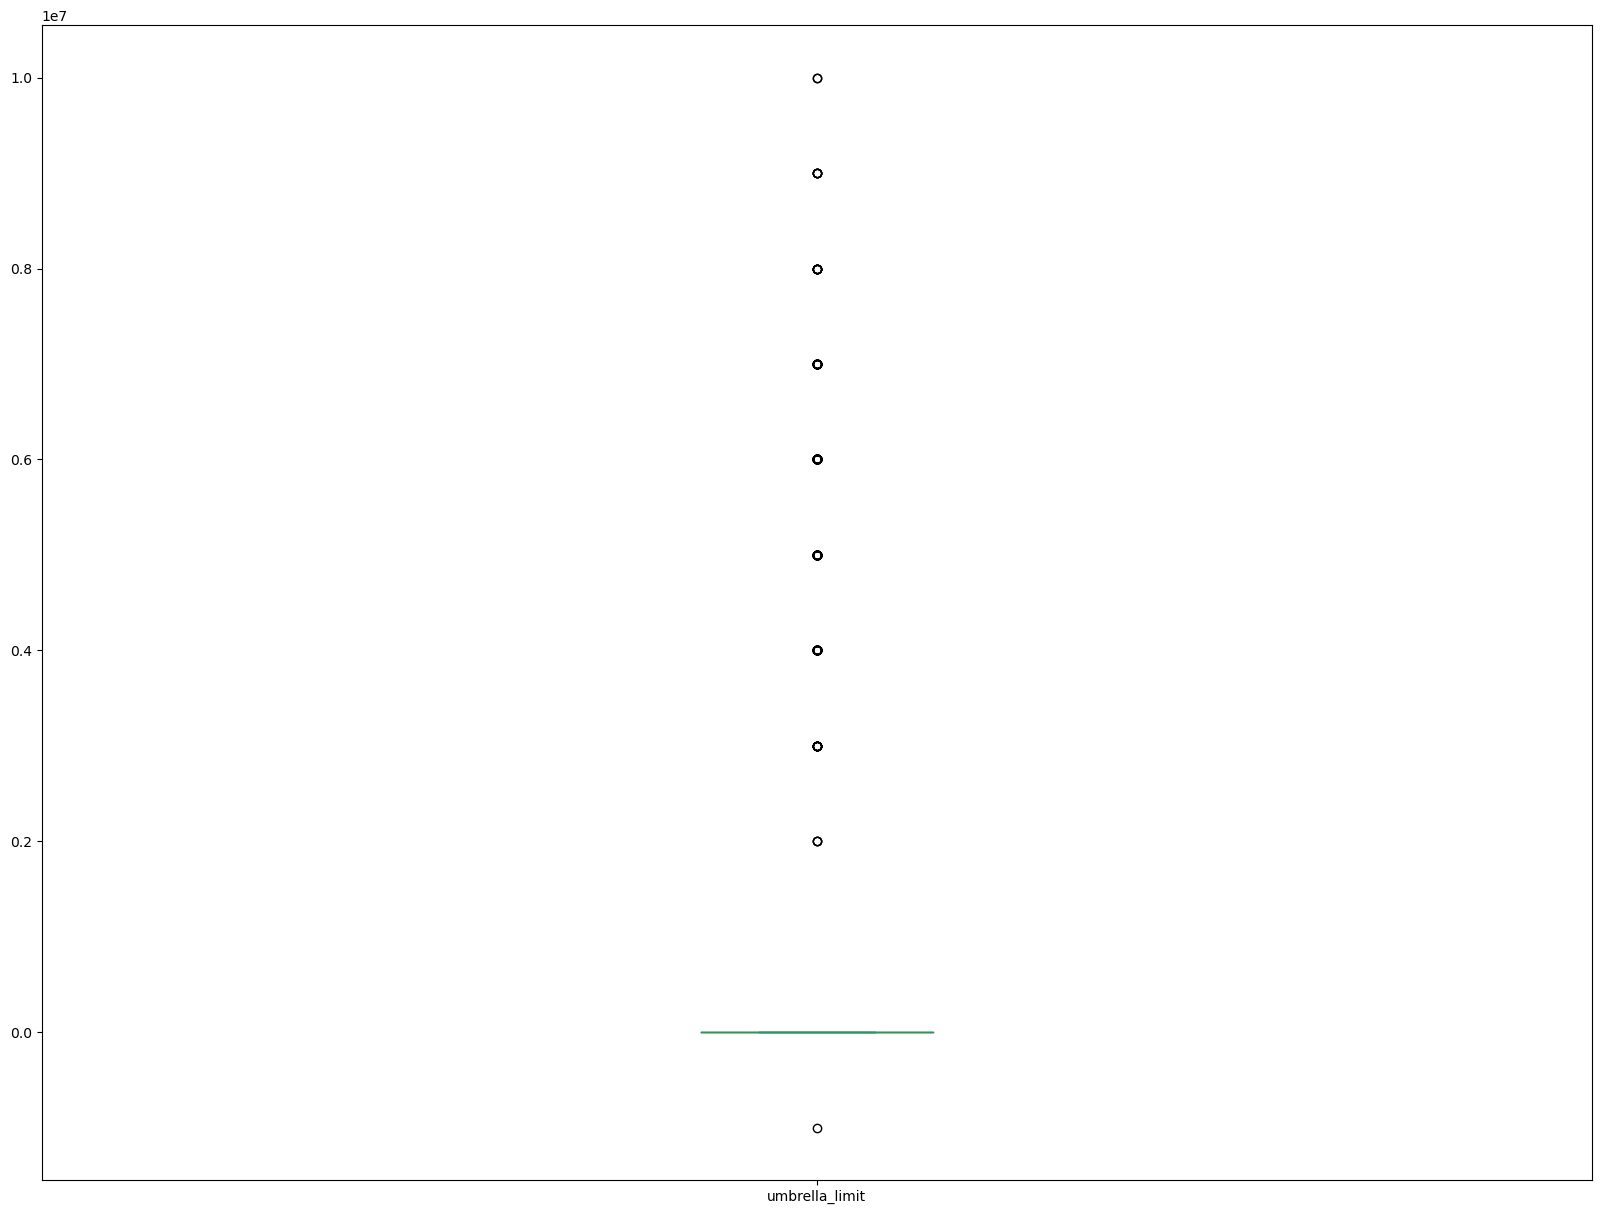

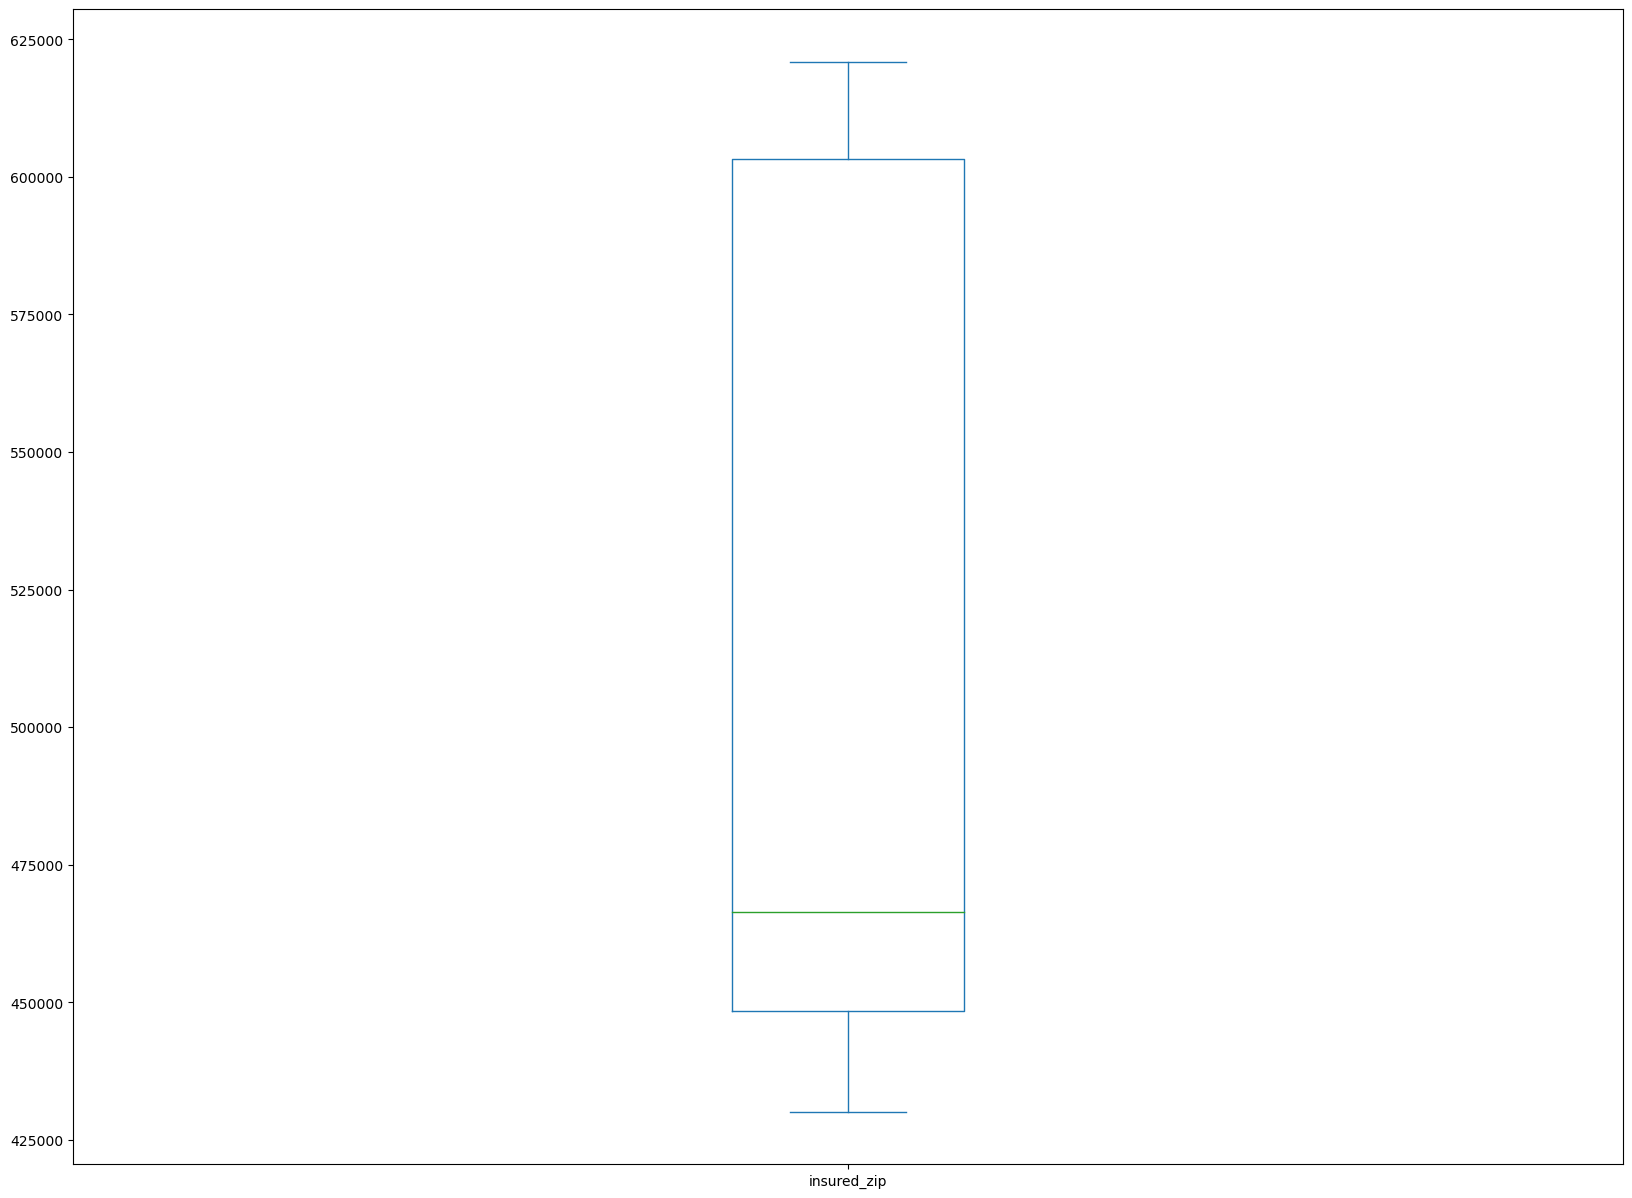

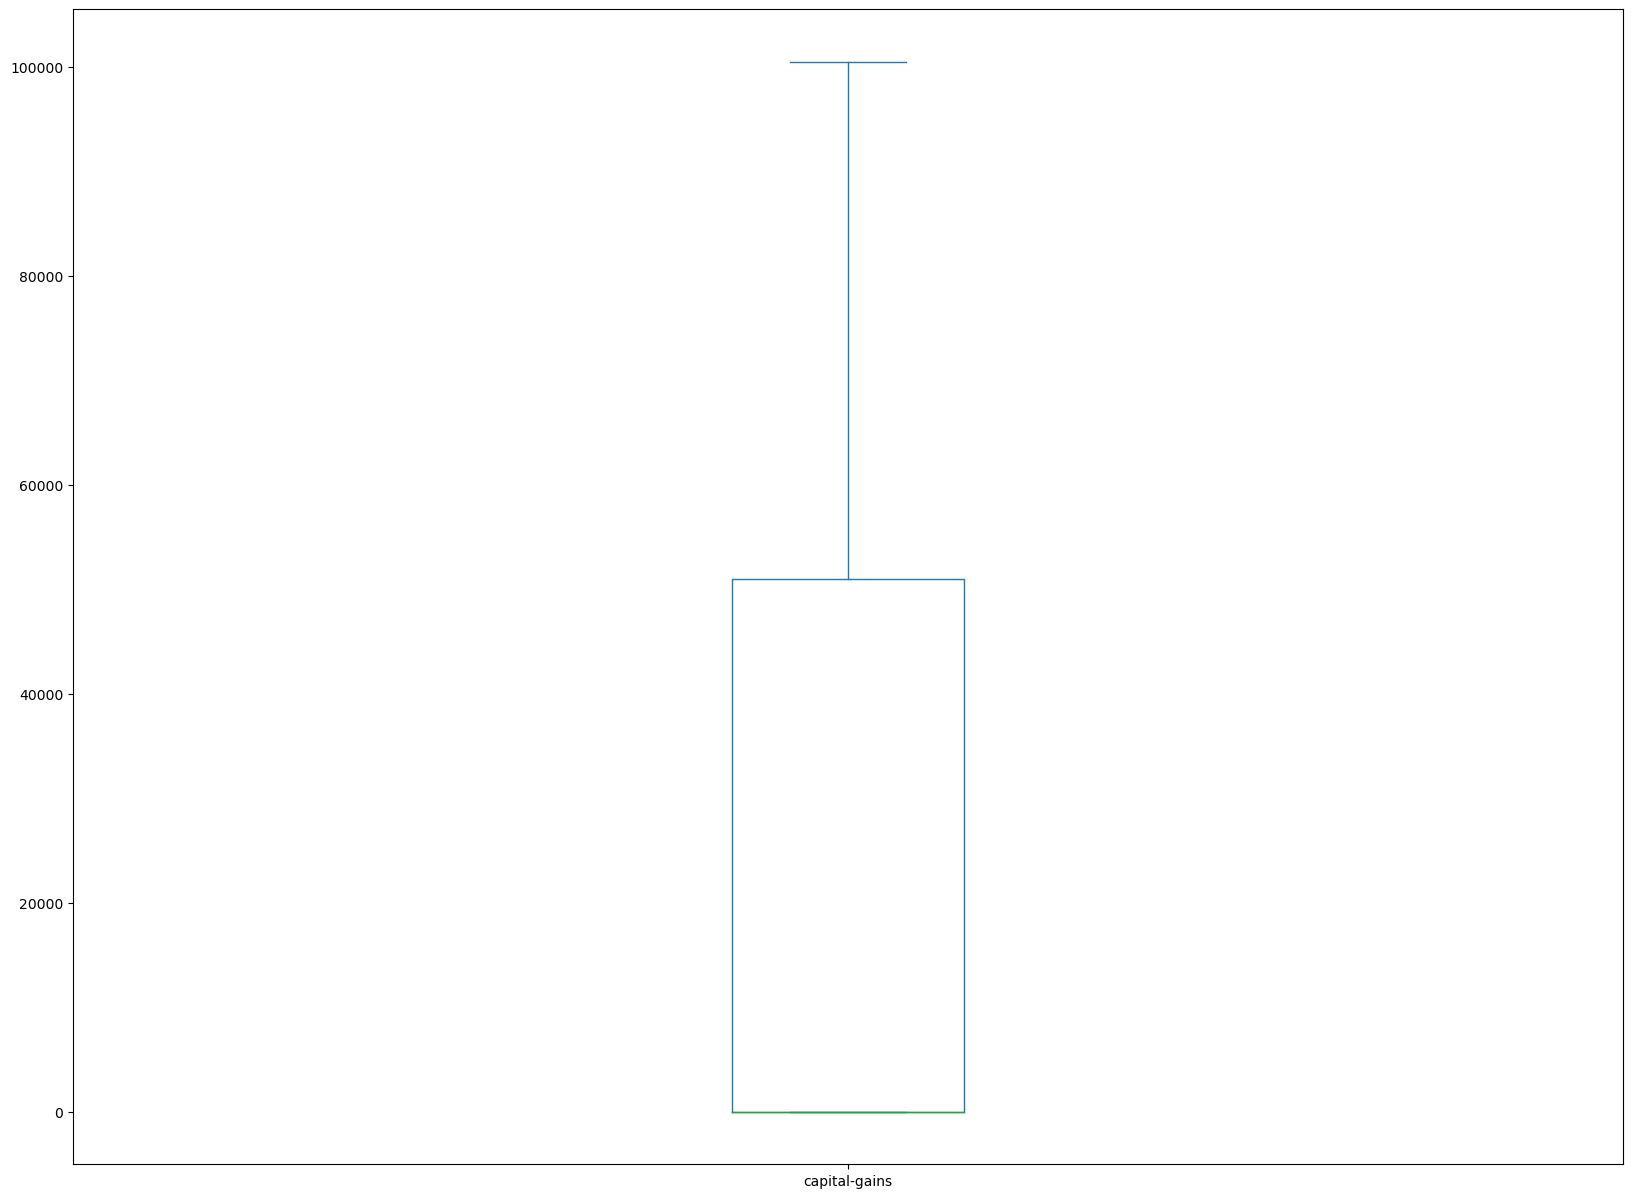

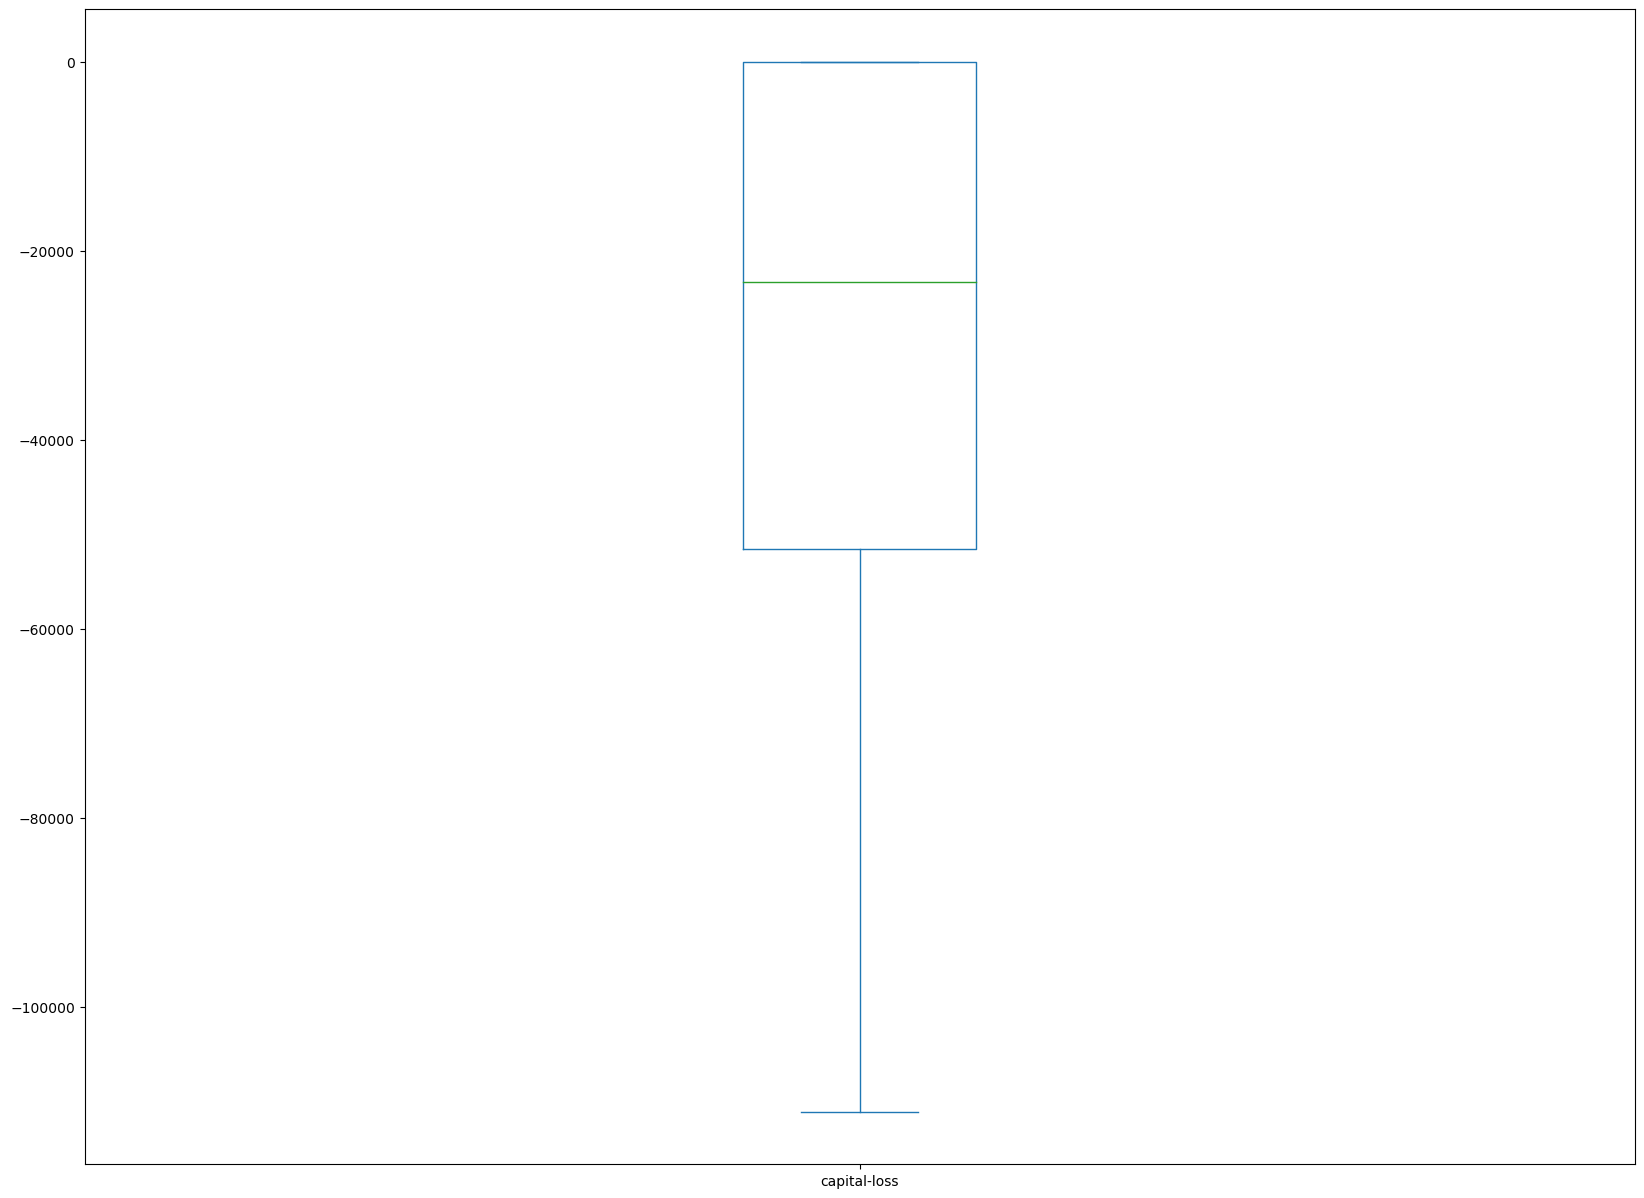

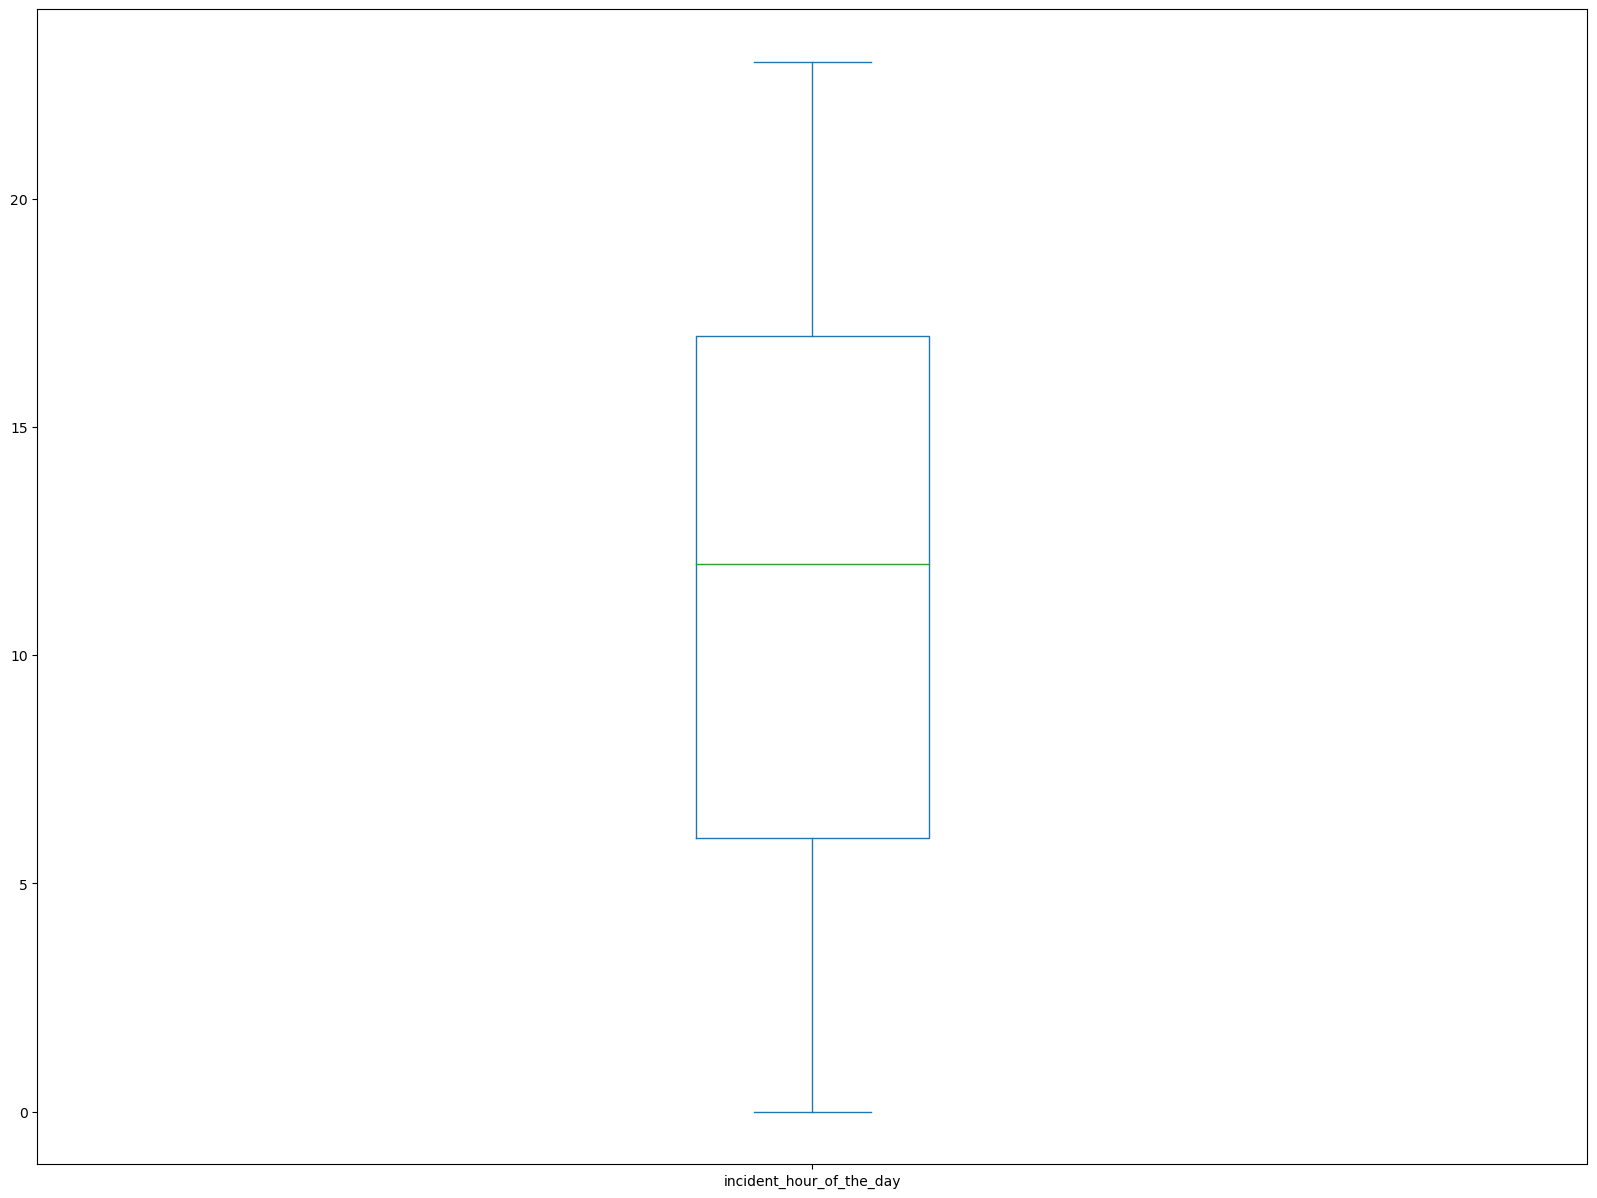

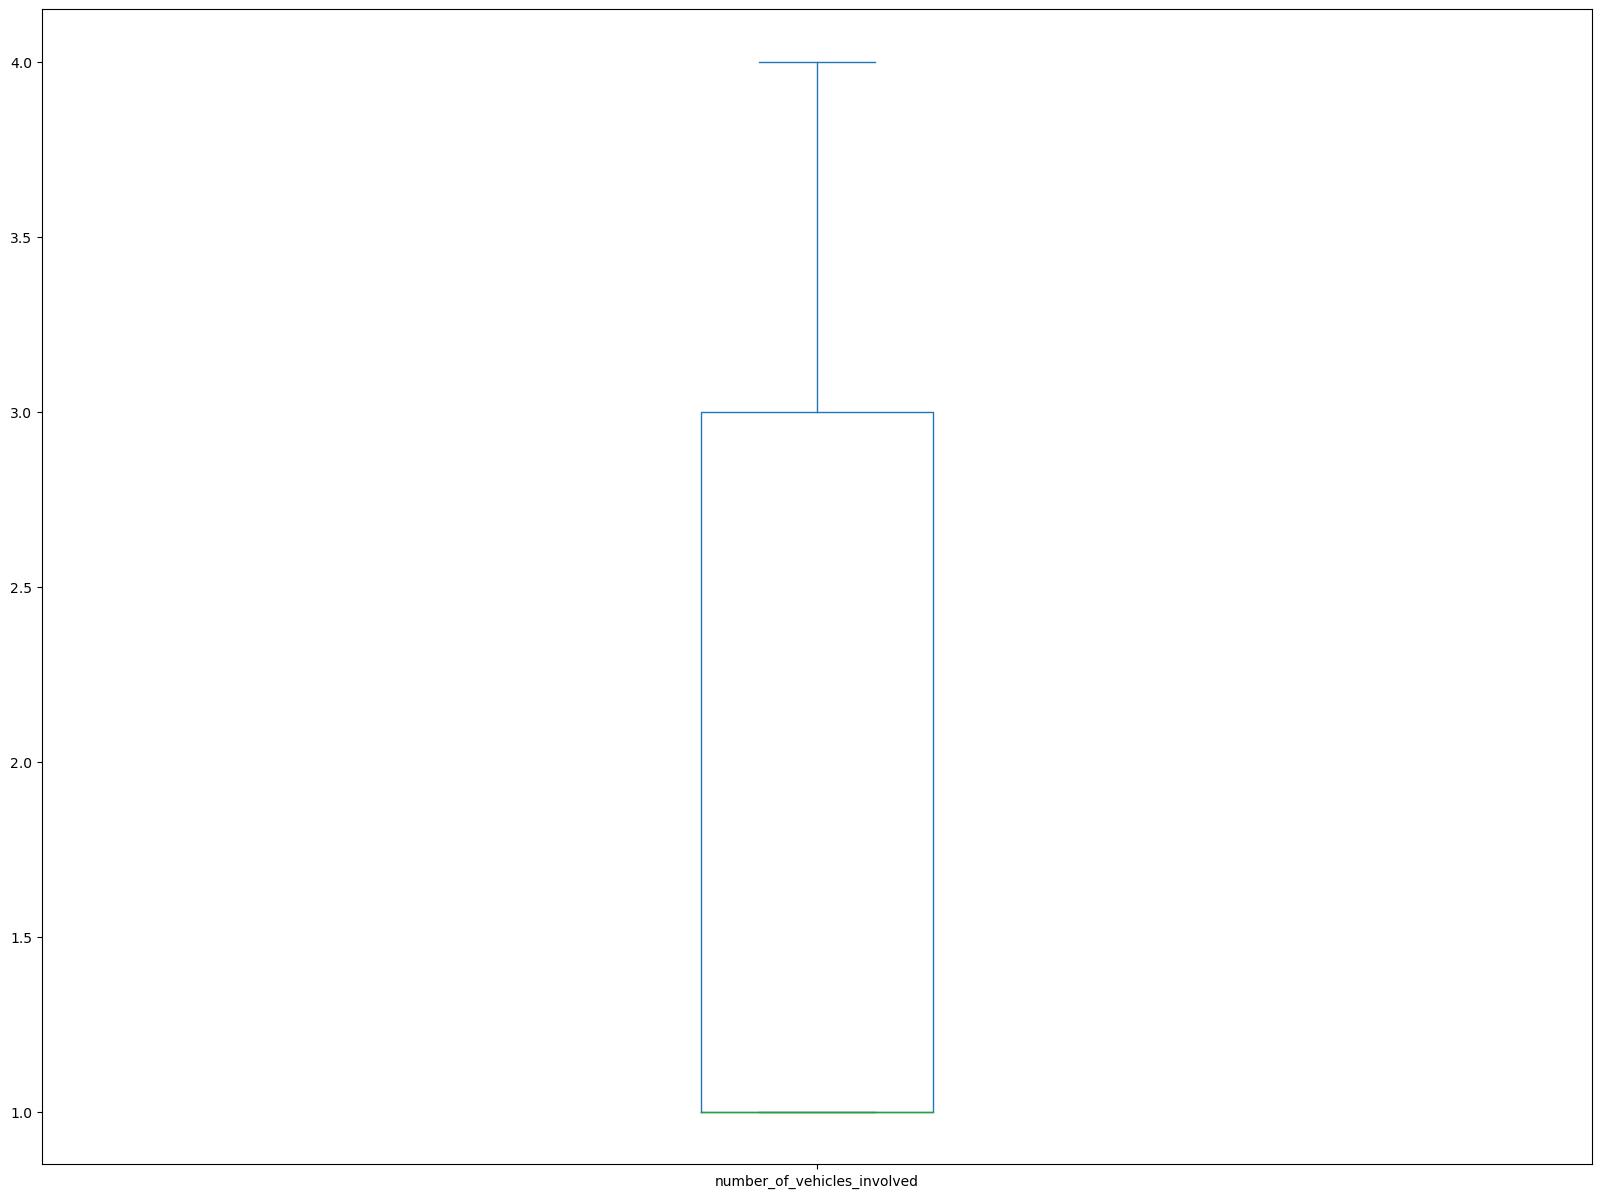

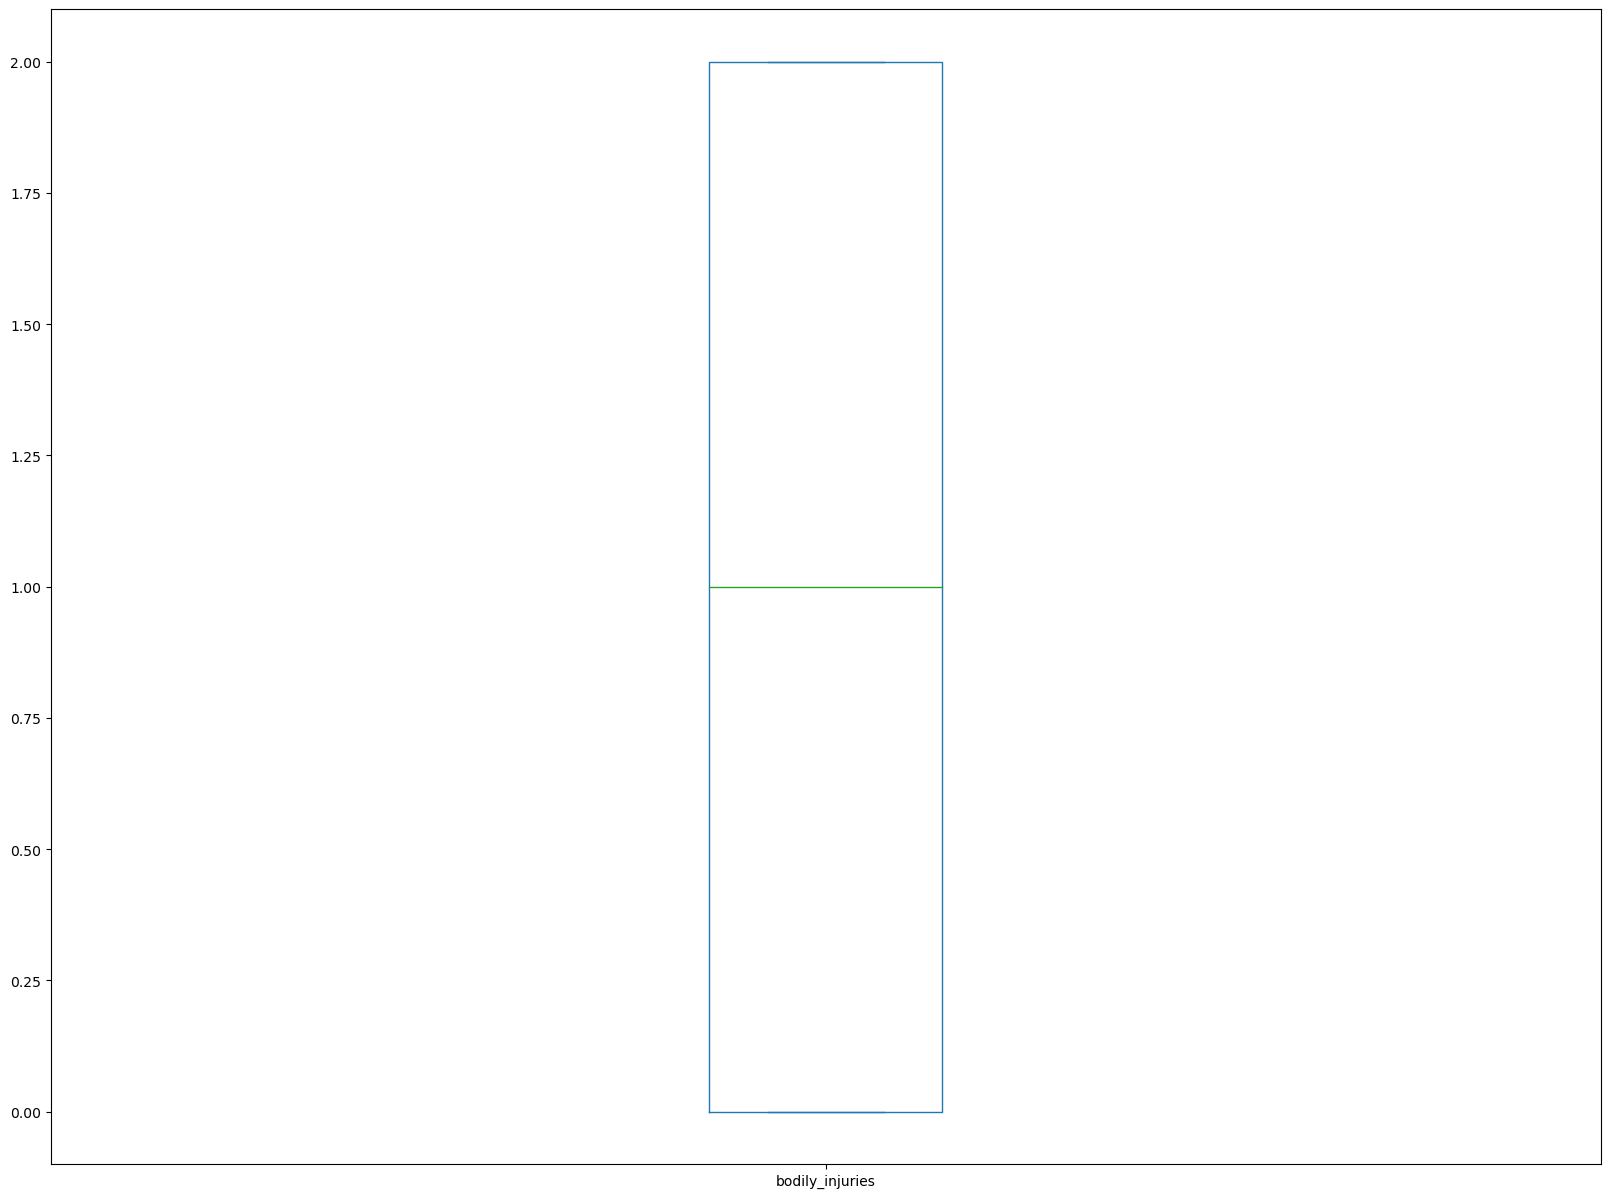

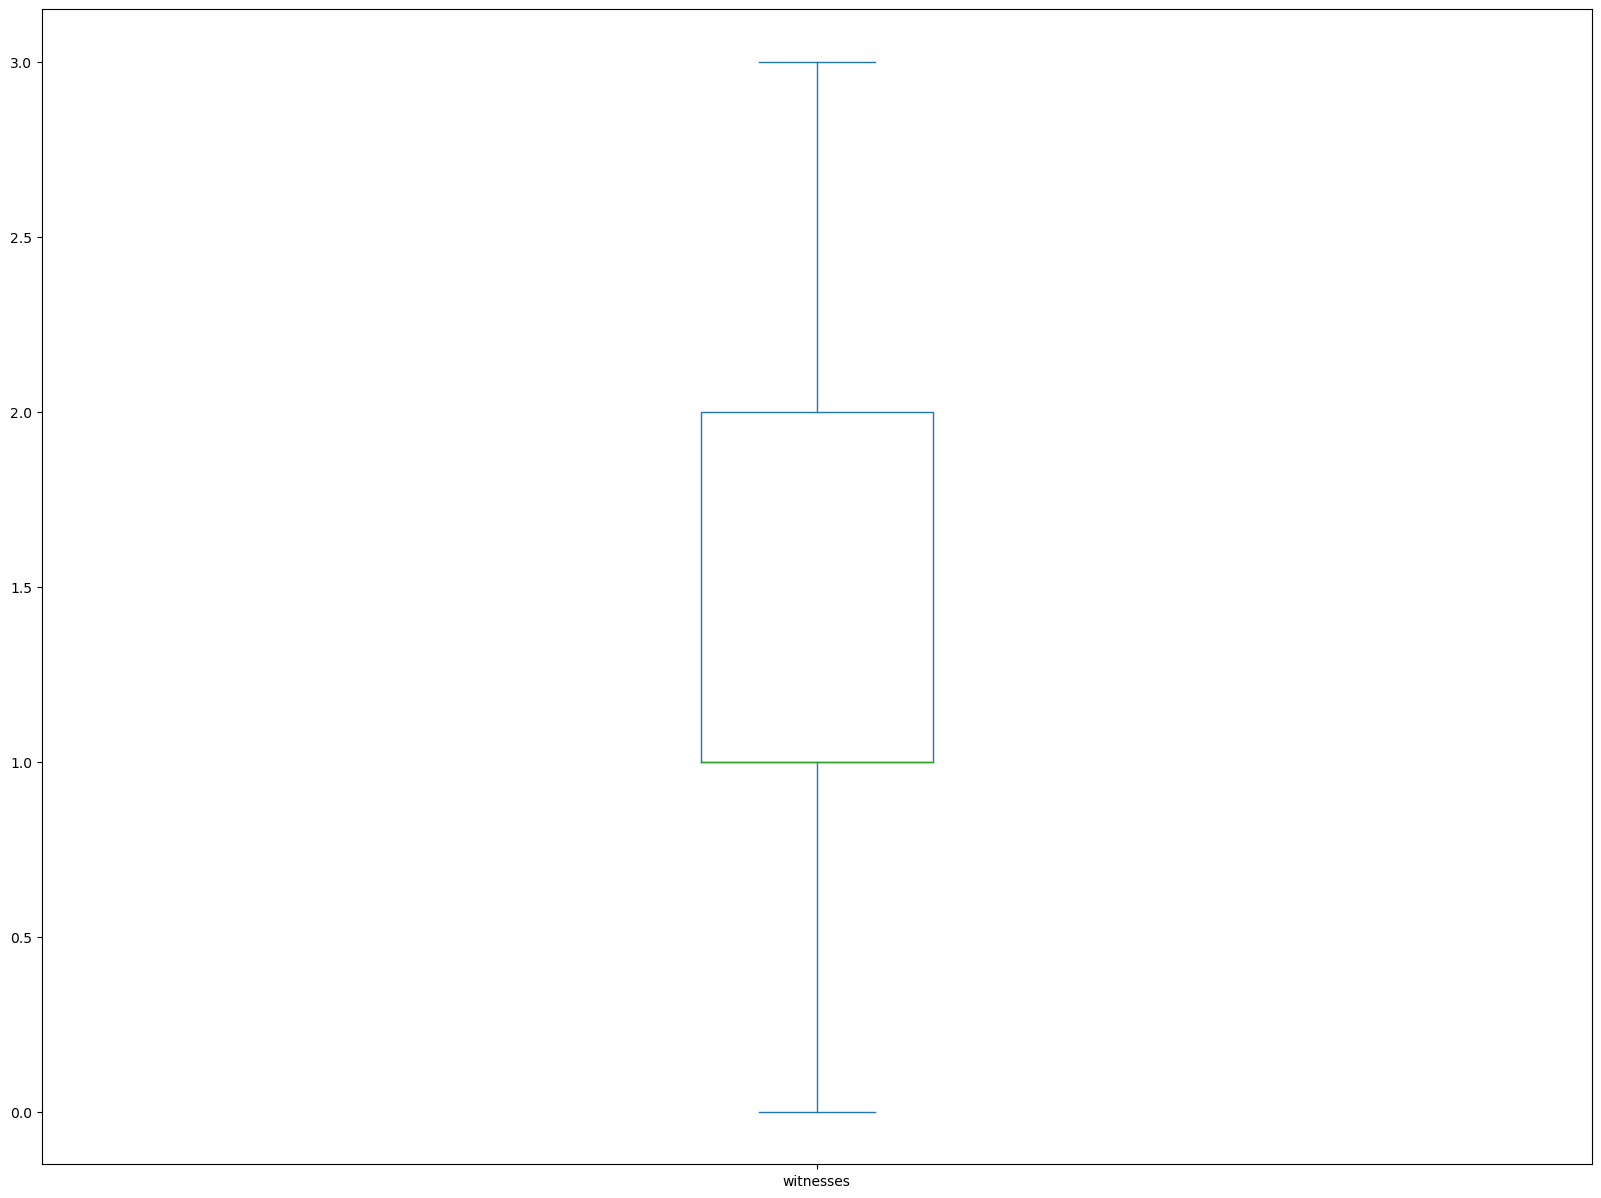

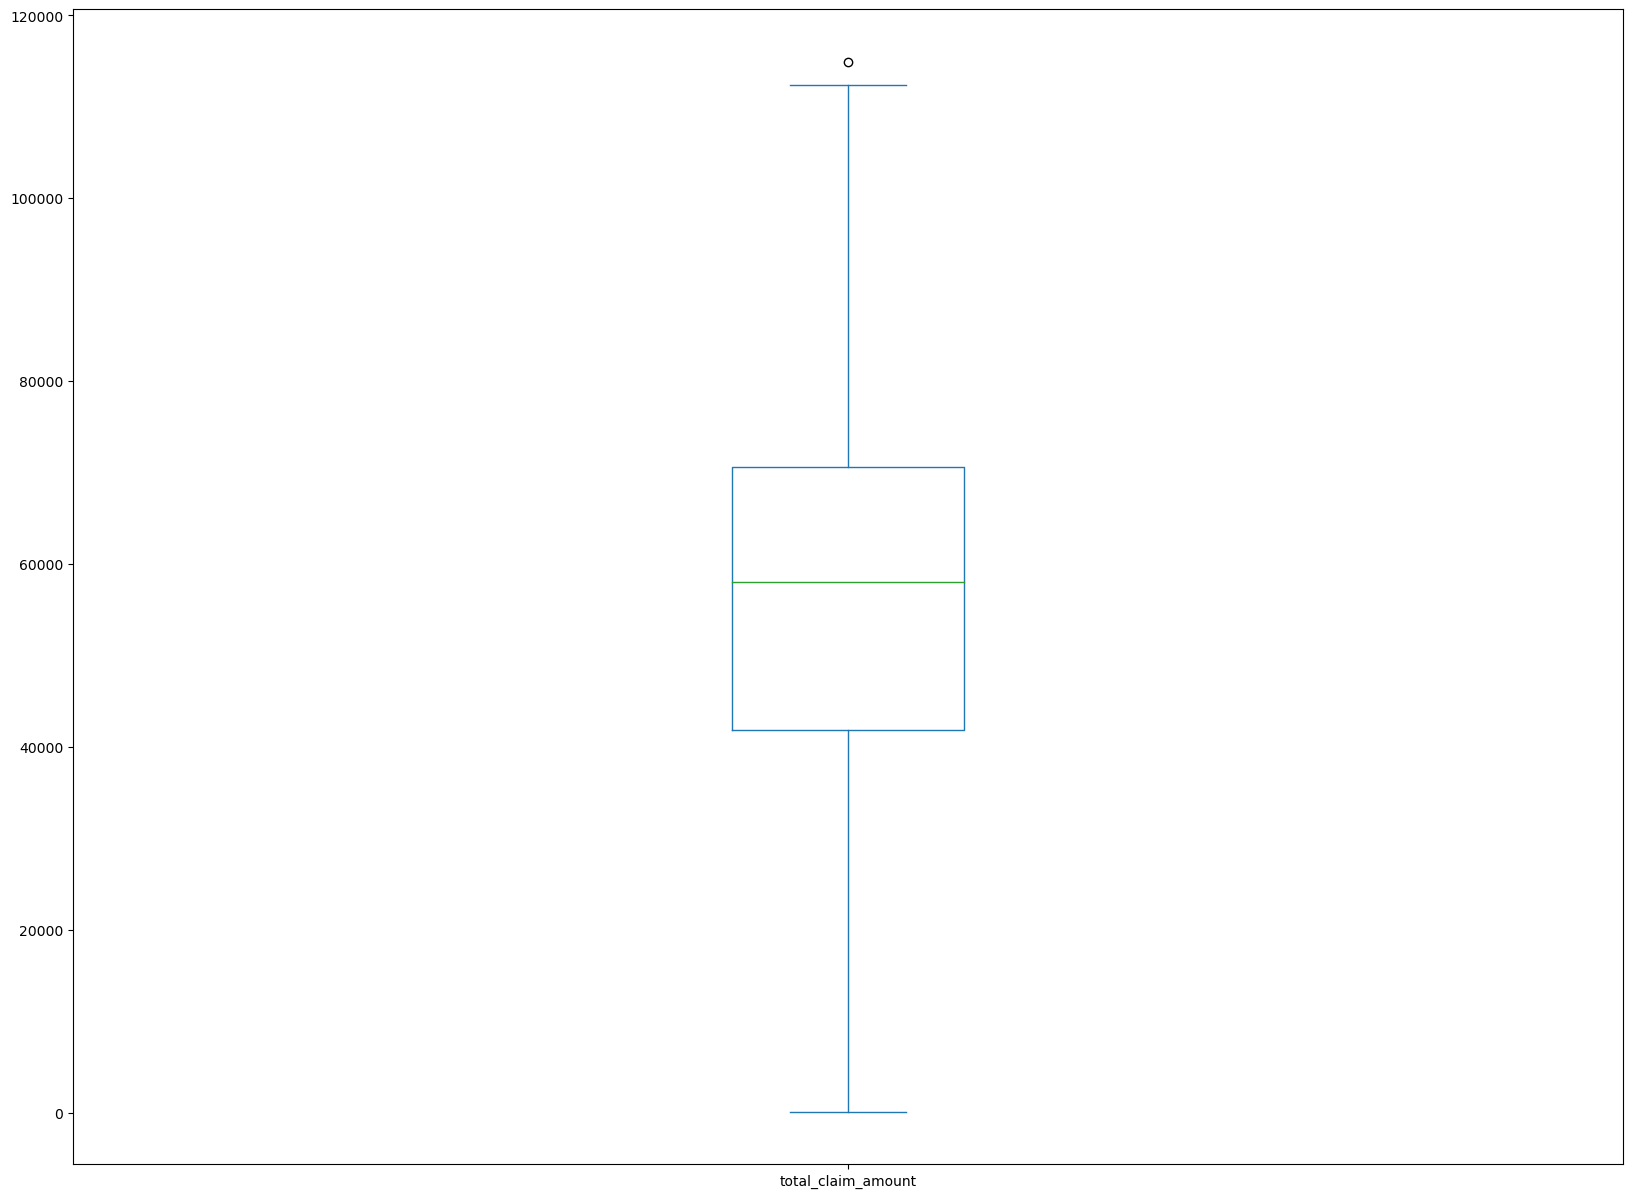

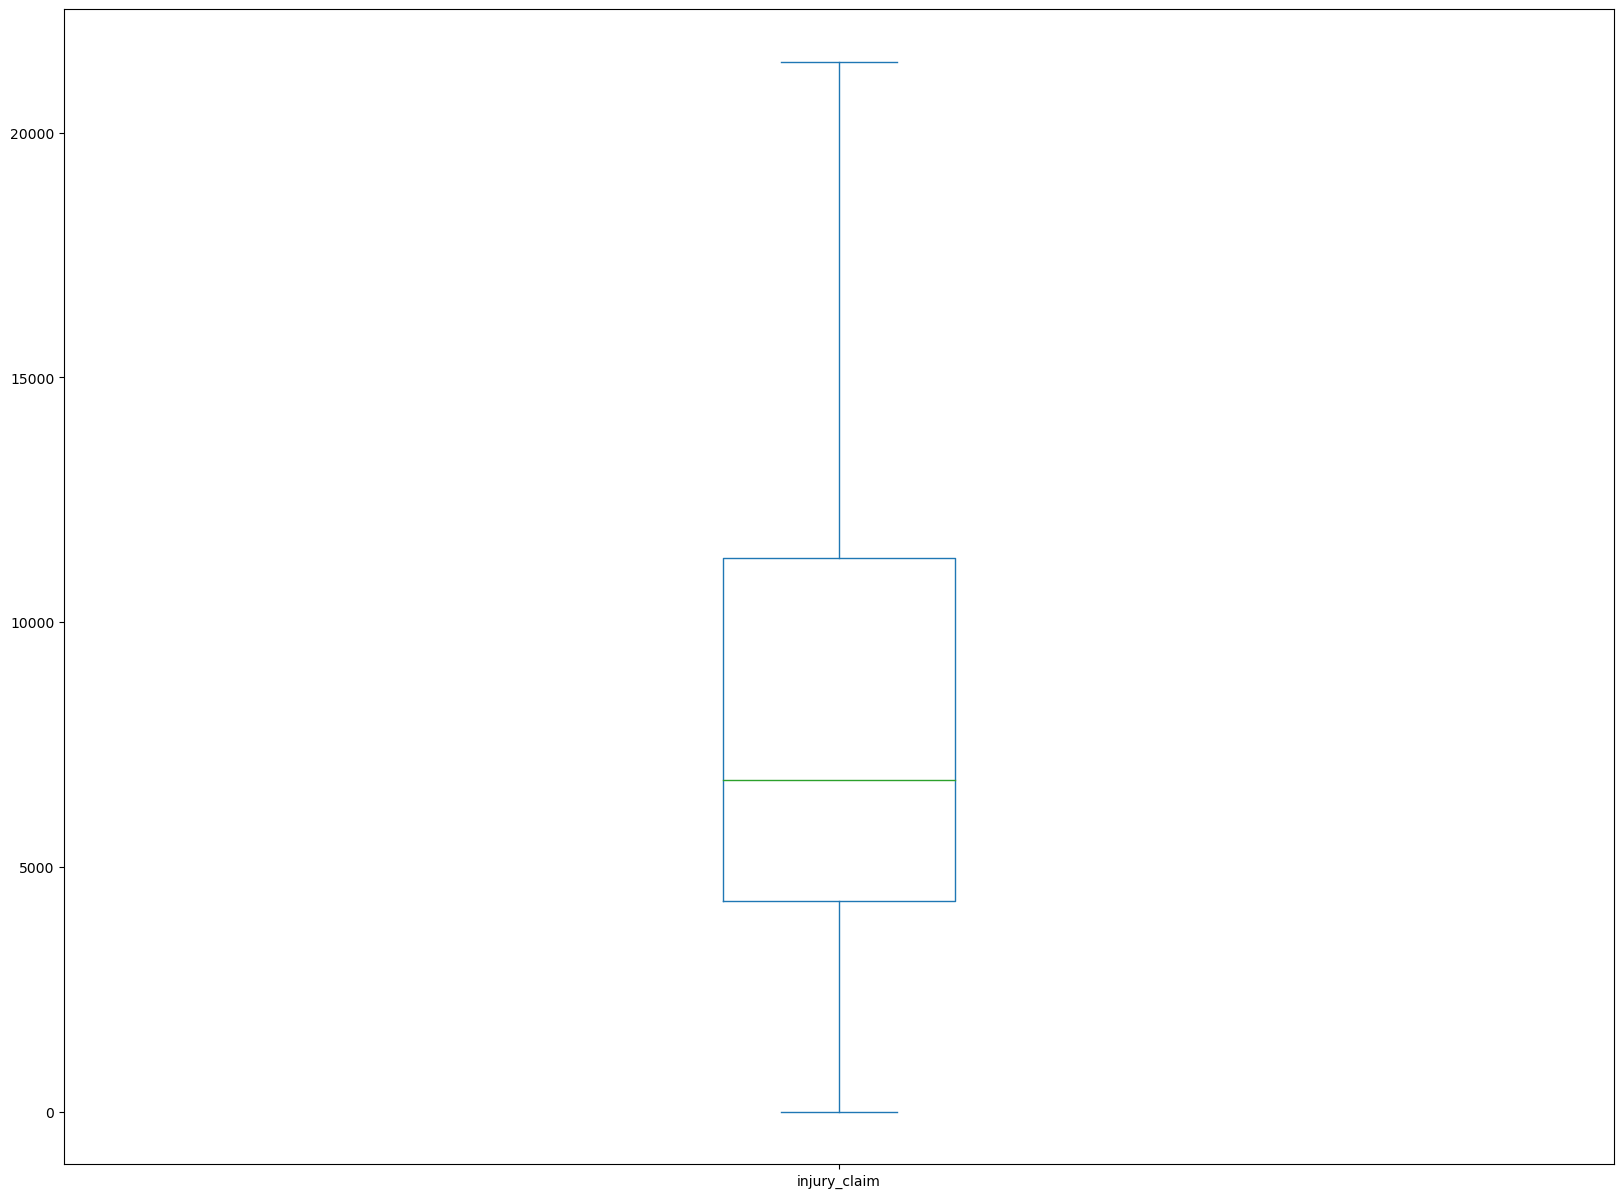

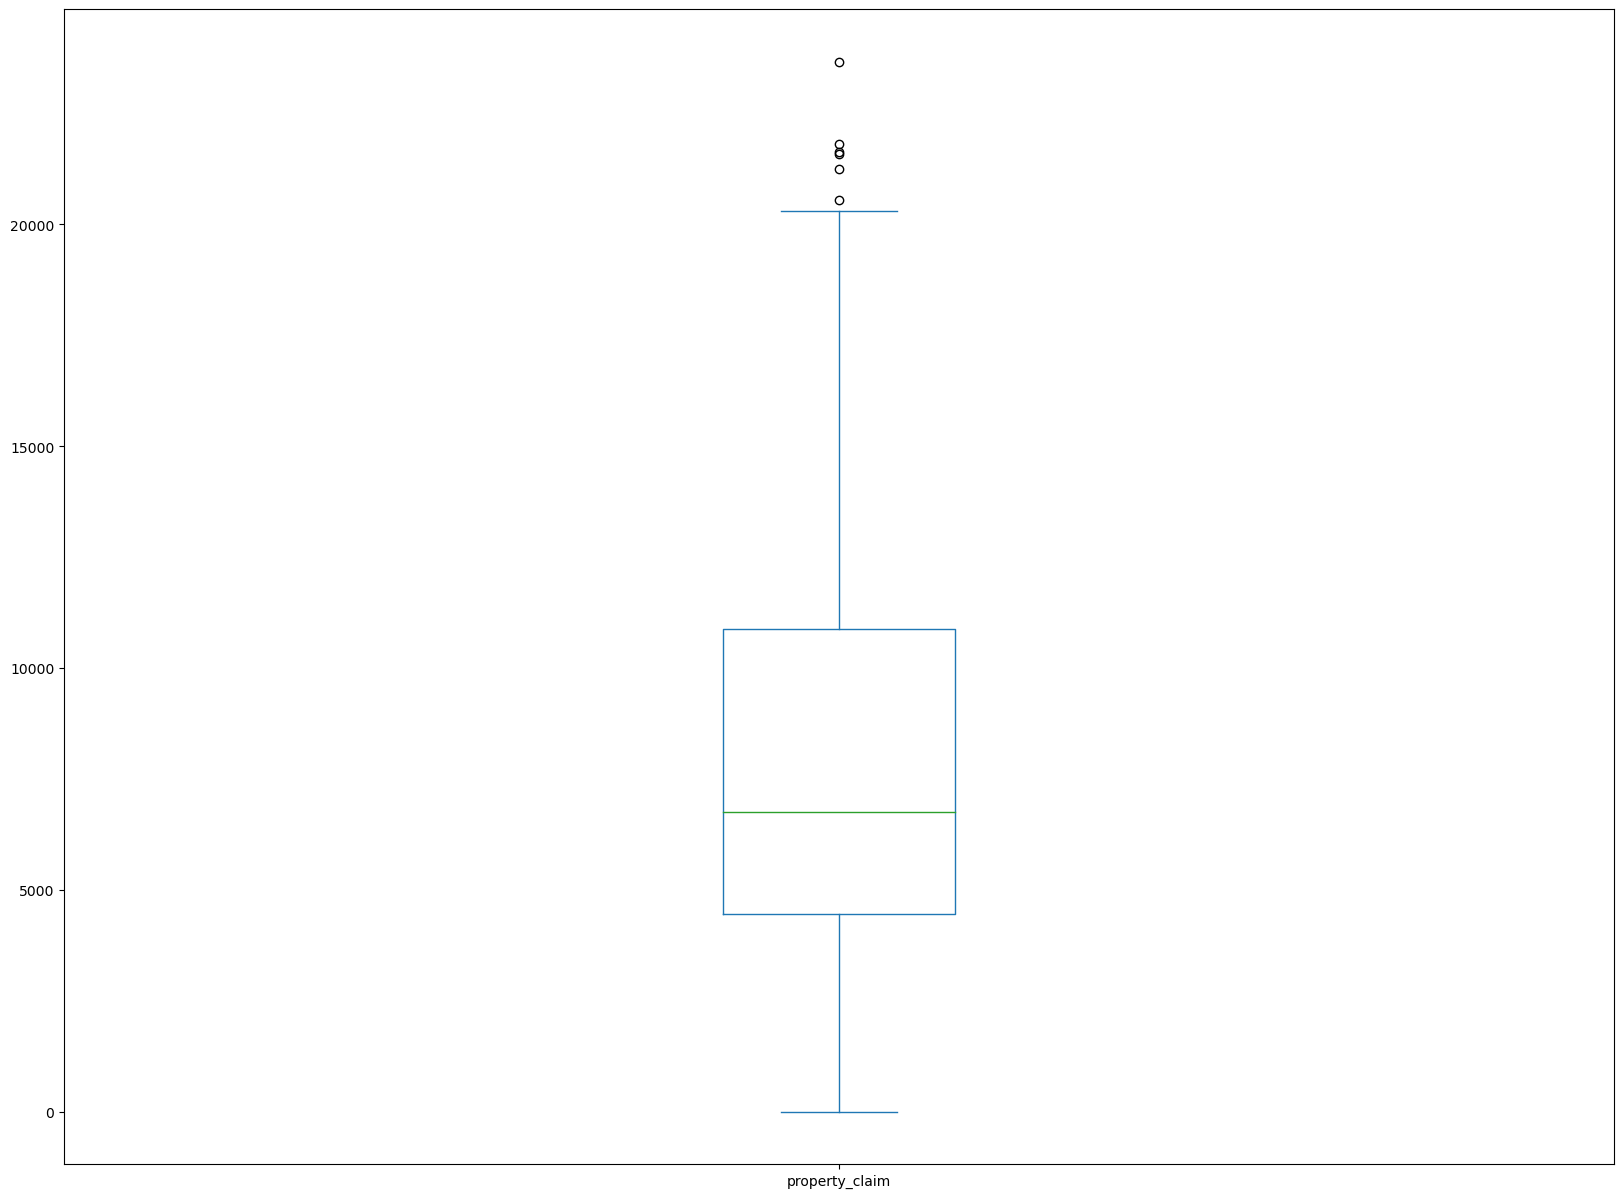

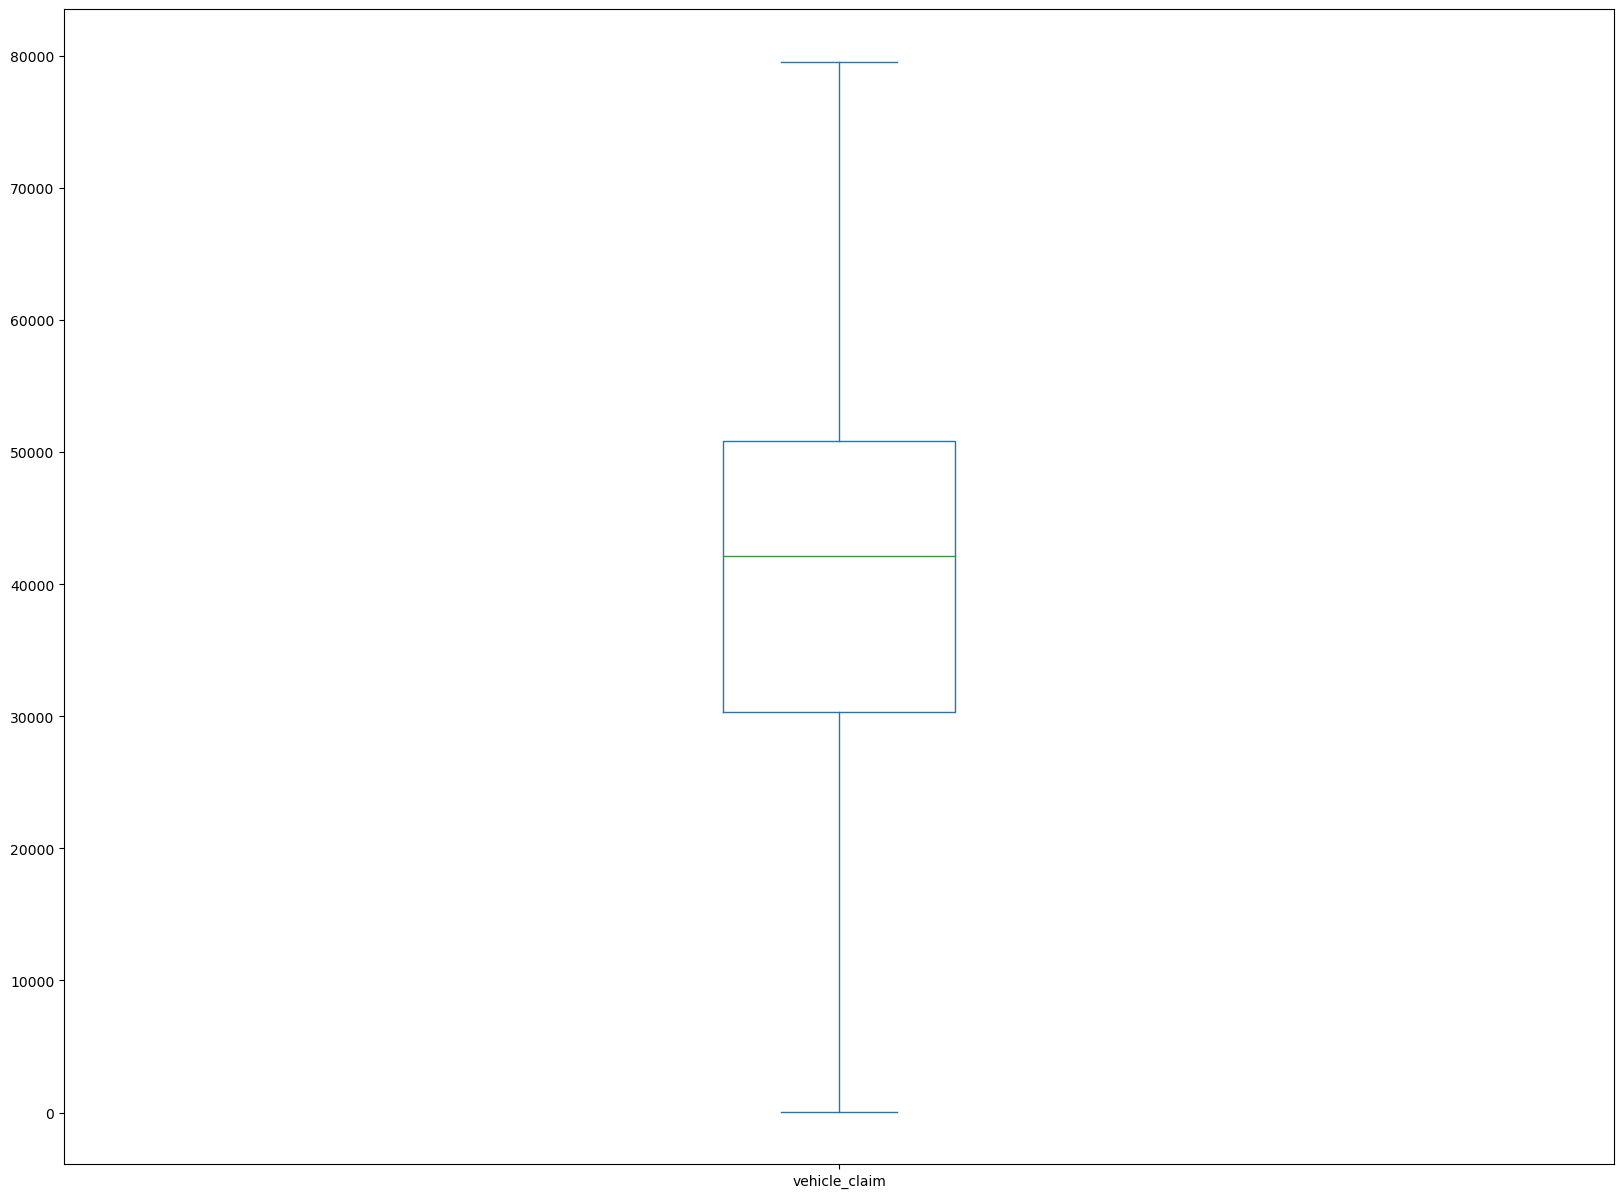

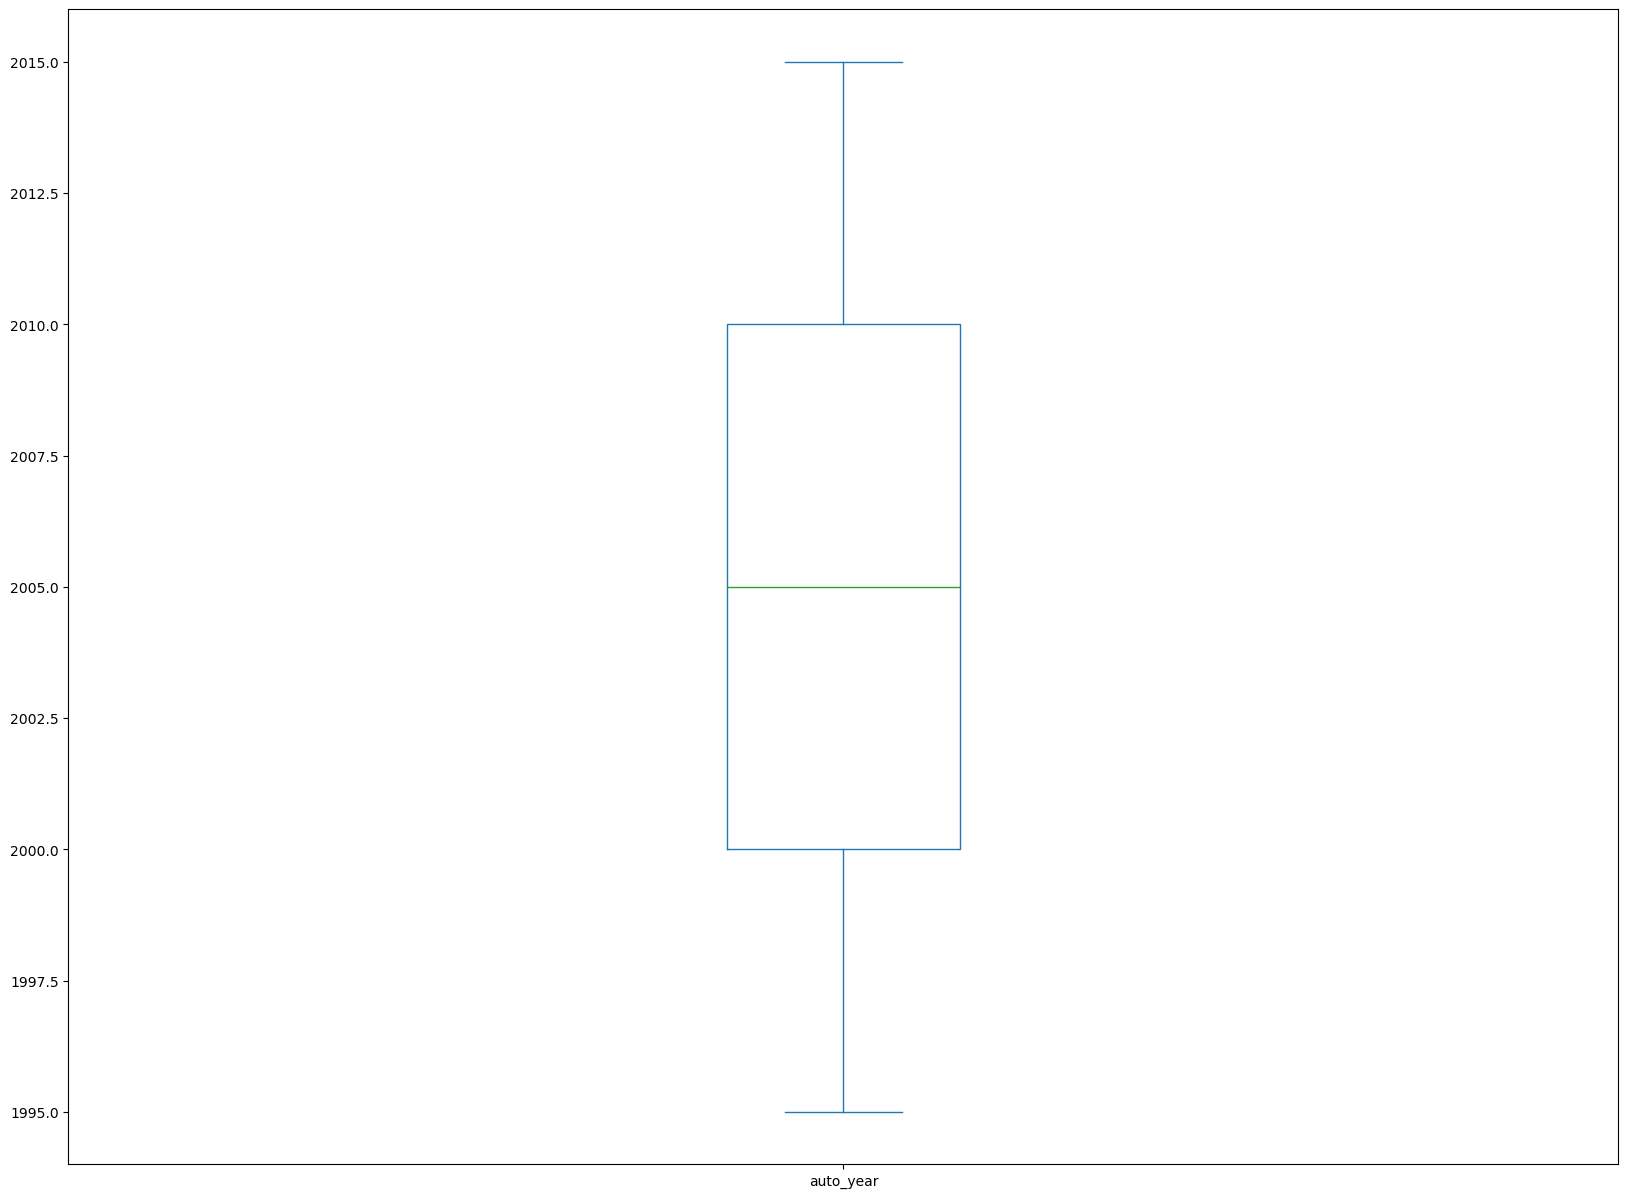

In [50]:
for i in cont_cols:
    plt.figure(figsize = (20, 15))
    ClaimFraud_Ds[i].plot.box()

In [51]:
ClaimFraud_Ds[cont_cols].skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
dtype: float64

Splitting the Data

In [52]:
x = ClaimFraud_Ds.drop('fraud_reported', axis = 1)
y = ClaimFraud_Ds['fraud_reported']

In [53]:
y.value_counts()

fraud_reported
0    753
1    247
Name: count, dtype: int64

Finding out Best Random State

In [54]:
maxAccu = 0
maxRS = 0

for i in range (1, 500):
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train, y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print ('Max Accuracy obtained is', maxAccu, 'on Random State', maxRS)

Max Accuracy obtained is 0.81 on Random State 218


In [55]:
from imblearn.over_sampling import SMOTE
target = SMOTE()
x,y= target.fit_resample(x,y)

In [56]:
y.value_counts()

fraud_reported
1    753
0    753
Name: count, dtype: int64

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=218)

In [58]:

pip install scikit-learn==1.2.2

Note: you may need to restart the kernel to use updated packages.


Model Prediction

In [59]:
Lg=LogisticRegression()
dtc=DecisionTreeClassifier(criterion='entropy')
gnb=GaussianNB()
ada = AdaBoostClassifier()
rfc = RandomForestClassifier(n_estimators=100,random_state=42)
gb = GradientBoostingClassifier()
knn= KNeighborsClassifier()
etc= ExtraTreesClassifier()

models=(Lg,dtc,gnb,ada,rfc,gb,knn,etc)
for i in models:
    print (i)
    i.fit(x_train, y_train)
    pred = i.predict(x_test)
    print (accuracy_score(y_test, pred))
    print (confusion_matrix(y_test, pred))
    print (classification_report(y_test, pred))
    


LogisticRegression()
0.5553097345132744
[[112 115]
 [ 86 139]]
              precision    recall  f1-score   support

           0       0.57      0.49      0.53       227
           1       0.55      0.62      0.58       225

    accuracy                           0.56       452
   macro avg       0.56      0.56      0.55       452
weighted avg       0.56      0.56      0.55       452

DecisionTreeClassifier(criterion='entropy')
0.8451327433628318
[[189  38]
 [ 32 193]]
              precision    recall  f1-score   support

           0       0.86      0.83      0.84       227
           1       0.84      0.86      0.85       225

    accuracy                           0.85       452
   macro avg       0.85      0.85      0.85       452
weighted avg       0.85      0.85      0.85       452

GaussianNB()
0.5597345132743363
[[ 70 157]
 [ 42 183]]
              precision    recall  f1-score   support

           0       0.62      0.31      0.41       227
           1       0.54      0.81

In [60]:
for i in models:
    cvs = cross_val_score(i, x, y, cv = 5)
    print ('Cross Validation Score for ',i, ' model is :', cvs.mean())
    print (' ')

Cross Validation Score for  LogisticRegression()  model is : 0.5816593694308155
 
Cross Validation Score for  DecisionTreeClassifier(criterion='entropy')  model is : 0.8114672944489671
 
Cross Validation Score for  GaussianNB()  model is : 0.6009152713911685
 
Cross Validation Score for  AdaBoostClassifier()  model is : 0.822809179115971
 
Cross Validation Score for  RandomForestClassifier(random_state=42)  model is : 0.852694110140591
 
Cross Validation Score for  GradientBoostingClassifier()  model is : 0.8573232712151547
 
Cross Validation Score for  KNeighborsClassifier()  model is : 0.6753316758707179
 
Cross Validation Score for  ExtraTreesClassifier()  model is : 0.8480627488944137
 


HyperParameter Tuning

In [62]:
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 20],
    'min_samples_leaf': [1, 4],
    'max_features': ['auto', 'sqrt']
}


random_search_rfc = RandomizedSearchCV(estimator=RandomForestClassifier(), param_distributions=param_grid, cv=5, n_jobs=-1)


random_search_rfc.fit(x_train, y_train)


best_params = random_search_rfc.best_params_
best_model = random_search_rfc.best_estimator_

y_pred = best_model.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score of RandomForestClassifier:", accuracy*100)

Accuracy Score of RandomForestClassifier: 84.7345132743363


In [63]:

cvs = cross_val_score(rfc, x, y, cv = 5)
print ('Cross Validation Score for ',rfc, ' model is :', cvs.mean())

Cross Validation Score for  RandomForestClassifier(random_state=42)  model is : 0.852694110140591


In [65]:
import pickle
filename = 'Insurance_Claim_Fraud_Prediction_best_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))

In [66]:
y_pred=rfc.predict(x_test)
Claim_Ins_Data=pd.DataFrame({"Actual":y_test,'Predicted':y_pred})
Claim_Ins_Data

Actual  Predicted
200        0          0
524        0          0
1103       1          1
762        1          0
42         0          0
...      ...        ...
333        0          0
423        0          0
555        1          0
928        0          0
127        0          0

[452 rows x 2 columns]